## TOPIC: Credit risk is criticalto understand for banks as it can directly affect their capital. Banks are trying to predict how likely itis that a customer is going to default on their credit through credit scoring, which they then use todecide whether they should approve or deny a request from that customer. 

**Problem:**  Create a predictive model toassess the default risk of their customers

**Solution:**
1. **Data Exploration**: Examining the dataset to understand the features available for the model.

2. **Data Preprocessing**: Cleaning the data, handling missing values, encoding categorical variables, and normalizing or scaling the features.

3. **Feature Selection**: Determining which features are most relevant to the prediction of credit default risk.

4. **Model Selection**: Considering several predictive models and select one or more based on performance metrics suitable for credit risk modeling.

5. **Model Training and Validation**: Training the model on a subset of the data and validate its performance using cross-validation or a hold-out validation set.

6. **Insight and Recommendations**: Based on the model's findings and feature importances, draw insights and make recommendations on how to improve the credit scoring process.

7. **Report Writing**: Compile our findings, insights, and recommendations into a descriptive business report tailored to the bank's interests.

# Weight of Evidence for Train Data (Imbalance Handling)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [21]:
# Replace 'your_dataset.txt' with the actual path to your text file
file_path = 'CS_data.txt'

# Use read_csv to import the text dataset
# You may need to specify the delimiter (e.g., tab, comma) and encoding (e.g., 'utf-8') based on your data.
# For example, if your data is tab-delimited, you can use sep='\t'.
# For example, if your data has a different encoding, specify it with the 'encoding' parameter.
CS_data = pd.read_csv(file_path, sep='\t', encoding='utf-8')

/tmp/ipykernel_158/3102802955.py:8: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  CS_data = pd.read_csv(file_path, sep='\t', encoding='utf-8')


In [22]:
CS_data_FV= CS_data.copy()

In [23]:
df_inputs_prepr=CS_data_FV.drop(columns=['EDUCATION_LEVEL','PROFESSIONAL_PHONE_AREA_CODE'])

In [24]:
pd.options.display.max_columns = None

In [25]:
CS_data_FV['MONTHS_IN_RESIDENCE']=CS_data_FV['MONTHS_IN_RESIDENCE'].fillna(CS_data_FV['MONTHS_IN_RESIDENCE'].median())

In [26]:
loan_data_dummies= [#pd.get_dummies(CS_data_FV['SEX'],prefix='SEX',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['APPLICATION_SUBMISSION_TYPE'],prefix='app_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['POSTAL_ADDRESS_TYPE'],prefix='postal_code',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['MARITAL_STATUS'],prefix='marital',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_DEPENDANTS'],prefix='dependant',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['STATE_OF_BIRTH'],prefix='state_birth',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['NATIONALITY'],prefix='nationality',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['RESIDENCIAL_STATE'],prefix='state_resi',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['RESIDENCE_TYPE'],prefix='resi_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_MOBILE_PHONE'],prefix='phone',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_VISA'],prefix='visa',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_MASTERCARD'],prefix='master',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_DINERS'],prefix='diners',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_AMERICAN_EXPRESS'],prefix='american',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_OTHER_CARDS'],prefix='other_card',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_BANKING_ACCOUNTS'],prefix='b_account',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_CARS'],prefix='car',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['COMPANY'],prefix='company',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PROFESSION_CODE'],prefix='prof_code',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['OCCUPATION_TYPE'],prefix='occ_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PRODUCT'],prefix='product',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_ACSP_RECORD'],prefix='delinquency',prefix_sep=':'),
                     #pd.get_dummies(CS_data_FV['RESIDENCIAL_ZIP_3'],prefix='zip_3',prefix_sep=':'),
                     #pd.get_dummies(CS_data_FV['PROFESSIONAL_ZIP_3'],prefix='pro_zip_3',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['EDUCATION_LEVEL.1'],prefix='educational',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PAYMENT_DAY'],prefix='payment_day',prefix_sep=':')
                    ]

In [27]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [28]:
CS_data_FV = pd.concat([CS_data_FV, loan_data_dummies], axis = 1)

In [29]:
data_types = pd.DataFrame(
    CS_data_FV.dtypes,
    columns=['Data Type'])

In [30]:
missing_data = pd.DataFrame(
    CS_data_FV.isnull().sum(),
    columns=['missing values'])

In [31]:
unique_values = pd.DataFrame(
    columns=['unique Type'])
for row in list (CS_data_FV.columns.values):
    unique_values.loc[row] = [CS_data_FV[row].nunique()]

In [32]:
dfq = pd.DataFrame(CS_data_FV.describe().transpose())

In [33]:
dq_report = data_types.join(missing_data).join(unique_values).join(dfq)

In [34]:
CS_data_FV['QUANT_DEPENDANTS'] = CS_data_FV['QUANT_DEPENDANTS'].replace(53, 0)

In [35]:
CS_data_FV['TARGET_LABEL_BAD.1'] = CS_data_FV['TARGET_LABEL_BAD.1'].map({0: 1, 1: 0})
#changing the parameters into, 1 is non-defaulters and 0 is defaulters

In [36]:
df1 = pd.concat([CS_data_FV['MONTHS_IN_THE_JOB'], CS_data_FV['TARGET_LABEL_BAD.1']], axis=1)
df_target = pd.DataFrame(CS_data_FV['TARGET_LABEL_BAD.1'])

In [37]:
df_inputs_prepr=CS_data_FV.drop(['TARGET_LABEL_BAD.1'],axis=1)
df_targets_prepr=CS_data_FV['TARGET_LABEL_BAD.1']

In [38]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
df_inputs_prepr, df_targets_prepr = oversample.fit_resample(df_inputs_prepr, df_targets_prepr)

In [39]:
cr_data_inputs_train,cr_data_inputs_test,cr_data_targets_train,cr_data_targets_test=train_test_split(df_inputs_prepr,df_targets_prepr,test_size=0.2, random_state=42)

In [40]:
df_inputs_prepr = cr_data_inputs_train
df_targets_prepr = cr_data_targets_train

In [41]:
df1 = pd.concat([df_inputs_prepr['SEX'],df_targets_prepr], axis =1)

In [42]:
df1= pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns[1]].count(),
               df1.groupby(df1.columns.values[0], as_index = False)[df1.columns[1]].mean()],axis =1)

In [43]:
df1 = df1.iloc[: , [0, 1, 3]]

In [44]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']

In [45]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [46]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1- df1['prop_good']) * df1['n_obs']

In [47]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [48]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

In [49]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)

In [50]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [51]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()

In [52]:
def WoE_discrete (df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
    df['n_good'] = df['prop_good'] * df['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
    df = df.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
    df = df.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
    df['diff_prop_good'] = df['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['diff_WoE'] = df['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
# We sum all values of a given column.
    return df

In [53]:
df_temp = WoE_discrete(df_inputs_prepr, 'SEX', df_targets_prepr)

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [55]:
def plot_by_WoE(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker ='o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weigh of evidence')
    plt.title(str('Weight of evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

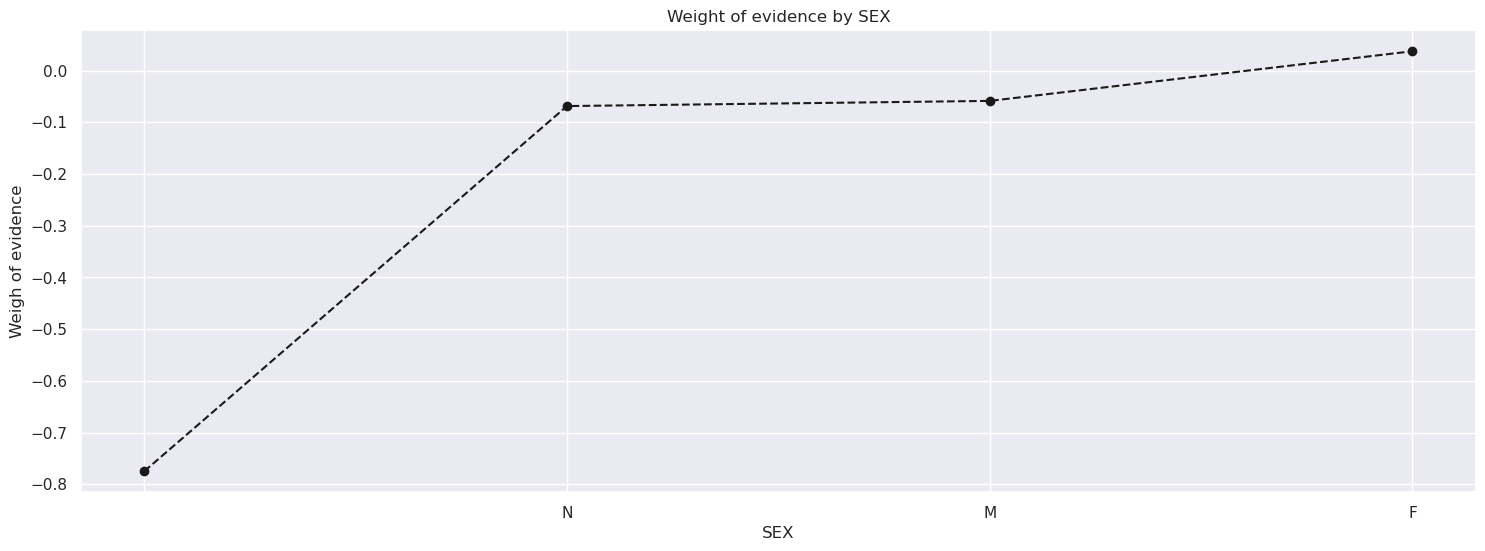

In [56]:
plot_by_WoE(df_temp)

In [57]:
#df_inputs_prepr['SEX_blank_N']= sum([df_inputs_prepr['SEX: '],df_inputs_prepr['SEX:N']])

In [58]:
df_temp = WoE_discrete(df_inputs_prepr, 'RESIDENCIAL_STATE', df_targets_prepr)

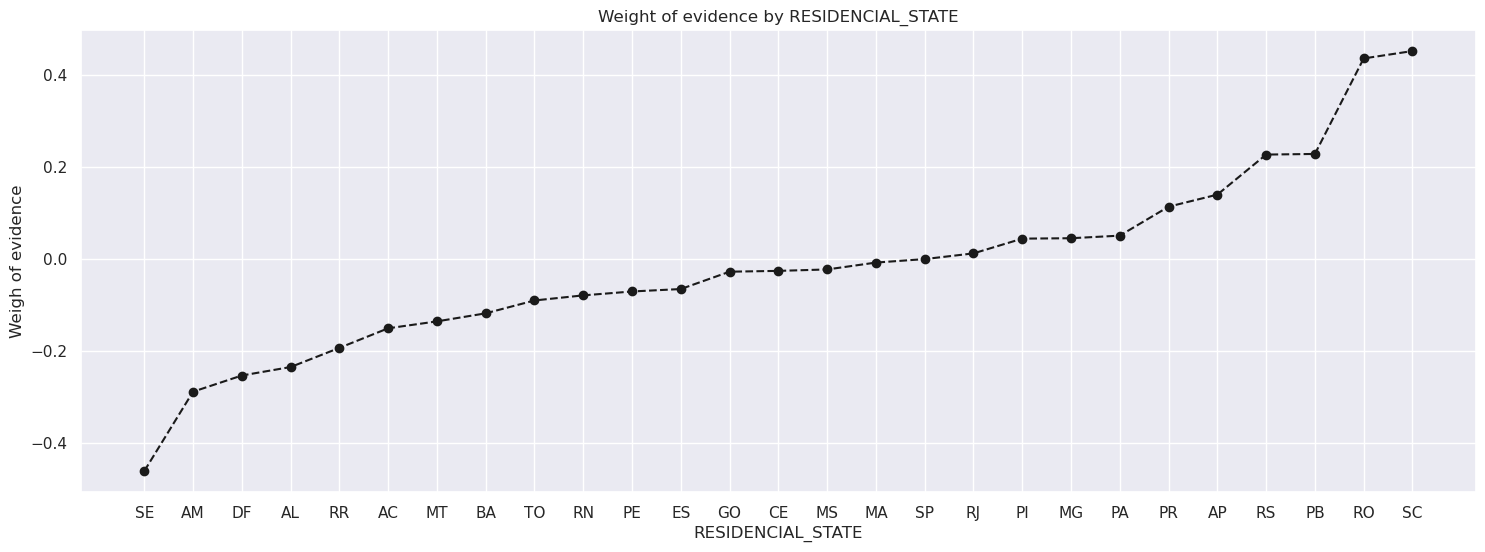

In [59]:
plot_by_WoE(df_temp)

In [60]:
df_inputs_prepr['state_resi:SE'] = sum([df_inputs_prepr['state_resi:SE']])

df_inputs_prepr['state_resi:AC_DF_AM_AL'] = sum([df_inputs_prepr['state_resi:AC'],df_inputs_prepr['state_resi:DF'],
                                              df_inputs_prepr['state_resi:AM'],df_inputs_prepr['state_resi:AL']])

df_inputs_prepr['state_resi:RN_ES_GO_RR'] = sum([df_inputs_prepr['state_resi:RN'],df_inputs_prepr['state_resi:ES'],
                                              df_inputs_prepr['state_resi:GO'],df_inputs_prepr['state_resi:RR']])

df_inputs_prepr['state_resi:BA_PE'] = sum([df_inputs_prepr['state_resi:BA'],df_inputs_prepr['state_resi:PE']])

df_inputs_prepr['state_resi:MS_MT_RJ_MA_CE'] = sum([df_inputs_prepr['state_resi:MS'],df_inputs_prepr['state_resi:MT'],
                                              df_inputs_prepr['state_resi:RJ'],df_inputs_prepr['state_resi:MA'],
                                                   df_inputs_prepr['state_resi:CE']])

df_inputs_prepr['state_resi:SP'] = sum([df_inputs_prepr['state_resi:SP']])

df_inputs_prepr['state_resi:PA_PI_MG'] = sum([df_inputs_prepr['state_resi:PI'],df_inputs_prepr['state_resi:MG'],
                                             df_inputs_prepr['state_resi:PA']])


df_inputs_prepr['state_resi:TO_AP_PR_PB_RS'] = sum([df_inputs_prepr['state_resi:TO'],df_inputs_prepr['state_resi:AP'],
                                              df_inputs_prepr['state_resi:PR'],df_inputs_prepr['state_resi:PB'],
                                                   df_inputs_prepr['state_resi:RS']])


df_inputs_prepr['state_resi:SC_RO'] = sum([df_inputs_prepr['state_resi:SC'],df_inputs_prepr['state_resi:RO']])

In [61]:
df_temp = WoE_discrete(df_inputs_prepr, 'QUANT_DEPENDANTS', df_targets_prepr)

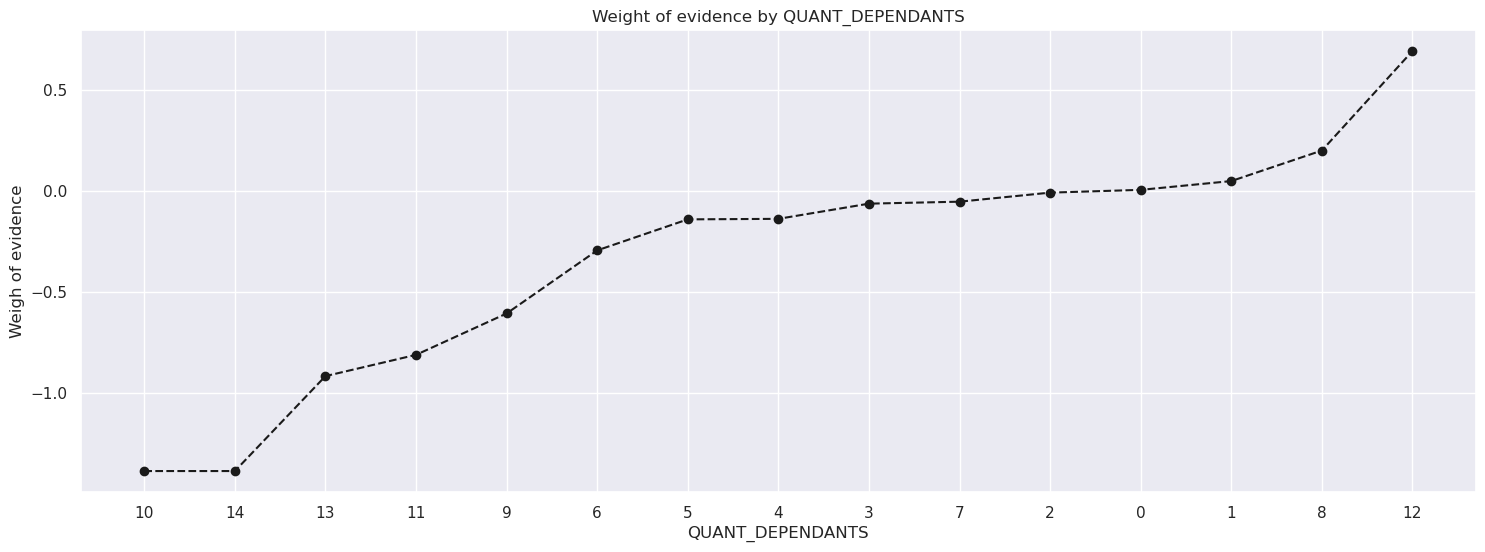

In [62]:
plot_by_WoE(df_temp)

In [63]:
df_inputs_prepr['dependant_10_13'] = sum([df_inputs_prepr['dependant:10'],df_inputs_prepr['dependant:13']])

df_inputs_prepr['dependant_9_14'] = sum([df_inputs_prepr['dependant:9'],df_inputs_prepr['dependant:14']])

df_inputs_prepr['dependant_6_8_4_5_11'] = sum([df_inputs_prepr['dependant:6'],df_inputs_prepr['dependant:8']
                                           ,df_inputs_prepr['dependant:4'],df_inputs_prepr['dependant:5'],
                                              df_inputs_prepr['dependant:11']])


df_inputs_prepr['dependant_3_2'] = sum([df_inputs_prepr['dependant:3'],df_inputs_prepr['dependant:2']])

df_inputs_prepr['dependant_0'] = sum([df_inputs_prepr['dependant:0']])

df_inputs_prepr['dependant_1'] = sum([df_inputs_prepr['dependant:1']])

df_inputs_prepr['dependant_12_15_7'] = sum([df_inputs_prepr['dependant:12'],df_inputs_prepr['dependant:15']
                                           ,df_inputs_prepr['dependant:7']])

In [64]:
df_temp = WoE_discrete(df_inputs_prepr, 'RESIDENCE_TYPE', df_targets_prepr)

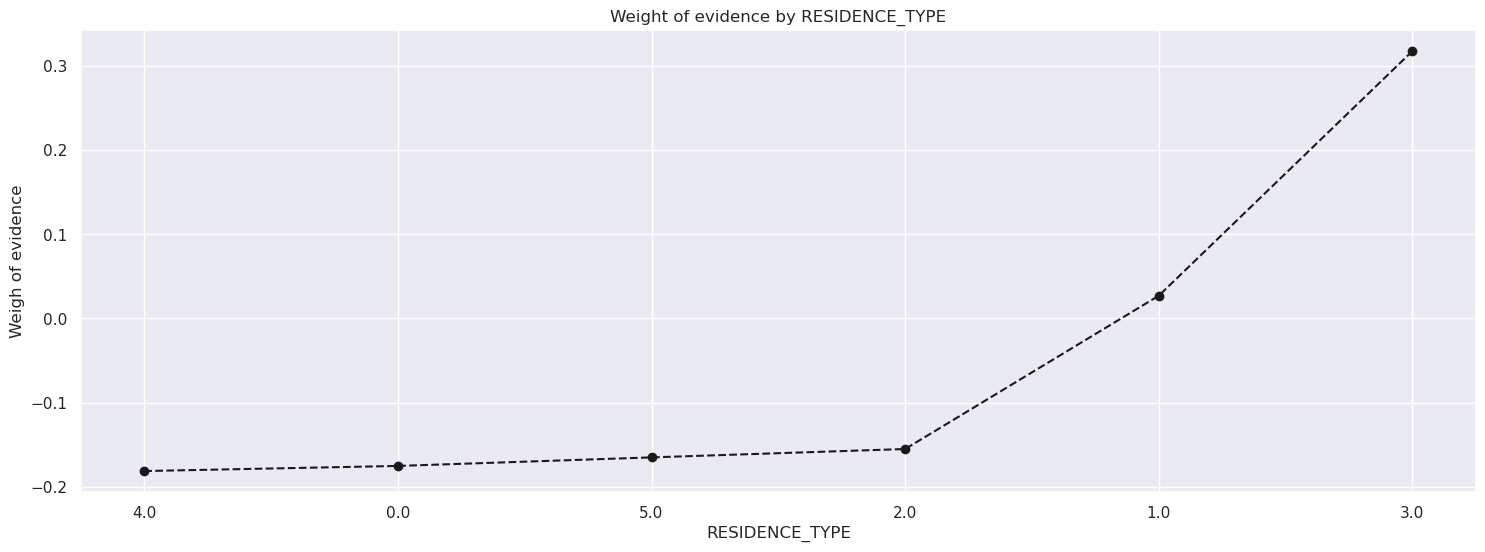

In [65]:
plot_by_WoE(df_temp)

In [66]:
df_inputs_prepr['resi_type_2'] = sum([df_inputs_prepr['resi_type:2.0']])
df_inputs_prepr['resi_type_0_5_4'] = sum([df_inputs_prepr['resi_type:0.0'],df_inputs_prepr['resi_type:5.0']
                                           ,df_inputs_prepr['resi_type:4.0']])
df_inputs_prepr['resi_type_1'] = sum([df_inputs_prepr['resi_type:1.0']])
df_inputs_prepr['resi_type_3'] = sum([df_inputs_prepr['resi_type:3.0']])

In [67]:
df_temp = WoE_discrete(df_inputs_prepr, 'PROFESSION_CODE', df_targets_prepr)

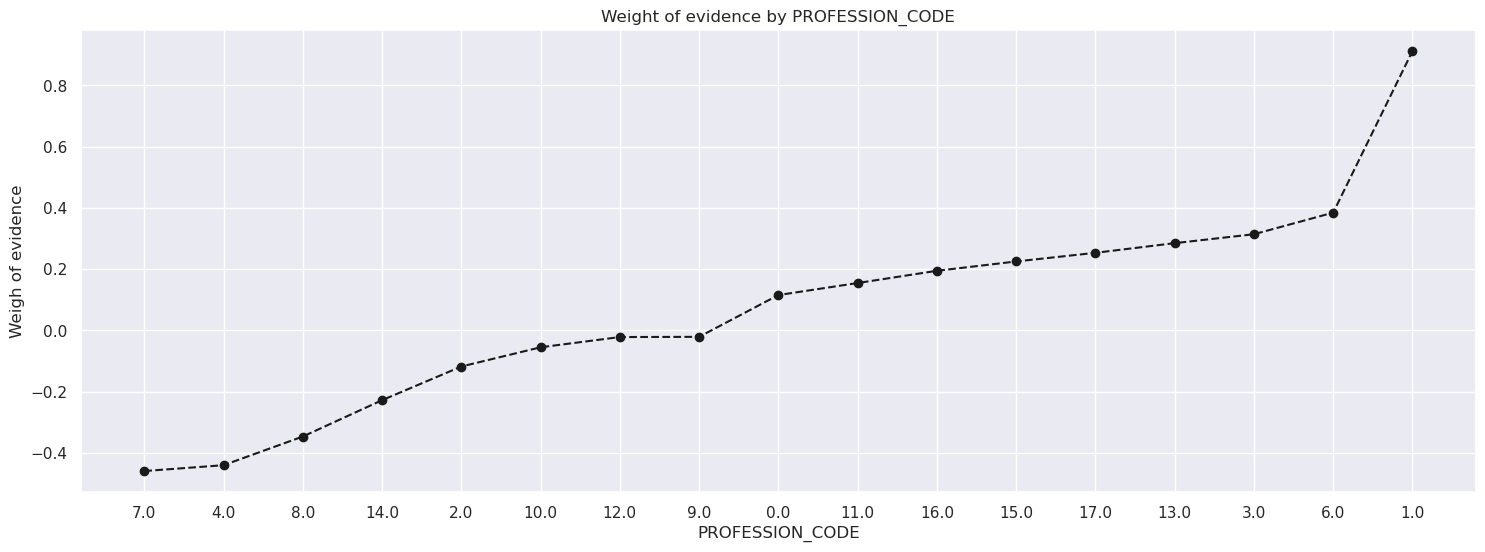

In [68]:
plot_by_WoE(df_temp)

In [69]:
df_inputs_prepr['prof_code_14'] = sum([df_inputs_prepr['prof_code:14.0']])
df_inputs_prepr['prof_code_7_8'] = sum([df_inputs_prepr['prof_code:7.0'],df_inputs_prepr['prof_code:8.0']])

df_inputs_prepr['prof_code_4_15_3'] = sum([df_inputs_prepr['prof_code:4.0'],df_inputs_prepr['prof_code:15.0']
                                          ,df_inputs_prepr['prof_code:3.0']])

df_inputs_prepr['prof_code_2_10'] = sum([df_inputs_prepr['prof_code:2.0'],df_inputs_prepr['prof_code:10.0']])

df_inputs_prepr['prof_code_9'] = sum([df_inputs_prepr['prof_code:9.0']])

df_inputs_prepr['prof_code_0_1'] = sum([df_inputs_prepr['prof_code:0.0'],df_inputs_prepr['prof_code:1.0']])

df_inputs_prepr['prof_code_12_11'] = sum([df_inputs_prepr['prof_code:12.0'],df_inputs_prepr['prof_code:11.0']])

df_inputs_prepr['prof_code_13_16_6_17_5_18'] = sum([df_inputs_prepr['prof_code:13.0'],df_inputs_prepr['prof_code:16.0']
                                          ,df_inputs_prepr['prof_code:6.0'],df_inputs_prepr['prof_code:17.0']
                                          ,df_inputs_prepr['prof_code:5.0'],df_inputs_prepr['prof_code:18.0']])



In [70]:
def WoE_ordered_continuos (df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
    df['n_good'] = df['prop_good'] * df['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
   # df = df.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
   # df = df.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
    df['diff_prop_good'] = df['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['diff_WoE'] = df['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
# We sum all values of a given column.
    return df


In [71]:
df_inputs_prepr['MONTHS_IN_RESIDENCE_Factor']= pd.cut(df_inputs_prepr['MONTHS_IN_RESIDENCE'],50)

In [72]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'MONTHS_IN_RESIDENCE_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


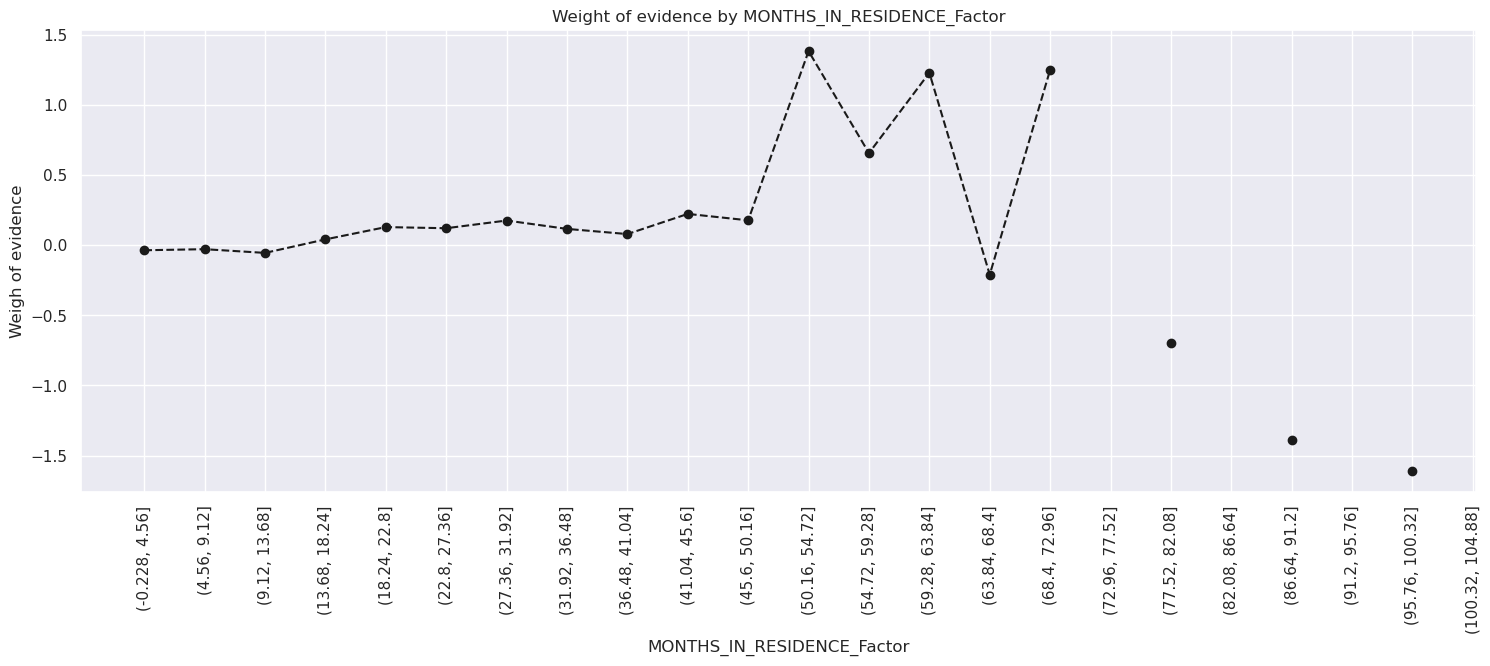

In [73]:
plot_by_WoE(df_temp,90)

In [74]:
df_inputs_prepr['MONTHS_IN_RESIDENCE: <5'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(3)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 5-12'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(3,13)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 13-24'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(13,26)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 25-40'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(26,41)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 41-44'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(41,45)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 45-48'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(45,49)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 49-60'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(49,61)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: >60'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(61, int(df_inputs_prepr['MONTHS_IN_RESIDENCE'].max()))),1,0)

In [75]:
df_inputs_prepr['PERSONAL_MONTHLY_INCOME_Factor']= pd.cut(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'],650)

In [76]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'PERSONAL_MONTHLY_INCOME_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


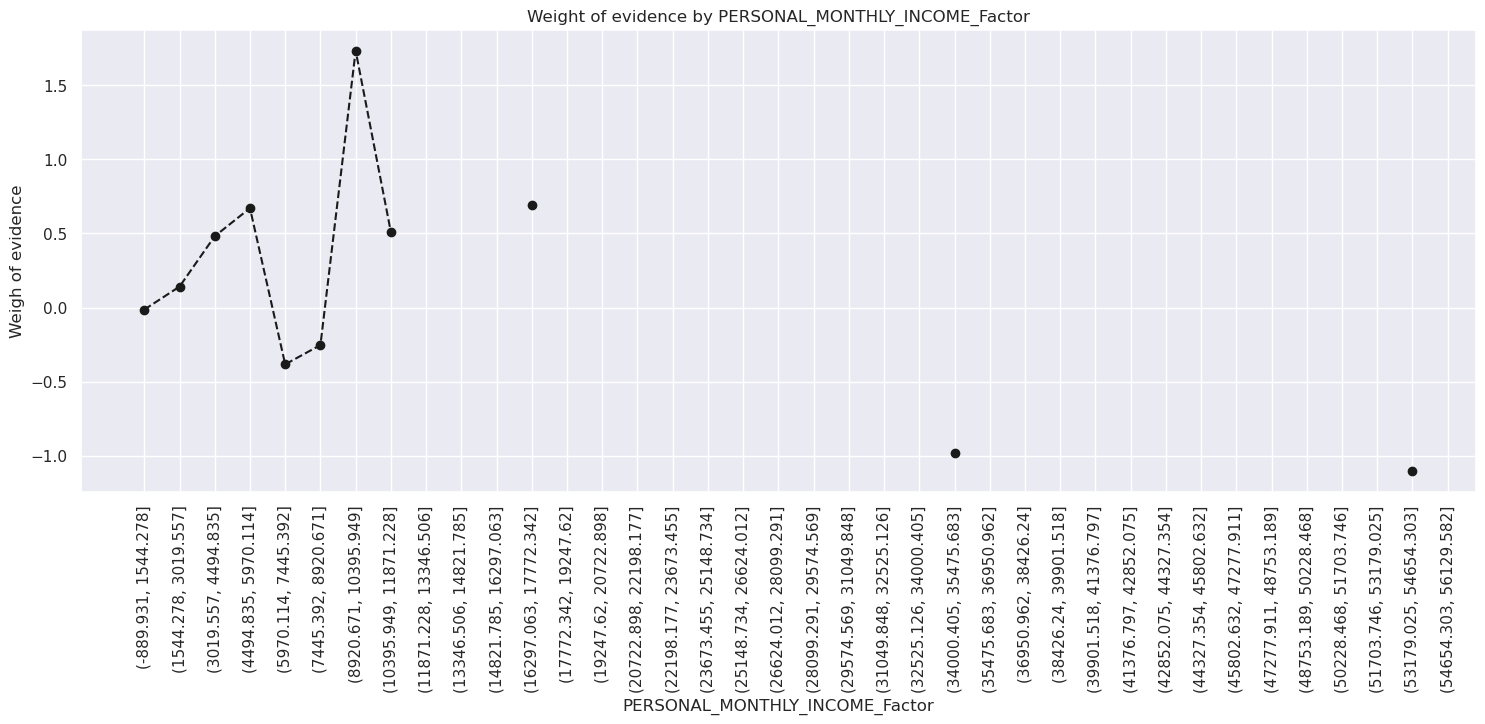

In [77]:
plot_by_WoE(df_temp,90)

In [78]:
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: <256.479'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(256)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 256-845.915'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(256,845)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 845-1238.872'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(845,1238)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 1238-2221.265'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(1238,2221)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 2221-2515.983'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(2221,2515)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 2515-3011.18'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(2515,3007)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 3007-4485'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(3007,4485)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 4485-8911'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(4485,8911)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 8911-10900'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(8911,10900)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: >10900'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(10900, int(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].max()))),1,0)

In [79]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['PERSONAL_MONTHLY_INCOME']< 3010, :]

In [80]:
df_inputs_prepr_temp['month_income_factor']= pd.cut(df_inputs_prepr_temp['PERSONAL_MONTHLY_INCOME'],30)
df_temp = WoE_ordered_continuos(df_inputs_prepr_temp, 'month_income_factor', df_targets_prepr[df_inputs_prepr_temp.index])

/tmp/ipykernel_158/1931532635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['month_income_factor']= pd.cut(df_inputs_prepr_temp['PERSONAL_MONTHLY_INCOME'],30)


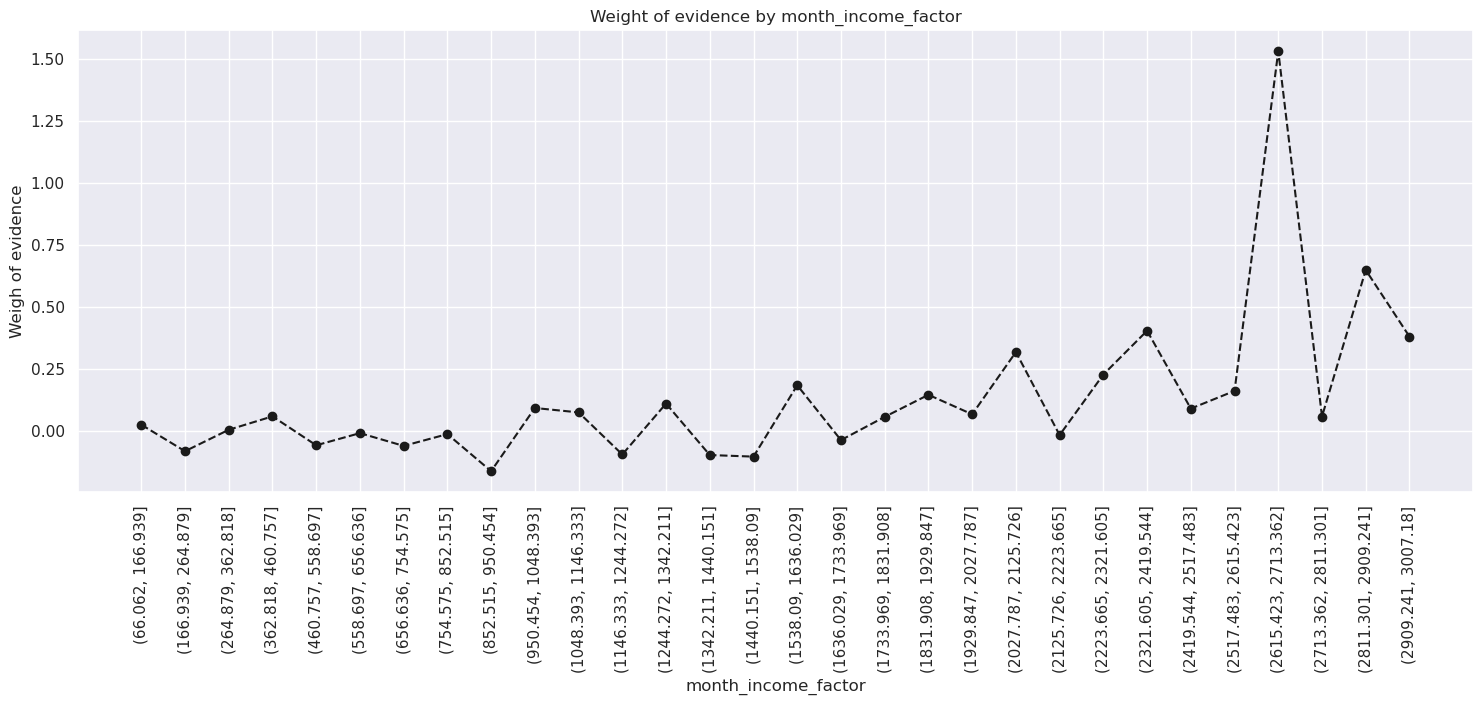

In [81]:
plot_by_WoE(df_temp,90)

In [82]:
df_inputs_prepr['AGE_Factor']= pd.cut(df_inputs_prepr['AGE'],30)

In [83]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'AGE_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


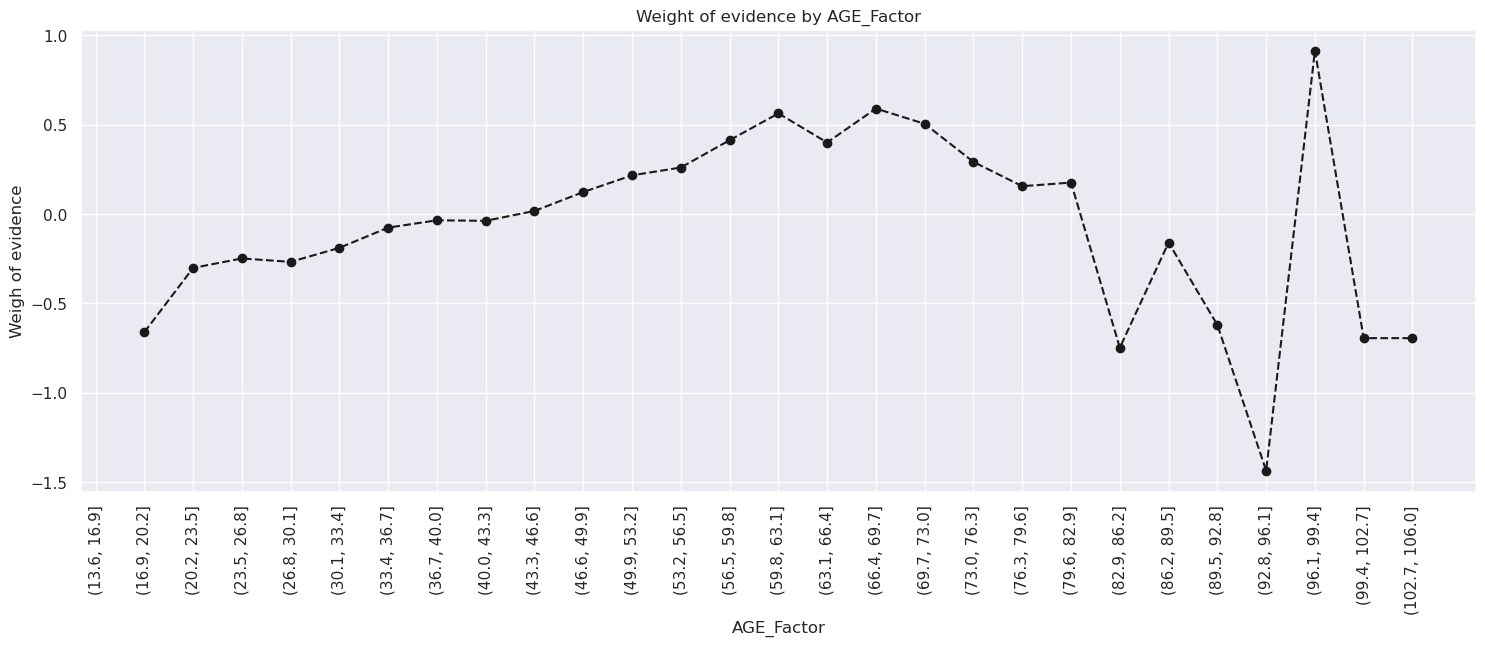

In [84]:
plot_by_WoE(df_temp,90)

In [85]:
df_inputs_prepr['AGE: <16.9'] = np.where(df_inputs_prepr['AGE'].isin(range(17)),1,0)
df_inputs_prepr['AGE: 16.9-30'] = np.where(df_inputs_prepr['AGE'].isin(range(17,23)),1,0)
df_inputs_prepr['AGE: 31-43.3'] = np.where(df_inputs_prepr['AGE'].isin(range(23,43)),1,0)
df_inputs_prepr['AGE: 43-56.5'] = np.where(df_inputs_prepr['AGE'].isin(range(43,57)),1,0)
df_inputs_prepr['AGE: 56-66.4'] = np.where(df_inputs_prepr['AGE'].isin(range(57,66)),1,0)
df_inputs_prepr['AGE: 66-82.9'] = np.where(df_inputs_prepr['AGE'].isin(range(66,83)),1,0)
df_inputs_prepr['AGE: >83'] = np.where(df_inputs_prepr['AGE'].isin(range(83, int(df_inputs_prepr['AGE'].max()))),1,0)

In [86]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'MONTHS_IN_THE_JOB', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


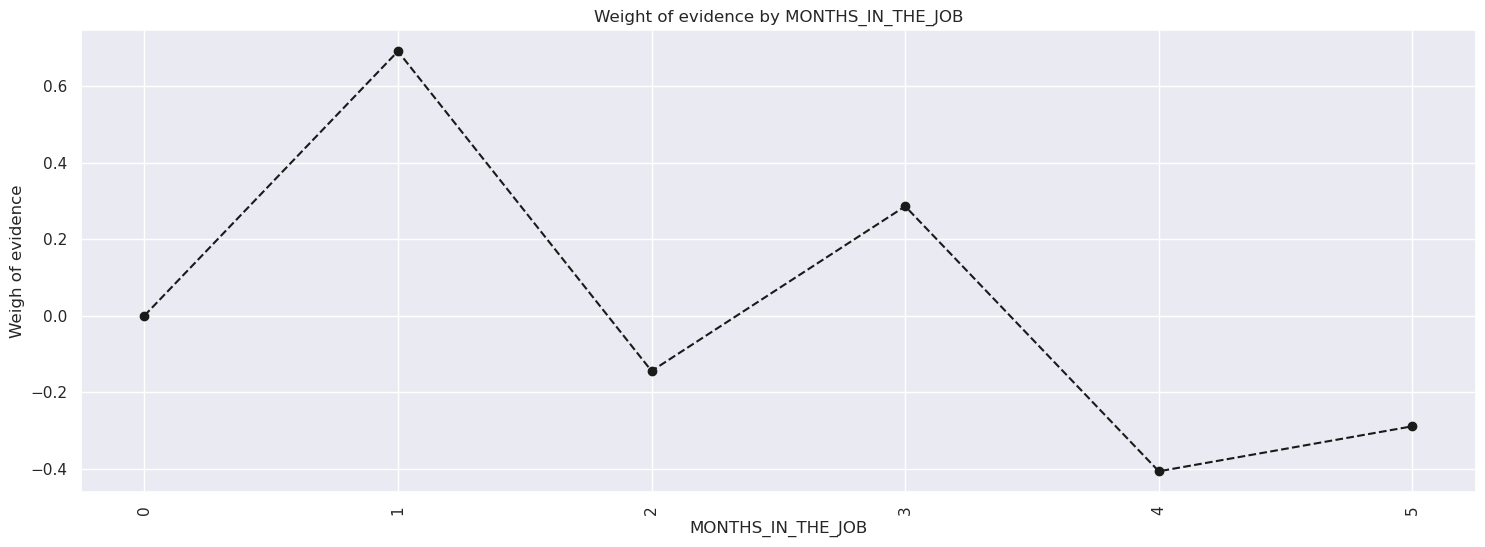

In [87]:
plot_by_WoE(df_temp,90)

In [88]:
df_inputs_prepr['MONTHS_IN_THE_JOB: <0'] = np.where(df_inputs_prepr['MONTHS_IN_THE_JOB'].isin(range(0)),1,0)
df_inputs_prepr['MONTHS_IN_THE_JOB: >1'] = np.where(df_inputs_prepr['MONTHS_IN_THE_JOB'].isin(range(1, int(df_inputs_prepr['MONTHS_IN_THE_JOB'].max()))),1,0)

In [89]:
df_temp = WoE_discrete(df_inputs_prepr, 'PAYMENT_DAY', df_targets_prepr)

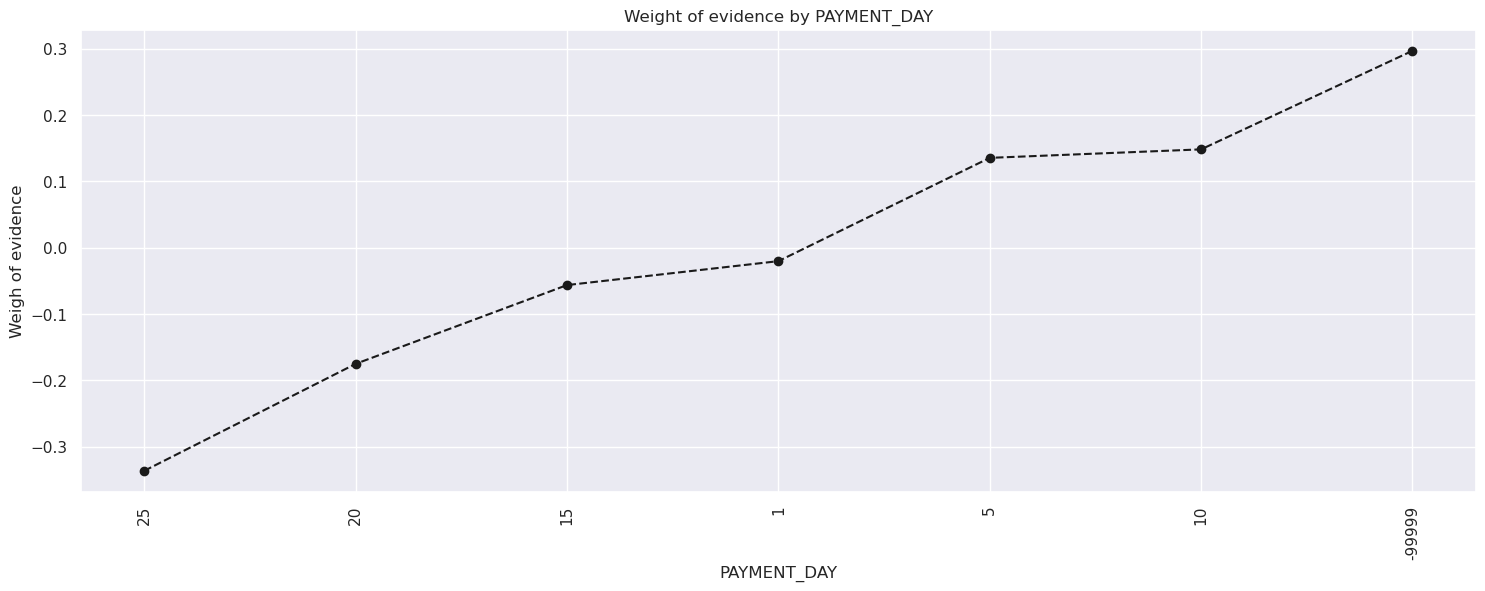

In [90]:
plot_by_WoE(df_temp,90)

In [91]:
for column in cr_data_inputs_train.columns:
    print(f'"{column}",')

"ID_CLIENT",
"CLERK_TYPE",
"PAYMENT_DAY",
"APPLICATION_SUBMISSION_TYPE",
"QUANT_ADDITIONAL_CARDS",
"POSTAL_ADDRESS_TYPE",
"SEX",
"MARITAL_STATUS",
"QUANT_DEPENDANTS",
"EDUCATION_LEVEL",
"STATE_OF_BIRTH",
"CITY_OF_BIRTH",
"NATIONALITY",
"RESIDENCIAL_STATE",
"RESIDENCIAL_CITY",
"RESIDENCIAL_BOROUGH",
"FLAG_RESIDENCIAL_PHONE",
"RESIDENCIAL_PHONE_AREA_CODE",
"RESIDENCE_TYPE",
"MONTHS_IN_RESIDENCE",
"FLAG_MOBILE_PHONE",
"FLAG_EMAIL",
"PERSONAL_MONTHLY_INCOME",
"OTHER_INCOMES",
"FLAG_VISA",
"FLAG_MASTERCARD",
"FLAG_DINERS",
"FLAG_AMERICAN_EXPRESS",
"FLAG_OTHER_CARDS",
"QUANT_BANKING_ACCOUNTS",
"QUANT_SPECIAL_BANKING_ACCOUNTS",
"PERSONAL_ASSETS_VALUE",
"QUANT_CARS",
"COMPANY",
"PROFESSIONAL_STATE",
"PROFESSIONAL_CITY",
"PROFESSIONAL_BOROUGH",
"FLAG_PROFESSIONAL_PHONE",
"PROFESSIONAL_PHONE_AREA_CODE",
"MONTHS_IN_THE_JOB",
"PROFESSION_CODE",
"OCCUPATION_TYPE",
"MATE_PROFESSION_CODE",
"EDUCATION_LEVEL.1",
"FLAG_HOME_ADDRESS_DOCUMENT",
"FLAG_RG",
"FLAG_CPF",
"FLAG_INCOME_PROOF",
"PRODUCT",
"FLAG_

# Training data Implementation (Imbalance Handling)

In [92]:
inputs_train_with_ref_cat = cr_data_inputs_train.loc[: , ["app_type:0",
"app_type:Carga",
"app_type:Web",
"postal_code:1",
"postal_code:2",
"marital:0",
"marital:1",
"marital:2",
"marital:3",
"marital:4",
"marital:5",
"marital:6",
"marital:7",
"dependant:0",
"dependant:1",
"dependant:2",
"dependant:3",
"dependant:4",
"dependant:5",
"dependant:6",
"dependant:7",
"dependant:8",
"dependant:9",
"dependant:10",
"dependant:11",
"dependant:12",
"dependant:13",
"dependant:14",
"dependant:15",
"dependant:53",
"state_birth: ",
"state_birth:AC",
"state_birth:AL",
"state_birth:AM",
"state_birth:AP",
"state_birth:BA",
"state_birth:CE",
"state_birth:DF",
"state_birth:ES",
"state_birth:GO",
"state_birth:MA",
"state_birth:MG",
"state_birth:MS",
"state_birth:MT",
"state_birth:PA",
"state_birth:PB",
"state_birth:PE",
"state_birth:PI",
"state_birth:PR",
"state_birth:RJ",
"state_birth:RN",
"state_birth:RO",
"state_birth:RR",
"state_birth:RS",
"state_birth:SC",
"state_birth:SE",
"state_birth:SP",
"state_birth:TO",
"state_birth:XX",
"nationality:0",
"nationality:1",
"nationality:2",
"state_resi:AC",
"state_resi:AL",
"state_resi:AM",
"state_resi:AP",
"state_resi:BA",
"state_resi:CE",
"state_resi:DF",
"state_resi:ES",
"state_resi:GO",
"state_resi:MA",
"state_resi:MG",
"state_resi:MS",
"state_resi:MT",
"state_resi:PA",
"state_resi:PB",
"state_resi:PE",
"state_resi:PI",
"state_resi:PR",
"state_resi:RJ",
"state_resi:RN",
"state_resi:RO",
"state_resi:RR",
"state_resi:RS",
"state_resi:SC",
"state_resi:SE",
"state_resi:SP",
"state_resi:TO",
"resi_type:0.0",
"resi_type:1.0",
"resi_type:2.0",
"resi_type:3.0",
"resi_type:4.0",
"resi_type:5.0",
"phone:N",
"visa:0",
"visa:1",
"master:0",
"master:1",
"diners:0",
"diners:1",
"american:0",
"american:1",
"other_card:0",
"other_card:1",
"b_account:0",
"b_account:1",
"b_account:2",
"car:0",
"car:1",
"company:N",
"company:Y",
"prof_code:0.0",
"prof_code:1.0",
"prof_code:2.0",
"prof_code:3.0",
"prof_code:4.0",
"prof_code:5.0",
"prof_code:6.0",
"prof_code:7.0",
"prof_code:8.0",
"prof_code:9.0",
"prof_code:10.0",
"prof_code:11.0",
"prof_code:12.0",
"prof_code:13.0",
"prof_code:14.0",
"prof_code:15.0",
"prof_code:16.0",
"prof_code:17.0",
"prof_code:18.0",
"occ_type:0.0",
"occ_type:1.0",
"occ_type:2.0",
"occ_type:3.0",
"occ_type:4.0",
"occ_type:5.0",
"product:1",
"product:2",
"product:7",
"delinquency:N",
"educational:0.0",
"educational:1.0",
"educational:2.0",
"educational:3.0",
"educational:4.0",
"educational:5.0",
"payment_day:-99999",
"payment_day:1",
"payment_day:5",
"payment_day:10",
"payment_day:15",
"payment_day:20",
"payment_day:25",
"state_resi:AC_DF_AM_AL",
"state_resi:RN_ES_GO_RR",
"state_resi:BA_PE",
"state_resi:MS_MT_RJ_MA_CE",
"state_resi:PA_PI_MG",
"state_resi:TO_AP_PR_PB_RS",
"state_resi:SC_RO",
"dependant_10_13",
"dependant_9_14",
"dependant_6_8_4_5_11",
"dependant_3_2",
"dependant_0",
"dependant_1",
"dependant_12_15_7",
"resi_type_2",
"resi_type_0_5_4",
"resi_type_1",
"resi_type_3",
"prof_code_14",
"prof_code_7_8",
"prof_code_4_15_3",
"prof_code_2_10",
"prof_code_9",
"prof_code_0_1",
"prof_code_12_11",
"prof_code_13_16_6_17_5_18",
"MONTHS_IN_RESIDENCE_Factor",
"MONTHS_IN_RESIDENCE: <5",
"MONTHS_IN_RESIDENCE: 5-12",
"MONTHS_IN_RESIDENCE: 13-24",
"MONTHS_IN_RESIDENCE: 25-40",
"MONTHS_IN_RESIDENCE: 41-44",
"MONTHS_IN_RESIDENCE: 45-48",
"MONTHS_IN_RESIDENCE: 49-60",
"MONTHS_IN_RESIDENCE: >60",
"PERSONAL_MONTHLY_INCOME_Factor",
"PERSONAL_MONTHLY_INCOME: <256.479",
"PERSONAL_MONTHLY_INCOME: 256-845.915",
"PERSONAL_MONTHLY_INCOME: 845-1238.872",
"PERSONAL_MONTHLY_INCOME: 1238-2221.265",
"PERSONAL_MONTHLY_INCOME: 2221-2515.983",
"PERSONAL_MONTHLY_INCOME: 2515-3011.18",
"PERSONAL_MONTHLY_INCOME: 3007-4485",
"PERSONAL_MONTHLY_INCOME: 4485-8911",
"PERSONAL_MONTHLY_INCOME: 8911-10900",
"PERSONAL_MONTHLY_INCOME: >10900",
"AGE_Factor",
"AGE: <16.9",
"AGE: 16.9-30",
"AGE: 31-43.3",
"AGE: 43-56.5",
"AGE: 56-66.4",
"AGE: 66-82.9",
"AGE: >83",
"MONTHS_IN_THE_JOB: <0",
"MONTHS_IN_THE_JOB: >1"]]

In [93]:
ref_categories = [
'company:Y',
'marital:1',
'MONTHS_IN_RESIDENCE: >60',
"AGE_Factor",
'MONTHS_IN_THE_JOB: <0',
"delinquency:N",
"MONTHS_IN_RESIDENCE_Factor",
"PERSONAL_MONTHLY_INCOME_Factor",
'occ_type:4.0',
'payment_day:25',
'PERSONAL_MONTHLY_INCOME: 845-1238.872',
'product:7',
'postal_code:2',
'resi_type_2',
'state_resi:SE'
]

In [94]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis =1)

In [95]:
reg = LogisticRegression()

In [96]:
pd.options.display.max_rows = None

In [97]:
reg.fit(inputs_train, cr_data_targets_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
reg.intercept_

array([-0.38608503])

In [99]:
reg.coef_

array([[-0.14308595, -0.09503605, -0.12232829, -0.05764593,  0.10649558,
         0.21767663,  0.25317108,  0.12303835,  0.00256731, -0.03359099,
         0.0489877 ,  0.12642448,  0.15110636,  0.09893949,  0.03973988,
         0.12421955,  0.09130264, -0.08089283, -0.03413026,  0.17567521,
        -0.21967979, -0.48079443, -0.37075161,  0.08891886, -0.12014527,
        -0.07048268,  0.05296271,  0.0671374 ,  0.50309549, -0.40125462,
         0.05088295,  0.16823761, -0.37239163,  0.12551735,  0.0166359 ,
        -0.02883766, -0.00456729,  0.08904443, -0.00139917,  0.15978412,
        -0.0622839 , -0.19642765, -0.25377931,  0.22440447,  0.17128649,
        -0.04485116,  0.19240484, -0.16297585,  0.12856636, -0.38221742,
        -0.38069929, -0.09868993,  0.07241546,  0.00650371, -0.06781721,
         0.11440974,  0.07455288, -0.36490213,  0.22333125, -0.21887942,
         0.44566669, -0.07963037, -0.18147658,  0.47477632,  0.02097984,
        -0.02044324, -0.10193951,  0.03274134,  0.1

In [100]:
feature_name = inputs_train.columns.values

In [101]:
summary_table = pd.DataFrame(columns = ['feature names'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

## PI values Logistics ression

In [102]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
       
        
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [103]:
reg = LogisticRegression_with_p_values()

In [104]:
reg.fit(inputs_train, cr_data_targets_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_158/1869829735.py:16: RuntimeWarning: invalid value encountered in sqrt
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))


In [105]:
summary_table = pd.DataFrame(columns = ['feature names'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [106]:
p_values = reg.p_values

In [107]:
p_values = np.append(np.nan, np.array(p_values))

In [108]:
summary_table['p_values'] = p_values

In [109]:
summary_table['p_values'] = summary_table['p_values'].apply(lambda x: format(x, '.8f'))

In [110]:
summary_table

feature names  Coefficients    p_values
0                                 Intercept     -0.386085         nan
1                                app_type:0     -0.143086         nan
2                            app_type:Carga     -0.095036         nan
3                              app_type:Web     -0.122328  0.99999937
4                             postal_code:1     -0.057646  0.58070220
5                                 marital:0      0.106496  0.43079705
6                                 marital:2      0.217677  0.00000000
7                                 marital:3      0.253171  0.00173248
8                                 marital:4      0.123038  0.00094506
9                                 marital:5      0.002567  0.96278269
10                                marital:6     -0.033591  0.46060551
11                                marital:7      0.048988  0.55236374
12                              dependant:0      0.126424  0.99999965
13                              dependant:1      0.151106  0.99999998
14                              dependant:2      0.098939  0.99999987
15                              dependant:3      0.039740  0.99999997
16                              dependant:4      0.124220  0.99999992
17                              dependant:5      0.091303  0.99999994
18                              dependant:6     -0.080893  0.99999994
19                              dependant:7     -0.034130         nan
20                              dependant:8      0.175675  0.99999988
21                              dependant:9     -0.219680         nan
22                             dependant:10     -0.480794         nan
23                             dependant:11     -0.370752  0.99999975
24                             dependant:12      0.088919         nan
25                             dependant:13     -0.120145         nan
26                             dependant:14     -0.070483         nan
27                             dependant:15      0.052963         nan
28                             dependant:53      0.067137  0.99999891
29                            state_birth:       0.503095  0.99999913
30                           state_birth:AC     -0.401255  0.99999891
31                           state_birth:AL      0.050883  0.99999993
32                           state_birth:AM      0.168238         nan
33                           state_birth:AP     -0.372392  0.99999545
34                           state_birth:BA      0.125517  0.99999983
35                           state_birth:CE      0.016636         nan
36                           state_birth:DF     -0.028838         nan
37                           state_birth:ES     -0.004567  0.99999999
38                           state_birth:GO      0.089044         nan
39                           state_birth:MA     -0.001399         nan
40                           state_birth:MG      0.159784         nan
41                           state_birth:MS     -0.062284         nan
42                           state_birth:MT     -0.196428  0.99999956
43                           state_birth:PA     -0.253779  0.99999958
44                           state_birth:PB      0.224404  0.99999974
45                           state_birth:PE      0.171286  0.99999972
46                           state_birth:PI     -0.044851         nan
47                           state_birth:PR      0.192405         nan
48                           state_birth:RJ     -0.162976         nan
49                           state_birth:RN      0.128566  0.99999963
50                           state_birth:RO     -0.382217         nan
51                           state_birth:RR     -0.380699         nan
52                           state_birth:RS     -0.098690         nan
53                           state_birth:SC      0.072415  0.99999974
54                           state_birth:SE      0.006504  0.99999999
55                           state_birth:SP     -0.067817  0.99999992
56                           state_birth

In [111]:
#summary_table.dtypes
# Convert 'p_values' to numeric, coercing errors to NaN
summary_table['p_values'] = pd.to_numeric(summary_table['p_values'], errors='coerce')

# Now filter the DataFrame
filtered_table = summary_table[summary_table['p_values'] >= 0.05]
filtered_table

feature names  Coefficients  p_values
3                              app_type:Web     -0.122328  0.999999
4                             postal_code:1     -0.057646  0.580702
5                                 marital:0      0.106496  0.430797
9                                 marital:5      0.002567  0.962783
10                                marital:6     -0.033591  0.460606
11                                marital:7      0.048988  0.552364
12                              dependant:0      0.126424  1.000000
13                              dependant:1      0.151106  1.000000
14                              dependant:2      0.098939  1.000000
15                              dependant:3      0.039740  1.000000
16                              dependant:4      0.124220  1.000000
17                              dependant:5      0.091303  1.000000
18                              dependant:6     -0.080893  1.000000
20                              dependant:8      0.175675  1.000000
23                             dependant:11     -0.370752  1.000000
28                             dependant:53      0.067137  0.999999
29                            state_birth:       0.503095  0.999999
30                           state_birth:AC     -0.401255  0.999999
31                           state_birth:AL      0.050883  1.000000
33                           state_birth:AP     -0.372392  0.999995
34                           state_birth:BA      0.125517  1.000000
37                           state_birth:ES     -0.004567  1.000000
42                           state_birth:MT     -0.196428  1.000000
43                           state_birth:PA     -0.253779  1.000000
44                           state_birth:PB      0.224404  1.000000
45                           state_birth:PE      0.171286  1.000000
49                           state_birth:RN      0.128566  1.000000
53                           state_birth:SC      0.072415  1.000000
54                           state_birth:SE      0.006504  1.000000
55                           state_birth:SP     -0.067817  1.000000
61                            state_resi:AC      0.445667  1.000000
62                            state_resi:AL     -0.079630  1.000000
63                            state_resi:AM     -0.181477  1.000000
64                            state_resi:AP      0.474776  0.999999
65                            state_resi:BA      0.020980  1.000000
67                            state_resi:DF     -0.101940  1.000000
68                            state_resi:ES      0.032741  1.000000
69                            state_resi:GO      0.155068  1.000000
75                            state_resi:PB     -0.041013  1.000000
76                            state_resi:PE      0.015622  1.000000
78                            state_resi:PR     -0.093782  1.000000
80                            state_resi:RN     -0.049782  1.000000
81                            state_resi:RO      0.319918  1.000000
82                            state_resi:RR     -0.035231  1.000000
83                            state_resi:RS      0.201793  1.000000
84                            state_resi:SC      0.199130  1.000000
86                            state_resi:TO     -0.190865  1.000000
87                            resi_type:0.0     -0.148825  1.000000
91                            resi_type:4.0     -0.092671  1.000000
92                            resi_type:5.0      0.001251  1.000000
93                                  phone:N     -0.360450  0.999999
96                                 master:0     -0.305012  0.999997
102                            other_card:0      0.072415  1.000000
103                            other_card:1     -0.432865  0.999999
105                             b_account:1      0.093680  0.999999
107                                   car:0     -0.118110  0.999996
108                                   car:1     -0.242340  0.999999
110                           prof_code:0.0      0.041632  1.000000
111               

In [112]:
inputs_train_with_ref_cat = cr_data_inputs_train.loc[:  , ["app_type:0",
"app_type:Carga",
"app_type:Web",
"postal_code:1",
"postal_code:2",
"marital:0",
"marital:2",
"marital:3",
"marital:4",
"marital:5",
"marital:6",
"marital:7",
"dependant:0",
"dependant:1",
"dependant:2",
"dependant:3",
"dependant:4",
"dependant:5",
"dependant:6",
"dependant:7",
"dependant:8",
"dependant:9",
"dependant:10",
"dependant:11",
"dependant:12",
"dependant:13",
"dependant:14",
"dependant:15",
"dependant:53",
"state_birth: ",
"state_birth:AC",
"state_birth:AL",
"state_birth:AM",
"state_birth:AP",
"state_birth:BA",
"state_birth:CE",
"state_birth:DF",
"state_birth:ES",
"state_birth:GO",
"state_birth:MA",
"state_birth:MG",
"state_birth:MS",
"state_birth:MT",
"state_birth:PA",
"state_birth:PB",
"state_birth:PE",
"state_birth:PI",
"state_birth:PR",
"state_birth:RJ",
"state_birth:RN",
"state_birth:RO",
"state_birth:RR",
"state_birth:RS",
"state_birth:SC",
"state_birth:SE",
"state_birth:SP",
"state_birth:TO",
"state_birth:XX",
"nationality:0",
"nationality:1",
"nationality:2",
"state_resi:AC",
"state_resi:AL",
"state_resi:AM",
"state_resi:AP",
"state_resi:BA",
"state_resi:CE",
"state_resi:DF",
"state_resi:ES",
"state_resi:GO",
"state_resi:MA",
"state_resi:MG",
"state_resi:MS",
"state_resi:MT",
"state_resi:PA",
"state_resi:PB",
"state_resi:PE",
"state_resi:PI",
"state_resi:PR",
"state_resi:RJ",
"state_resi:RN",
"state_resi:RO",
"state_resi:RR",
"state_resi:RS",
"state_resi:SC",
"state_resi:SE",
"state_resi:SP",
"state_resi:TO",
"resi_type:0.0",
"resi_type:1.0",
"resi_type:2.0",
"resi_type:3.0",
"resi_type:4.0",
"resi_type:5.0",
"phone:N",
"visa:0",
"visa:1",
"master:0",
"master:1",
"diners:0",
"diners:1",
"american:0",
"american:1",
"other_card:0",
"other_card:1",
"b_account:0",
"b_account:1",
"b_account:2",
"car:0",
"car:1",
"company:N",
"company:Y",
"prof_code:0.0",
"prof_code:1.0",
"prof_code:2.0",
"prof_code:3.0",
"prof_code:4.0",
"prof_code:5.0",
"prof_code:6.0",
"prof_code:7.0",
"prof_code:8.0",
"prof_code:9.0",
"prof_code:10.0",
"prof_code:11.0",
"prof_code:12.0",
"prof_code:13.0",
"prof_code:14.0",
"prof_code:15.0",
"prof_code:16.0",
"prof_code:17.0",
"prof_code:18.0",
"occ_type:0.0",
"occ_type:1.0",
"occ_type:2.0",
"occ_type:3.0",
"occ_type:4.0",
"occ_type:5.0",
"product:1",
"product:2",
"product:7",
"delinquency:N",
"educational:0.0",
"educational:1.0",
"educational:2.0",
"educational:3.0",
"educational:4.0",
"educational:5.0",
"payment_day:-99999",
"payment_day:1",
"payment_day:5",
"payment_day:10",
"payment_day:15",
"payment_day:20",
"payment_day:25",
"state_resi:AC_DF_AM_AL",
"state_resi:RN_ES_GO_RR",
"state_resi:BA_PE",
"state_resi:MS_MT_RJ_MA_CE",
"state_resi:PA_PI_MG",
"state_resi:TO_AP_PR_PB_RS",
"state_resi:SC_RO",
"dependant_10_13",
"dependant_9_14",
"dependant_6_8_4_5_11",
"dependant_3_2",
"dependant_0",
"dependant_1",
"dependant_12_15_7",
"resi_type_2",
"resi_type_0_5_4",
"resi_type_1",
"resi_type_3",
"prof_code_14",
"prof_code_7_8",
"prof_code_4_15_3",
"prof_code_2_10",
"prof_code_9",
"prof_code_0_1",
"prof_code_12_11",
"prof_code_13_16_6_17_5_18",
"MONTHS_IN_RESIDENCE_Factor",
"MONTHS_IN_RESIDENCE: <5",
"MONTHS_IN_RESIDENCE: 5-12",
"MONTHS_IN_RESIDENCE: 13-24",
"MONTHS_IN_RESIDENCE: 25-40",
"MONTHS_IN_RESIDENCE: 41-44",
"MONTHS_IN_RESIDENCE: 45-48",
"MONTHS_IN_RESIDENCE: 49-60",
"PERSONAL_MONTHLY_INCOME_Factor",
"PERSONAL_MONTHLY_INCOME: <256.479",
"PERSONAL_MONTHLY_INCOME: 256-845.915",
"PERSONAL_MONTHLY_INCOME: 845-1238.872",
"PERSONAL_MONTHLY_INCOME: 1238-2221.265",
"PERSONAL_MONTHLY_INCOME: 2221-2515.983",
"PERSONAL_MONTHLY_INCOME: 2515-3011.18",
"PERSONAL_MONTHLY_INCOME: 3007-4485",
"PERSONAL_MONTHLY_INCOME: 4485-8911",
"PERSONAL_MONTHLY_INCOME: 8911-10900",
"PERSONAL_MONTHLY_INCOME: >10900",
"AGE_Factor",
"AGE: <16.9",
"AGE: 16.9-30",
"AGE: 31-43.3",
"AGE: 43-56.5",
"AGE: 56-66.4",
"AGE: 66-82.9",
"AGE: >83",
"MONTHS_IN_THE_JOB: >1"]]

In [113]:
ref_categories = ["app_type:0",
"app_type:Carga",
"app_type:Web",
"postal_code:1",
"postal_code:2",
"dependant:0",
"dependant:1",
"dependant:2",
"dependant:3",
"dependant:4",
"dependant:5",
"dependant:6",
"dependant:7",
"dependant:8",
"dependant:9",
"dependant:10",
"dependant:11",
"dependant:12",
"dependant:13",
"dependant:14",
"dependant:15",
"dependant:53",
"state_birth: ",
"state_birth:AC",
"state_birth:AL",
"state_birth:AM",
"master:0",
"master:1",
"state_birth:AP",
"state_birth:BA",
"state_birth:CE",
"state_birth:DF",
"state_birth:ES",
"state_birth:GO",
"state_birth:MA",
"state_birth:MG",
"state_birth:MS",
"state_birth:MT",
"state_birth:PA",
"state_birth:PB",
"state_birth:PE",
"state_birth:PI",
"state_birth:PR",
"state_birth:RJ",
"state_birth:RN",
"state_birth:RO",
"state_birth:RR",
"state_birth:RS",
"state_birth:SC",
"state_birth:SE",
"state_birth:SP",
"state_birth:TO",
"state_birth:XX",
"nationality:0",
"nationality:1",
"nationality:2",
"state_resi:AC",
"state_resi:AL",
"state_resi:AM",
"state_resi:AP",
"state_resi:BA",
"state_resi:CE",
"state_resi:DF",
"state_resi:ES",
"state_resi:GO",
"state_resi:MA",
"state_resi:MG",
"state_resi:MS",
"state_resi:MT",
"state_resi:PA",
"state_resi:PB",
"state_resi:PE",
"state_resi:PI",
"state_resi:PR",
"state_resi:RJ",
"state_resi:RN",
"state_resi:RO",
"state_resi:RR",
"state_resi:RS",
"state_resi:SC",
"state_resi:SE",
"state_resi:SP",
"state_resi:TO",
"other_card:0",
"other_card:1",
"b_account:0",
"b_account:1",
"b_account:2",
"car:0",
"car:1",
"company:N",
"company:Y",
"prof_code:0.0",
"prof_code:1.0",
"prof_code:2.0",
"prof_code:3.0",
"prof_code:4.0",
"prof_code:5.0",
"prof_code:6.0",
"prof_code:7.0",
"prof_code:8.0",
"prof_code:9.0",
"prof_code:10.0",
"prof_code:11.0",
"prof_code:12.0",
"prof_code:13.0",
"prof_code:14.0",
"prof_code:15.0",
"prof_code:16.0",
"prof_code:17.0",
"prof_code:18.0",
"product:1",
"product:2",
"product:7",
"state_resi:AC_DF_AM_AL",
"state_resi:RN_ES_GO_RR",
"state_resi:BA_PE",
"state_resi:MS_MT_RJ_MA_CE",
"state_resi:PA_PI_MG",
"state_resi:TO_AP_PR_PB_RS",
"state_resi:SC_RO",
"dependant_10_13",
"dependant_9_14",
"dependant_6_8_4_5_11",
"dependant_3_2",
"delinquency:N",
"dependant_0",
"dependant_1",
"dependant_12_15_7",
"resi_type_2",
"resi_type_0_5_4",
"resi_type_1",
"resi_type_3",
"prof_code_14",
"prof_code_7_8",
"prof_code_4_15_3",
"prof_code_2_10",
"prof_code_9",
"prof_code_0_1",
"prof_code_12_11",
"prof_code_13_16_6_17_5_18",
"MONTHS_IN_RESIDENCE_Factor",
"PERSONAL_MONTHLY_INCOME_Factor",
"AGE_Factor",
"AGE: <16.9",
"AGE: 16.9-30",
"AGE: 31-43.3",
"AGE: 43-56.5",
"AGE: 56-66.4",
"AGE: 66-82.9",
"AGE: >83"]

In [114]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis =1)

In [115]:
reg2 =  LogisticRegression_with_p_values()
reg2.fit(inputs_train, cr_data_targets_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_158/1869829735.py:16: RuntimeWarning: invalid value encountered in sqrt
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))


In [116]:
feature_name = inputs_train.columns.values

In [117]:
summary_table = pd.DataFrame(columns = ['feature names'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()

In [118]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [119]:
summary_table['p_values'] = summary_table['p_values'].apply(lambda x: format(x, '.8f'))

In [120]:
summary_table

feature names  Coefficients    p_values
0                                Intercept     -0.112437         nan
1                                marital:0      0.150409  0.23757319
2                                marital:2      0.279583  0.00000000
3                                marital:3      0.403907  0.00000036
4                                marital:4      0.290544  0.00000000
5                                marital:5      0.155401  0.00381552
6                                marital:6      0.020275  0.64981303
7                                marital:7      0.199761  0.01382669
8                            resi_type:0.0     -0.347100  0.00006358
9                            resi_type:1.0     -0.124197  0.02126435
10                           resi_type:2.0     -0.292165  0.00000172
11                           resi_type:3.0      0.220454  0.19615478
12                           resi_type:4.0     -0.270825  0.01834342
13                           resi_type:5.0     -0.262022  0.00010100
14                                 phone:N     -0.100924  0.99999989
15                                  visa:0     -0.067692  0.99999976
16                                  visa:1     -0.033231  0.99999988
17                                diners:0      0.042256         nan
18                                diners:1     -0.143180         nan
19                              american:0     -0.026234  0.99999998
20                              american:1     -0.074690  0.99999995
21                            occ_type:0.0      0.194602  0.00002848
22                            occ_type:1.0      0.262860  0.00000000
23                            occ_type:2.0      0.029091  0.29397672
24                            occ_type:3.0      0.187671  0.07788106
25                            occ_type:4.0     -0.040339  0.21010604
26                            occ_type:5.0      0.015011  0.64139420
27                         educational:0.0     -0.116048  0.00000001
28                         educational:1.0      0.715233  0.01339470
29                         educational:2.0     -0.163594  0.10552751
30                         educational:3.0      0.125133  0.10875747
31                         educational:4.0      0.044449  0.57148957
32                         educational:5.0      1.310167  0.01088937
33                      payment_day:-99999      0.283609         nan
34                           payment_day:1     -0.019402         nan
35                           payment_day:5      0.095998         nan
36                          payment_day:10      0.096719         nan
37                          payment_day:15     -0.068690         nan
38                          payment_day:20     -0.165898         nan
39                          payment_day:25     -0.323259         nan
40                 MONTHS_IN_RESIDENCE: <5      0.242464  0.30179834
41               MONTHS_IN_RESIDENCE: 5-12      0.152180  0.51658794
42              MONTHS_IN_RESIDENCE: 13-24      0.281612  0.23081824
43              MONTHS_IN_RESIDENCE: 25-40      0.270172  0.25289785
44              MONTHS_IN_RESIDENCE: 41-44      0.654563  0.02834728
45              MONTHS_IN_RESIDENCE: 45-48     -0.075457  0.78310332
46              MONTHS_IN_RESIDENCE: 49-60      0.759990  0.00417601
47       PERSONAL_MONTHLY_INCOME: <256.479     -0.043856  0.45291978
48    PERSONAL_MONTHLY_INCOME: 256-845.915      0.019711  0.58132731
49   PERSONAL_MONTHLY_INCOME: 845-1238.872     -0.042807  0.31863908
50  PERSONAL_MONTHLY_INCOME: 1238-2221.265     -0.008011  0.86197789
51  PERSONAL_MONTHLY_INCOME: 2221-2515.983      0.177098  0.09391925
52   PERSONAL_MONTHLY_INCOME: 2515-3011.18      0.376392  0.00048018
53      PERSONAL_MONTHLY_INCOME: 3007-4485      0.488810  0.00003809
54      PERSONAL_MONTHLY_INCOME: 4485-8911      0.190118  0.17781890
55     PERSONAL_MONTHLY_INCOME: 8911-10900      1.725374  0.01048137
56         PERSONAL_MONTHLY_INCOME: >10900      0.352528  0.12535781
57                   MONTHS

In [121]:
summary_table['p_values'] = pd.to_numeric(summary_table['p_values'], errors='coerce')

# Now filter the DataFrame
filtered_table = summary_table[summary_table['p_values'] >= 0.05]
filtered_table

feature names  Coefficients  p_values
1                                marital:0      0.150409  0.237573
6                                marital:6      0.020275  0.649813
11                           resi_type:3.0      0.220454  0.196155
14                                 phone:N     -0.100924  1.000000
15                                  visa:0     -0.067692  1.000000
16                                  visa:1     -0.033231  1.000000
19                              american:0     -0.026234  1.000000
20                              american:1     -0.074690  1.000000
23                            occ_type:2.0      0.029091  0.293977
24                            occ_type:3.0      0.187671  0.077881
25                            occ_type:4.0     -0.040339  0.210106
26                            occ_type:5.0      0.015011  0.641394
29                         educational:2.0     -0.163594  0.105528
30                         educational:3.0      0.125133  0.108757
31                         educational:4.0      0.044449  0.571490
40                 MONTHS_IN_RESIDENCE: <5      0.242464  0.301798
41               MONTHS_IN_RESIDENCE: 5-12      0.152180  0.516588
42              MONTHS_IN_RESIDENCE: 13-24      0.281612  0.230818
43              MONTHS_IN_RESIDENCE: 25-40      0.270172  0.252898
45              MONTHS_IN_RESIDENCE: 45-48     -0.075457  0.783103
47       PERSONAL_MONTHLY_INCOME: <256.479     -0.043856  0.452920
48    PERSONAL_MONTHLY_INCOME: 256-845.915      0.019711  0.581327
49   PERSONAL_MONTHLY_INCOME: 845-1238.872     -0.042807  0.318639
50  PERSONAL_MONTHLY_INCOME: 1238-2221.265     -0.008011  0.861978
51  PERSONAL_MONTHLY_INCOME: 2221-2515.983      0.177098  0.093919
54      PERSONAL_MONTHLY_INCOME: 4485-8911      0.190118  0.177819
56         PERSONAL_MONTHLY_INCOME: >10900      0.352528  0.125358
57                   MONTHS_IN_THE_JOB: >1      0.224341  0.307828

In [122]:
inputs_train_with_ref_cat = cr_data_inputs_train.loc[:  , [
"marital:0",
"marital:2",
"marital:3",
"marital:4",
"marital:5",
"marital:6",
"marital:7",
"resi_type:0.0",
"resi_type:1.0",
"resi_type:2.0",
"resi_type:3.0",
"resi_type:4.0",
"resi_type:5.0",
"phone:N",
"visa:0",
"visa:1",
"diners:0",
"diners:1",
"american:0",
"american:1",
"occ_type:0.0",
"occ_type:1.0",
"occ_type:2.0",
"occ_type:3.0",
"occ_type:4.0",
"occ_type:5.0",
"educational:0.0",
"educational:1.0",
"educational:2.0",
"educational:3.0",
"educational:4.0",
"educational:5.0",
"MONTHS_IN_RESIDENCE: <5",
"MONTHS_IN_RESIDENCE: 5-12",
"MONTHS_IN_RESIDENCE: 13-24",
"MONTHS_IN_RESIDENCE: 25-40",
"MONTHS_IN_RESIDENCE: 41-44",
"MONTHS_IN_RESIDENCE: 45-48",
"MONTHS_IN_RESIDENCE: 49-60",
"PERSONAL_MONTHLY_INCOME: <256.479",
"PERSONAL_MONTHLY_INCOME: 256-845.915",
"PERSONAL_MONTHLY_INCOME: 845-1238.872",
"PERSONAL_MONTHLY_INCOME: 1238-2221.265",
"PERSONAL_MONTHLY_INCOME: 2221-2515.983",
"PERSONAL_MONTHLY_INCOME: 2515-3011.18",
"PERSONAL_MONTHLY_INCOME: 3007-4485",
"PERSONAL_MONTHLY_INCOME: 4485-8911",
"PERSONAL_MONTHLY_INCOME: 8911-10900",
"PERSONAL_MONTHLY_INCOME: >10900",
"MONTHS_IN_THE_JOB: >1"]]

In [123]:
ref_categories = [
"phone:N",
"visa:0",
"visa:1",
"diners:0",
"diners:1",
"american:0",
"american:1",
"MONTHS_IN_THE_JOB: >1"]

In [124]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis =1)

In [125]:
reg2 =  LogisticRegression_with_p_values()
reg2.fit(inputs_train, cr_data_targets_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
feature_name = inputs_train.columns.values

In [127]:
summary_table = pd.DataFrame(columns = ['feature names'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()

In [128]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [129]:
summary_table['p_values'] = summary_table['p_values'].apply(lambda x: format(x, '.8f'))

In [130]:
summary_table

feature names  Coefficients    p_values
0                                Intercept     -0.314693         nan
1                                marital:0      0.171897  0.17634577
2                                marital:2      0.288298  0.00000000
3                                marital:3      0.389053  0.00000086
4                                marital:4      0.319873  0.00000000
5                                marital:5      0.168299  0.00167143
6                                marital:6      0.025988  0.55900017
7                                marital:7      0.195827  0.01549106
8                            resi_type:0.0     -0.340622  0.00007314
9                            resi_type:1.0     -0.113369  0.03139819
10                           resi_type:2.0     -0.290241  0.00000130
11                           resi_type:3.0      0.199780  0.23887233
12                           resi_type:4.0     -0.235656  0.03858305
13                           resi_type:5.0     -0.249475  0.00017130
14                            occ_type:0.0      0.186295  0.00005816
15                            occ_type:1.0      0.316643  0.00000000
16                            occ_type:2.0      0.026333  0.33968026
17                            occ_type:3.0      0.165878  0.11816379
18                            occ_type:4.0     -0.076111  0.01734850
19                            occ_type:5.0      0.006824  0.83157745
20                         educational:0.0     -0.107381  0.00000011
21                         educational:1.0      0.591159  0.03519230
22                         educational:2.0     -0.144870  0.15041115
23                         educational:3.0      0.118266  0.12820211
24                         educational:4.0      0.052946  0.49889480
25                         educational:5.0      1.403941  0.00690464
26                 MONTHS_IN_RESIDENCE: <5      0.264308  0.00002404
27               MONTHS_IN_RESIDENCE: 5-12      0.173924  0.00368607
28              MONTHS_IN_RESIDENCE: 13-24      0.301534  0.00000206
29              MONTHS_IN_RESIDENCE: 25-40      0.296845  0.00001551
30              MONTHS_IN_RESIDENCE: 41-44      0.692459  0.00038189
31              MONTHS_IN_RESIDENCE: 45-48     -0.090923  0.55817830
32              MONTHS_IN_RESIDENCE: 49-60      0.785248  0.00000002
33       PERSONAL_MONTHLY_INCOME: <256.479     -0.072823  0.20927680
34    PERSONAL_MONTHLY_INCOME: 256-845.915      0.003692  0.91660409
35   PERSONAL_MONTHLY_INCOME: 845-1238.872     -0.054512  0.19976322
36  PERSONAL_MONTHLY_INCOME: 1238-2221.265     -0.012723  0.78040290
37  PERSONAL_MONTHLY_INCOME: 2221-2515.983      0.188599  0.07350416
38   PERSONAL_MONTHLY_INCOME: 2515-3011.18      0.383029  0.00036151
39      PERSONAL_MONTHLY_INCOME: 3007-4485      0.494771  0.00002812
40      PERSONAL_MONTHLY_INCOME: 4485-8911      0.253671  0.07211307
41     PERSONAL_MONTHLY_INCOME: 8911-10900      1.867256  0.01053007
42         PERSONAL_MONTHLY_INCOME: >10900      0.256568  0.26000421

# Weight of Evidence (testing data) (Imbalance Handling)

In [131]:
file_path = 'CS_data.txt'
CS_data = pd.read_csv(file_path, sep='\t', encoding='utf-8')

/tmp/ipykernel_158/214279794.py:2: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  CS_data = pd.read_csv(file_path, sep='\t', encoding='utf-8')


In [132]:
CS_data_FV= CS_data.copy()

In [133]:
CS_data_FV=CS_data_FV.drop(columns=['EDUCATION_LEVEL','PROFESSIONAL_PHONE_AREA_CODE'])

In [134]:
pd.options.display.max_columns = None

In [135]:
CS_data_FV['MONTHS_IN_RESIDENCE']=CS_data_FV['MONTHS_IN_RESIDENCE'].fillna(CS_data_FV['MONTHS_IN_RESIDENCE'].median())

In [136]:
loan_data_dummies= [#pd.get_dummies(CS_data_FV['SEX'],prefix='SEX',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['APPLICATION_SUBMISSION_TYPE'],prefix='app_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['POSTAL_ADDRESS_TYPE'],prefix='postal_code',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['MARITAL_STATUS'],prefix='marital',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_DEPENDANTS'],prefix='dependant',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['STATE_OF_BIRTH'],prefix='state_birth',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['NATIONALITY'],prefix='nationality',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['RESIDENCIAL_STATE'],prefix='state_resi',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['RESIDENCE_TYPE'],prefix='resi_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_MOBILE_PHONE'],prefix='phone',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_VISA'],prefix='visa',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_MASTERCARD'],prefix='master',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_DINERS'],prefix='diners',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_AMERICAN_EXPRESS'],prefix='american',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_OTHER_CARDS'],prefix='other_card',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_BANKING_ACCOUNTS'],prefix='b_account',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_CARS'],prefix='car',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['COMPANY'],prefix='company',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PROFESSION_CODE'],prefix='prof_code',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['OCCUPATION_TYPE'],prefix='occ_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PRODUCT'],prefix='product',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_ACSP_RECORD'],prefix='delinquency',prefix_sep=':'),
                     #pd.get_dummies(CS_data_FV['RESIDENCIAL_ZIP_3'],prefix='zip_3',prefix_sep=':'),
                     #pd.get_dummies(CS_data_FV['PROFESSIONAL_ZIP_3'],prefix='pro_zip_3',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['EDUCATION_LEVEL.1'],prefix='educational',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PAYMENT_DAY'],prefix='payment_day',prefix_sep=':')
                    

                    ]

In [137]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [138]:
CS_data_FV = pd.concat([CS_data_FV, loan_data_dummies], axis = 1)

In [139]:
data_types = pd.DataFrame(
    CS_data_FV.dtypes,
    columns=['Data Type'])

In [140]:
missing_data = pd.DataFrame(
    CS_data_FV.isnull().sum(),
    columns=['missing values'])

In [141]:
unique_values = pd.DataFrame(
    columns=['unique Type'])
for row in list (CS_data_FV.columns.values):
    unique_values.loc[row] = [CS_data_FV[row].nunique()]

In [142]:
dfq = pd.DataFrame(CS_data_FV.describe().transpose())

In [143]:
dq_report = data_types.join(missing_data).join(unique_values).join(dfq)

In [144]:
CS_data_FV['QUANT_DEPENDANTS'] = CS_data_FV['QUANT_DEPENDANTS'].replace(53, 0)

In [145]:
CS_data_FV['TARGET_LABEL_BAD.1'] = CS_data_FV['TARGET_LABEL_BAD.1'].map({0: 1, 1: 0})
#changing the parameters into, 1 is non-defaulters and 0 is defaulters

In [146]:
df1 = pd.concat([CS_data_FV['MONTHS_IN_THE_JOB'], CS_data_FV['TARGET_LABEL_BAD.1']], axis=1)
df_target = pd.DataFrame(CS_data_FV['TARGET_LABEL_BAD.1'])

In [147]:
df_inputs_prepr=CS_data_FV.drop(['TARGET_LABEL_BAD.1'],axis=1)
df_targets_prepr=CS_data_FV['TARGET_LABEL_BAD.1']

In [148]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
df_inputs_prepr, df_targets_prepr = oversample.fit_resample(df_inputs_prepr, df_targets_prepr)

In [149]:
cr_data_inputs_train,cr_data_inputs_test,cr_data_targets_train,cr_data_targets_test=train_test_split(df_inputs_prepr,df_targets_prepr,test_size=0.2, random_state=42)

In [150]:
df_inputs_prepr = cr_data_inputs_test
df_targets_prepr = cr_data_targets_test

In [151]:
df1 = pd.concat([df_inputs_prepr['SEX'],df_targets_prepr], axis =1)

In [152]:
df1= pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns[1]].count(),
               df1.groupby(df1.columns.values[0], as_index = False)[df1.columns[1]].mean()],axis =1)

In [153]:
df1 = df1.iloc[: , [0, 1, 3]]

In [154]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']

In [155]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [156]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1- df1['prop_good']) * df1['n_obs']

In [157]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [158]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

In [159]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)

In [160]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [161]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()

In [162]:
def WoE_discrete (df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
    df['n_good'] = df['prop_good'] * df['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
    df = df.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
    df = df.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
    df['diff_prop_good'] = df['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['diff_WoE'] = df['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
# We sum all values of a given column.
    return df

In [163]:
df_temp = WoE_discrete(df_inputs_prepr, 'SEX', df_targets_prepr)

In [164]:
def plot_by_WoE(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker ='o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weigh of evidence')
    plt.title(str('Weight of evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

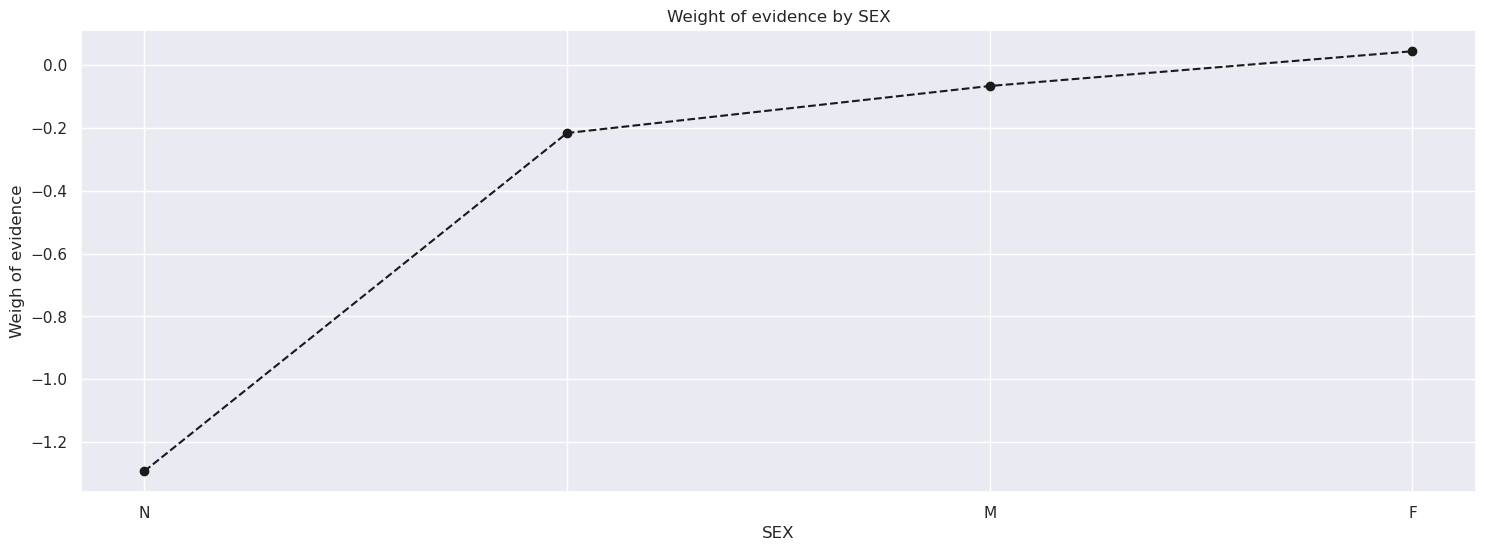

In [165]:
plot_by_WoE(df_temp)

In [166]:
#df_inputs_prepr['SEX_blank_N']= sum([df_inputs_prepr['SEX: '],df_inputs_prepr['SEX:N']])

In [167]:
df_temp = WoE_discrete(df_inputs_prepr, 'RESIDENCIAL_STATE', df_targets_prepr)

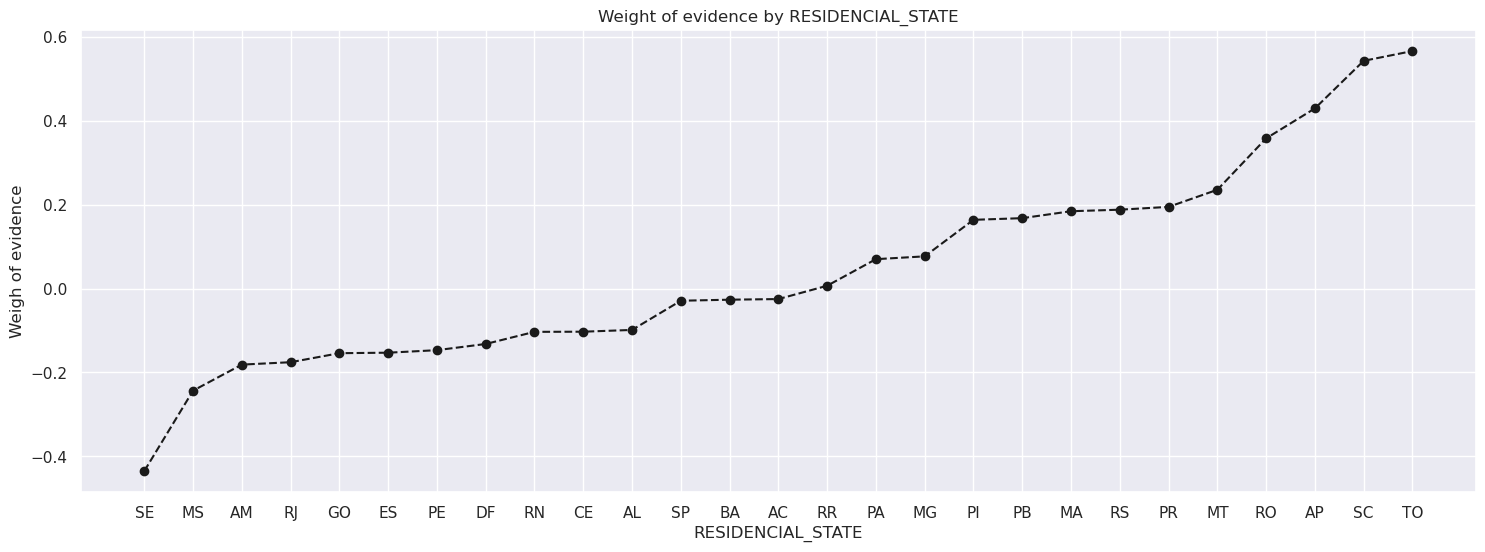

In [168]:
plot_by_WoE(df_temp)

In [169]:
df_inputs_prepr['state_resi:SE'] = sum([df_inputs_prepr['state_resi:SE']])

df_inputs_prepr['state_resi:AC_DF_AM_AL'] = sum([df_inputs_prepr['state_resi:AC'],df_inputs_prepr['state_resi:DF'],
                                              df_inputs_prepr['state_resi:AM'],df_inputs_prepr['state_resi:AL']])

df_inputs_prepr['state_resi:RN_ES_GO_RR'] = sum([df_inputs_prepr['state_resi:RN'],df_inputs_prepr['state_resi:ES'],
                                              df_inputs_prepr['state_resi:GO'],df_inputs_prepr['state_resi:RR']])

df_inputs_prepr['state_resi:BA_PE'] = sum([df_inputs_prepr['state_resi:BA'],df_inputs_prepr['state_resi:PE']])

df_inputs_prepr['state_resi:MS_MT_RJ_MA_CE'] = sum([df_inputs_prepr['state_resi:MS'],df_inputs_prepr['state_resi:MT'],
                                              df_inputs_prepr['state_resi:RJ'],df_inputs_prepr['state_resi:MA'],
                                                   df_inputs_prepr['state_resi:CE']])

df_inputs_prepr['state_resi:SP'] = sum([df_inputs_prepr['state_resi:SP']])

df_inputs_prepr['state_resi:PA_PI_MG'] = sum([df_inputs_prepr['state_resi:PI'],df_inputs_prepr['state_resi:MG'],
                                             df_inputs_prepr['state_resi:PA']])


df_inputs_prepr['state_resi:TO_AP_PR_PB_RS'] = sum([df_inputs_prepr['state_resi:TO'],df_inputs_prepr['state_resi:AP'],
                                              df_inputs_prepr['state_resi:PR'],df_inputs_prepr['state_resi:PB'],
                                                   df_inputs_prepr['state_resi:RS']])


df_inputs_prepr['state_resi:SC_RO'] = sum([df_inputs_prepr['state_resi:SC'],df_inputs_prepr['state_resi:RO']])

In [170]:
df_temp = WoE_discrete(df_inputs_prepr, 'QUANT_DEPENDANTS', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


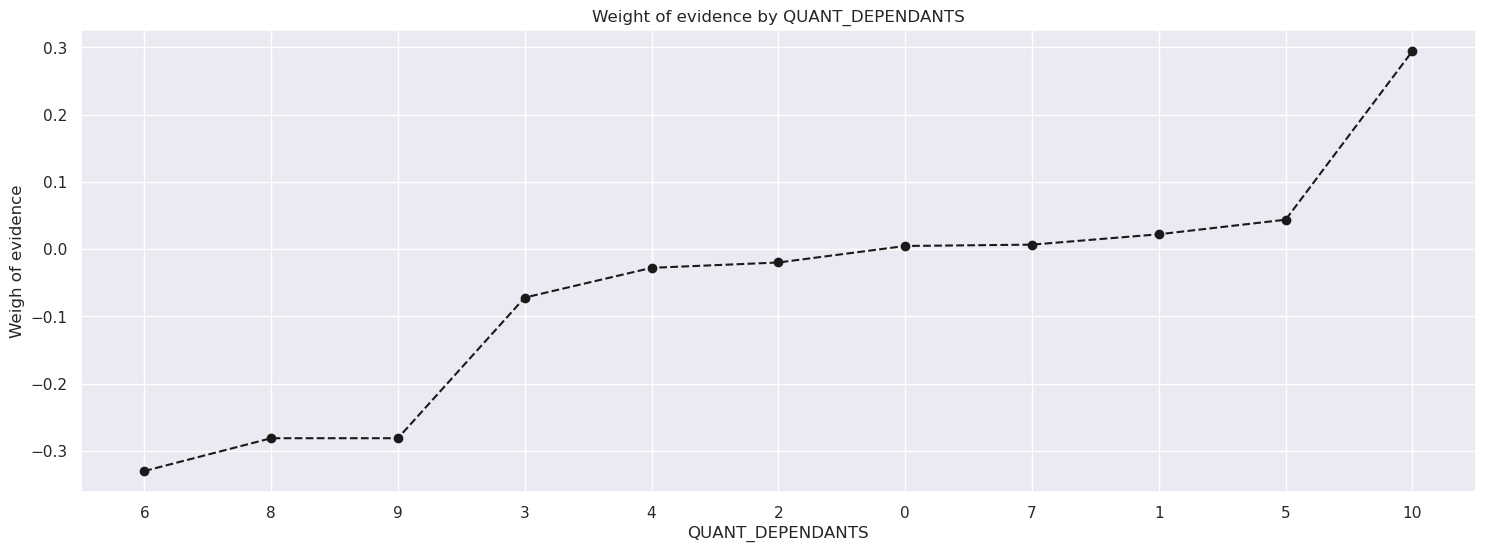

In [171]:
plot_by_WoE(df_temp)

In [172]:
df_inputs_prepr['dependant_10_13'] = sum([df_inputs_prepr['dependant:10'],df_inputs_prepr['dependant:13']])

df_inputs_prepr['dependant_9_14'] = sum([df_inputs_prepr['dependant:9'],df_inputs_prepr['dependant:14']])

df_inputs_prepr['dependant_6_8_4_5_11'] = sum([df_inputs_prepr['dependant:6'],df_inputs_prepr['dependant:8']
                                           ,df_inputs_prepr['dependant:4'],df_inputs_prepr['dependant:5'],
                                              df_inputs_prepr['dependant:11']])


df_inputs_prepr['dependant_3_2'] = sum([df_inputs_prepr['dependant:3'],df_inputs_prepr['dependant:2']])

df_inputs_prepr['dependant_0'] = sum([df_inputs_prepr['dependant:0']])

df_inputs_prepr['dependant_1'] = sum([df_inputs_prepr['dependant:1']])

df_inputs_prepr['dependant_12_15_7'] = sum([df_inputs_prepr['dependant:12'],df_inputs_prepr['dependant:15']
                                           ,df_inputs_prepr['dependant:7']])

In [173]:
df_temp = WoE_discrete(df_inputs_prepr, 'RESIDENCE_TYPE', df_targets_prepr)

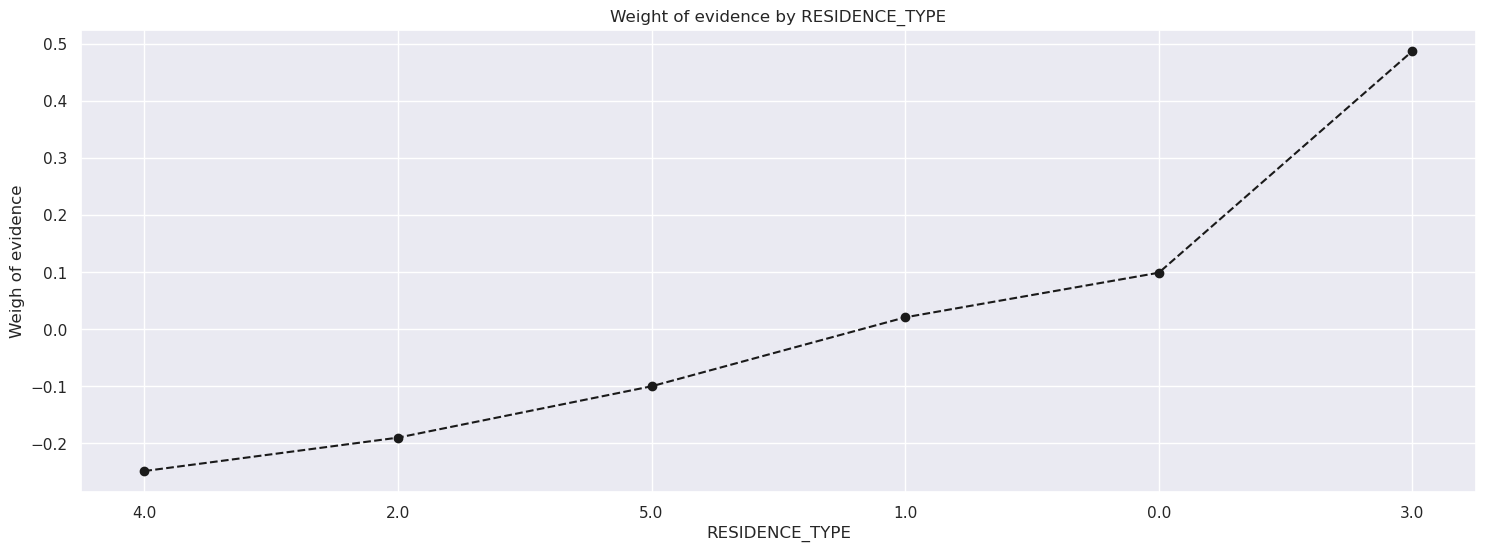

In [174]:
plot_by_WoE(df_temp)

In [175]:
df_inputs_prepr['resi_type_2'] = sum([df_inputs_prepr['resi_type:2.0']])
df_inputs_prepr['resi_type_0_5_4'] = sum([df_inputs_prepr['resi_type:0.0'],df_inputs_prepr['resi_type:5.0']
                                           ,df_inputs_prepr['resi_type:4.0']])
df_inputs_prepr['resi_type_1'] = sum([df_inputs_prepr['resi_type:1.0']])
df_inputs_prepr['resi_type_3'] = sum([df_inputs_prepr['resi_type:3.0']])

In [176]:
df_temp = WoE_discrete(df_inputs_prepr, 'PROFESSION_CODE', df_targets_prepr)

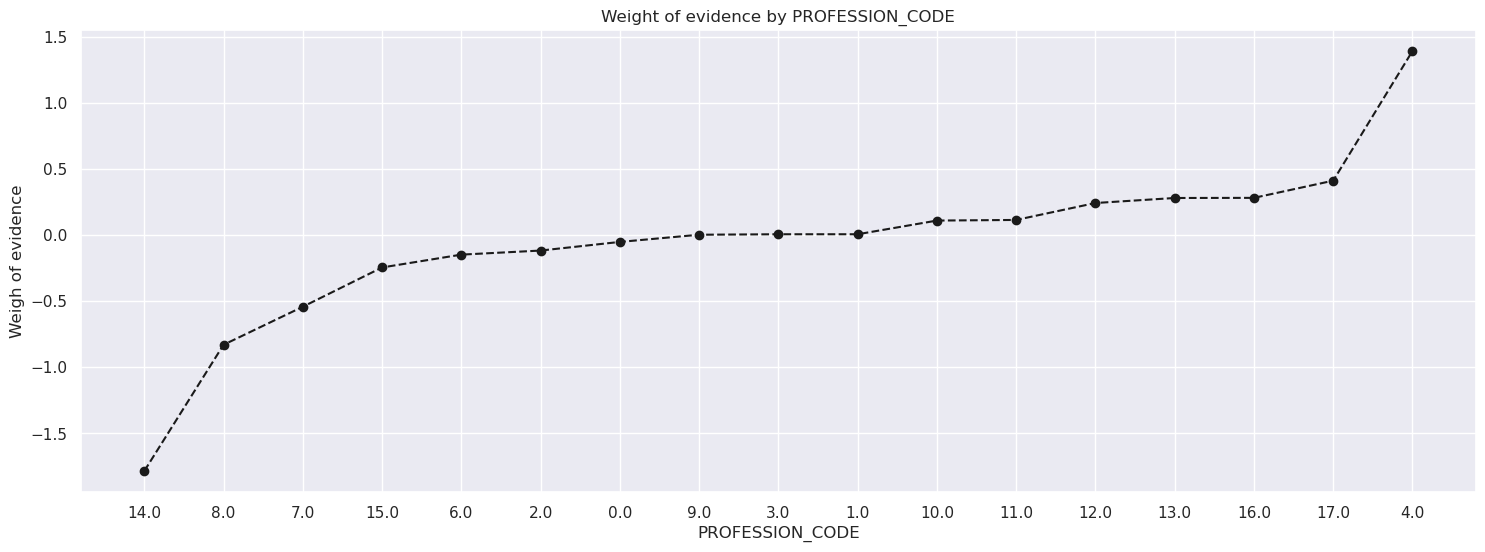

In [177]:
plot_by_WoE(df_temp)

In [178]:
df_inputs_prepr['prof_code_14'] = sum([df_inputs_prepr['prof_code:14.0']])
df_inputs_prepr['prof_code_7_8'] = sum([df_inputs_prepr['prof_code:7.0'],df_inputs_prepr['prof_code:8.0']])

df_inputs_prepr['prof_code_4_15_3'] = sum([df_inputs_prepr['prof_code:4.0'],df_inputs_prepr['prof_code:15.0']
                                          ,df_inputs_prepr['prof_code:3.0']])

df_inputs_prepr['prof_code_2_10'] = sum([df_inputs_prepr['prof_code:2.0'],df_inputs_prepr['prof_code:10.0']])

df_inputs_prepr['prof_code_9'] = sum([df_inputs_prepr['prof_code:9.0']])

df_inputs_prepr['prof_code_0_1'] = sum([df_inputs_prepr['prof_code:0.0'],df_inputs_prepr['prof_code:1.0']])

df_inputs_prepr['prof_code_12_11'] = sum([df_inputs_prepr['prof_code:12.0'],df_inputs_prepr['prof_code:11.0']])

df_inputs_prepr['prof_code_13_16_6_17_5_18'] = sum([df_inputs_prepr['prof_code:13.0'],df_inputs_prepr['prof_code:16.0']
                                          ,df_inputs_prepr['prof_code:6.0'],df_inputs_prepr['prof_code:17.0']
                                          ,df_inputs_prepr['prof_code:5.0'],df_inputs_prepr['prof_code:18.0']])



In [179]:
def WoE_ordered_continuos (df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
    df['n_good'] = df['prop_good'] * df['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
   # df = df.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
   # df = df.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
    df['diff_prop_good'] = df['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['diff_WoE'] = df['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
# We sum all values of a given column.
    return df


In [180]:
df_inputs_prepr['MONTHS_IN_RESIDENCE_Factor']= pd.cut(df_inputs_prepr['MONTHS_IN_RESIDENCE'],50)

In [181]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'MONTHS_IN_RESIDENCE_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


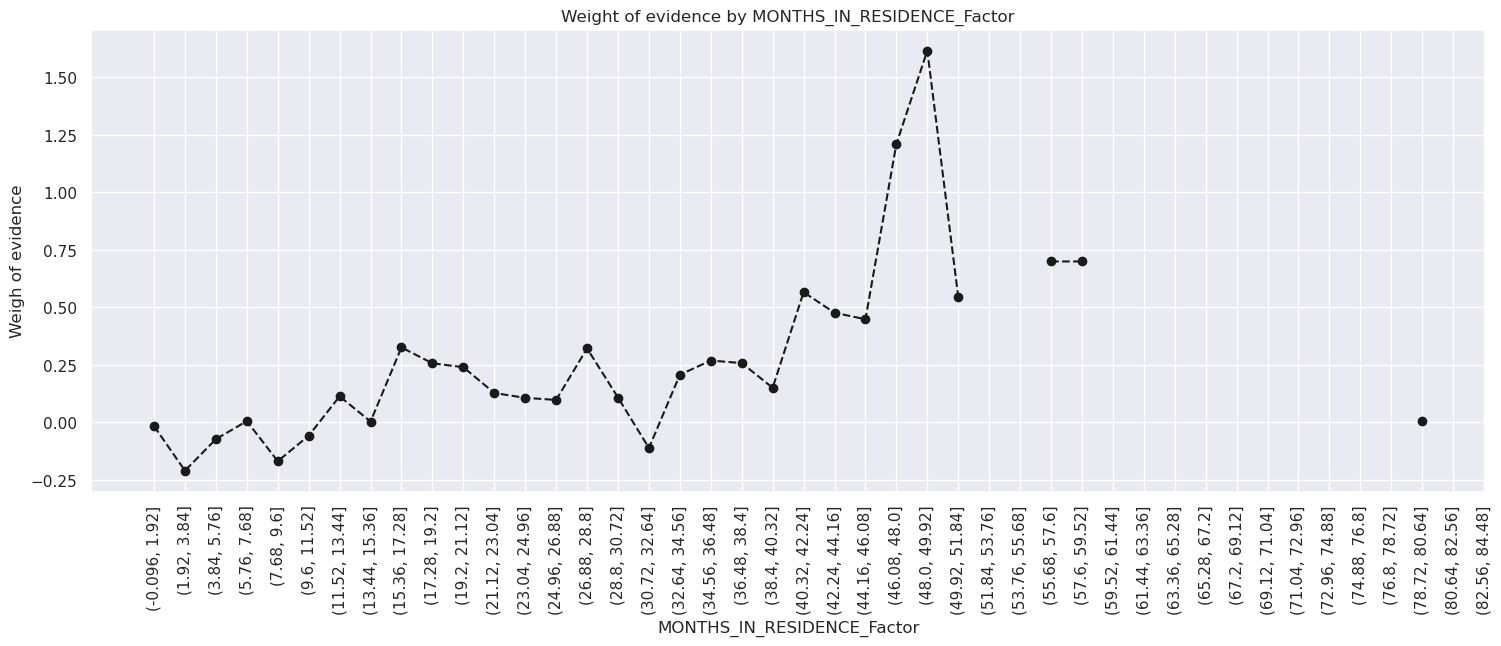

In [182]:
plot_by_WoE(df_temp,90)

In [183]:
df_inputs_prepr['MONTHS_IN_RESIDENCE: <5'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(3)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 5-12'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(3,13)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 13-24'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(13,26)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 25-40'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(26,41)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 41-44'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(41,45)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 45-48'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(45,49)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 49-60'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(49,61)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: >60'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(61, int(df_inputs_prepr['MONTHS_IN_RESIDENCE'].max()))),1,0)

In [184]:
df_inputs_prepr['PERSONAL_MONTHLY_INCOME_Factor']= pd.cut(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'],650)

In [185]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'PERSONAL_MONTHLY_INCOME_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


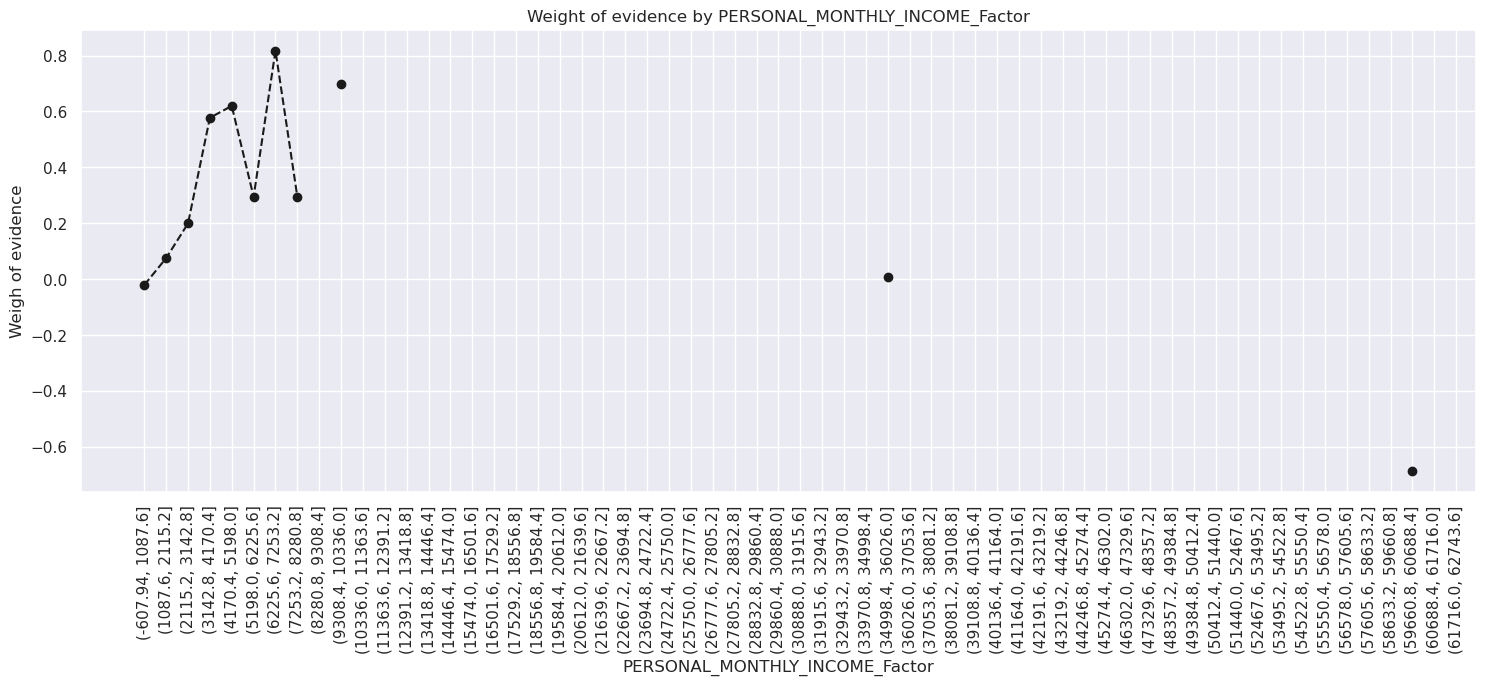

In [186]:
plot_by_WoE(df_temp,90)

In [187]:
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: <256.479'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(256)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 256-845.915'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(256,845)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 845-1238.872'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(845,1238)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 1238-2221.265'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(1238,2221)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 2221-2515.983'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(2221,2515)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 2515-3011.18'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(2515,3007)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 3007-4485'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(3007,4485)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 4485-8911'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(4485,8911)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 8911-10900'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(8911,10900)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: >10900'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(10900, int(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].max()))),1,0)

In [188]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['PERSONAL_MONTHLY_INCOME']< 3010, :]

In [189]:
df_inputs_prepr_temp['month_income_factor']= pd.cut(df_inputs_prepr_temp['PERSONAL_MONTHLY_INCOME'],30)
df_temp = WoE_ordered_continuos(df_inputs_prepr_temp, 'month_income_factor', df_targets_prepr[df_inputs_prepr_temp.index])

/tmp/ipykernel_158/1931532635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['month_income_factor']= pd.cut(df_inputs_prepr_temp['PERSONAL_MONTHLY_INCOME'],30)


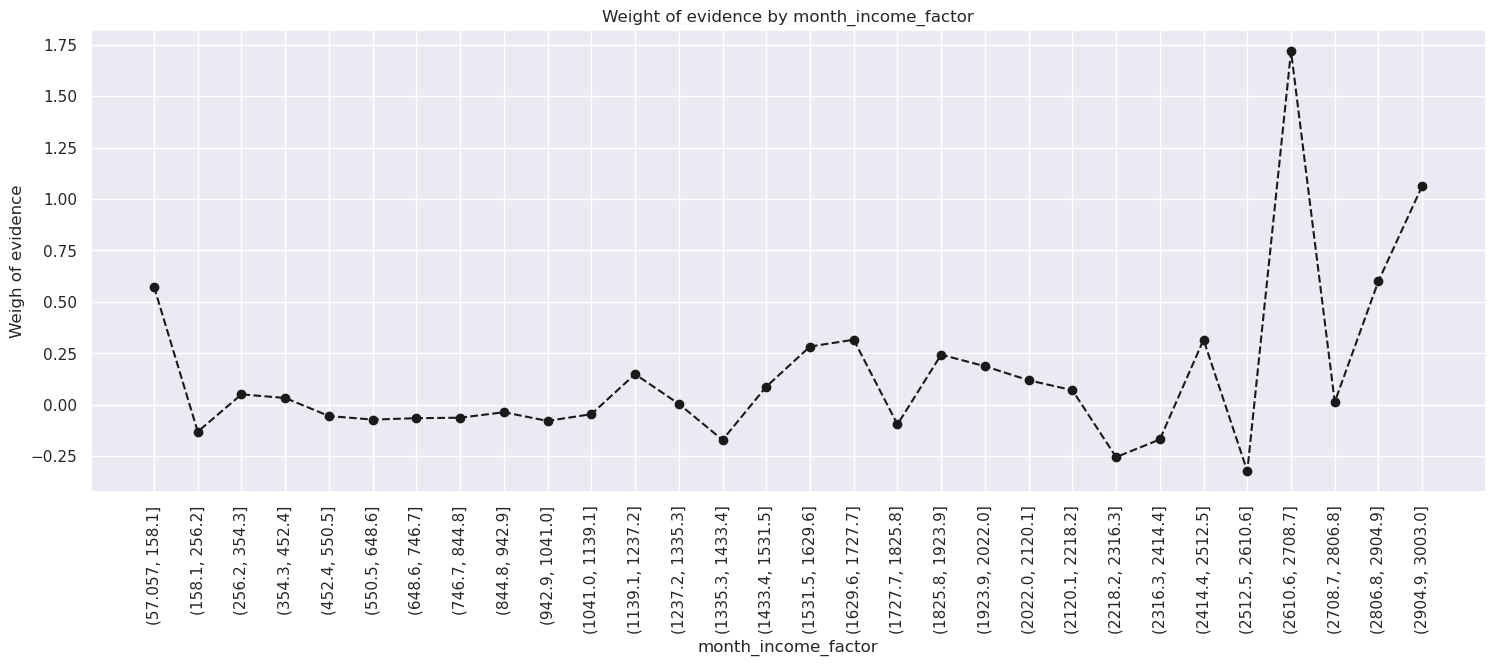

In [190]:
plot_by_WoE(df_temp,90)

In [191]:
df_inputs_prepr['AGE_Factor']= pd.cut(df_inputs_prepr['AGE'],30)

In [192]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'AGE_Factor', df_targets_prepr)

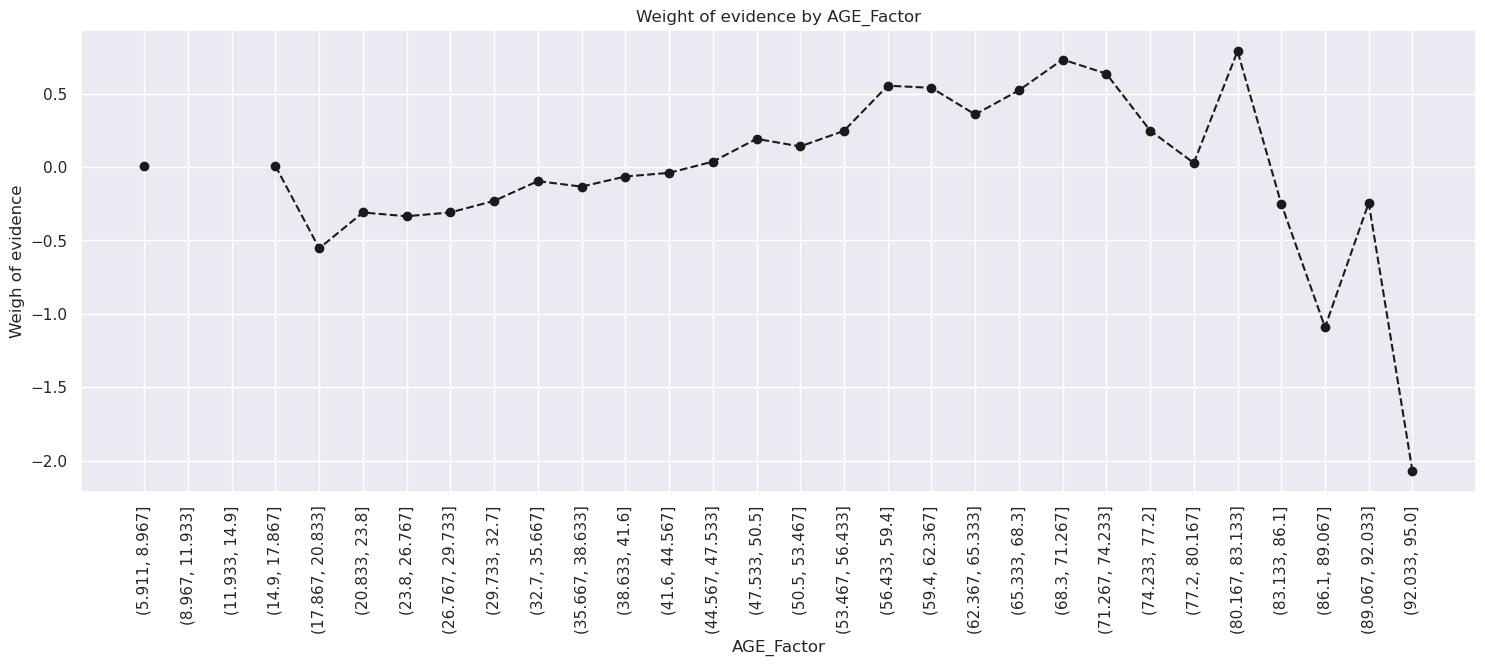

In [193]:
plot_by_WoE(df_temp,90)

In [194]:
df_inputs_prepr['AGE: <16.9'] = np.where(df_inputs_prepr['AGE'].isin(range(17)),1,0)
df_inputs_prepr['AGE: 16.9-30'] = np.where(df_inputs_prepr['AGE'].isin(range(17,23)),1,0)
df_inputs_prepr['AGE: 31-43.3'] = np.where(df_inputs_prepr['AGE'].isin(range(23,43)),1,0)
df_inputs_prepr['AGE: 43-56.5'] = np.where(df_inputs_prepr['AGE'].isin(range(43,57)),1,0)
df_inputs_prepr['AGE: 56-66.4'] = np.where(df_inputs_prepr['AGE'].isin(range(57,66)),1,0)
df_inputs_prepr['AGE: 66-82.9'] = np.where(df_inputs_prepr['AGE'].isin(range(66,83)),1,0)
df_inputs_prepr['AGE: >83'] = np.where(df_inputs_prepr['AGE'].isin(range(83, int(df_inputs_prepr['AGE'].max()))),1,0)

In [195]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'MONTHS_IN_THE_JOB', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


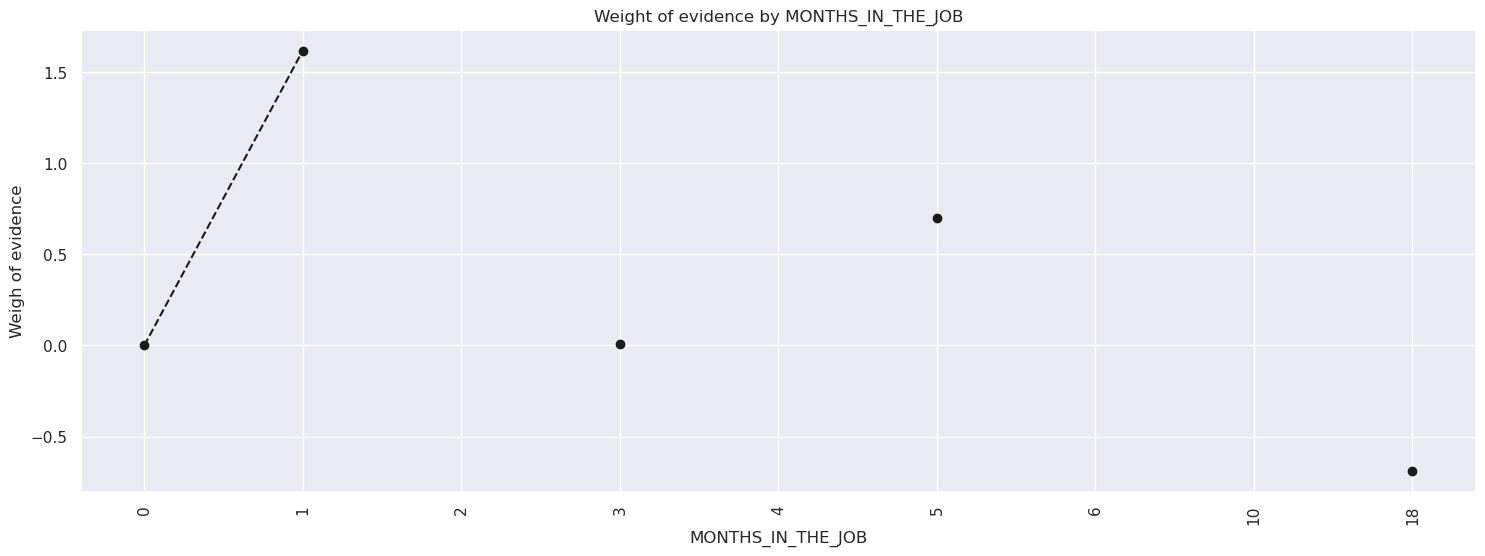

In [196]:
plot_by_WoE(df_temp,90)

In [197]:
df_inputs_prepr['MONTHS_IN_THE_JOB: <0'] = np.where(df_inputs_prepr['MONTHS_IN_THE_JOB'].isin(range(0)),1,0)
df_inputs_prepr['MONTHS_IN_THE_JOB: >1'] = np.where(df_inputs_prepr['MONTHS_IN_THE_JOB'].isin(range(1, int(df_inputs_prepr['MONTHS_IN_THE_JOB'].max()))),1,0)

In [198]:
df_temp = WoE_discrete(df_inputs_prepr, 'PAYMENT_DAY', df_targets_prepr)

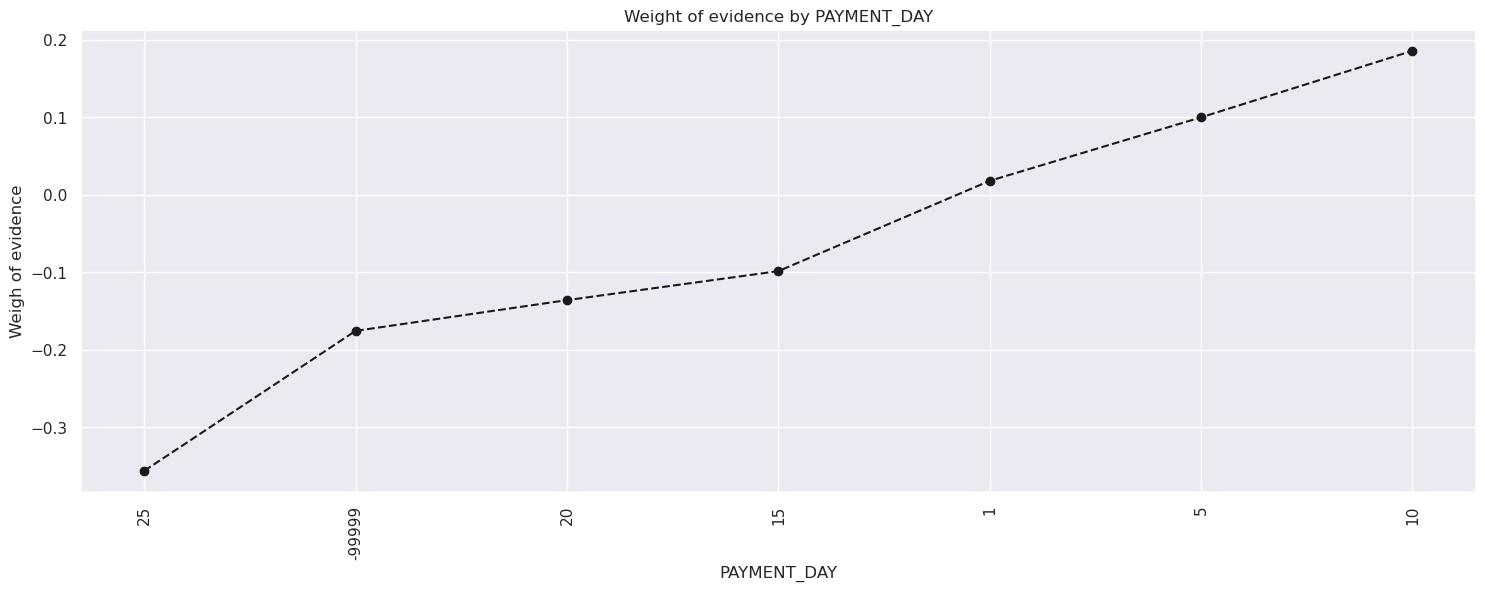

In [199]:
plot_by_WoE(df_temp,90)

# Testing data machine learning implementation (imbalance handling)

In [200]:
inputs_test_with_ref_cat = cr_data_inputs_test.loc[: , ["marital:0",
"marital:2",
"marital:3",
"marital:4",
"marital:5",
"marital:6",
"marital:7",
"resi_type:0.0",
"resi_type:1.0",
"resi_type:2.0",
"resi_type:3.0",
"resi_type:4.0",
"resi_type:5.0",
"phone:N",
"visa:0",
"visa:1",
"diners:0",
"diners:1",
"american:0",
"american:1",
"occ_type:0.0",
"occ_type:1.0",
"occ_type:2.0",
"occ_type:3.0",
"occ_type:4.0",
"occ_type:5.0",
"educational:0.0",
"educational:1.0",
"educational:2.0",
"educational:3.0",
"educational:4.0",
"educational:5.0",
"MONTHS_IN_RESIDENCE: <5",
"MONTHS_IN_RESIDENCE: 5-12",
"MONTHS_IN_RESIDENCE: 13-24",
"MONTHS_IN_RESIDENCE: 25-40",
"MONTHS_IN_RESIDENCE: 41-44",
"MONTHS_IN_RESIDENCE: 45-48",
"MONTHS_IN_RESIDENCE: 49-60",
"PERSONAL_MONTHLY_INCOME: <256.479",
"PERSONAL_MONTHLY_INCOME: 256-845.915",
"PERSONAL_MONTHLY_INCOME: 845-1238.872",
"PERSONAL_MONTHLY_INCOME: 1238-2221.265",
"PERSONAL_MONTHLY_INCOME: 2221-2515.983",
"PERSONAL_MONTHLY_INCOME: 2515-3011.18",
"PERSONAL_MONTHLY_INCOME: 3007-4485",
"PERSONAL_MONTHLY_INCOME: 4485-8911",
"PERSONAL_MONTHLY_INCOME: 8911-10900",
"PERSONAL_MONTHLY_INCOME: >10900",
"MONTHS_IN_THE_JOB: >1"]]

In [201]:
ref_categories = ["phone:N",
"visa:0",
"visa:1",
"diners:0",
"diners:1",
"american:0",
"american:1",
"MONTHS_IN_THE_JOB: >1"]


In [202]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis=1)

In [203]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 0])

In [204]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [205]:
y_hat_test_proba[:][:,1]

array([0.58770739, 0.50946216, 0.53856583, ..., 0.59533652, 0.51116752,
       0.42610027])

In [206]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [207]:
cr_data_targets_test_temp = cr_data_targets_test

In [208]:
cr_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [209]:
df_actual_predicted_probs= pd.concat([cr_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis =1)

In [210]:
df_actual_predicted_probs.columns = ['cr_data_targets_test', 'y_hat_test_proba']

In [211]:
df_actual_predicted_probs.index = cr_data_targets_test.index

In [212]:
tr = 0.7

In [213]:
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba']> tr, 1, 0)

In [214]:
pd.crosstab(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['actual'], colnames = ['predicted'])

predicted     0   1
actual             
0          7409   8
1          7317  50

In [215]:
pd.crosstab(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['actual'], colnames = ['predicted']) / df_actual_predicted_probs.shape[0]

predicted         0         1
actual                       
0          0.501150  0.000541
1          0.494927  0.003382

In [216]:
(pd.crosstab(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5045319264069265

In [217]:
roc_curve(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99973035, 0.99973035,
        1.        ]),
 array([0.00000000e+00, 1.35740464e-04, 5.42961857e-04, ...,
        9.99728519e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.90386253, 0.90386253, 0.85409193, ..., 0.34814022, 0.3303819 ,
        0.32289625]))

In [218]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

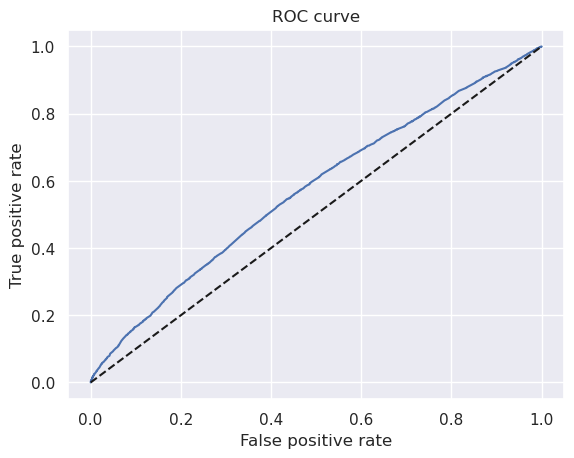

In [220]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [221]:
AUROC = roc_auc_score(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.5716618602365888

In [222]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [223]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [224]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['cr_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['cr_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [225]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['cr_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['cr_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

Text(0.5, 1.0, 'Gini')

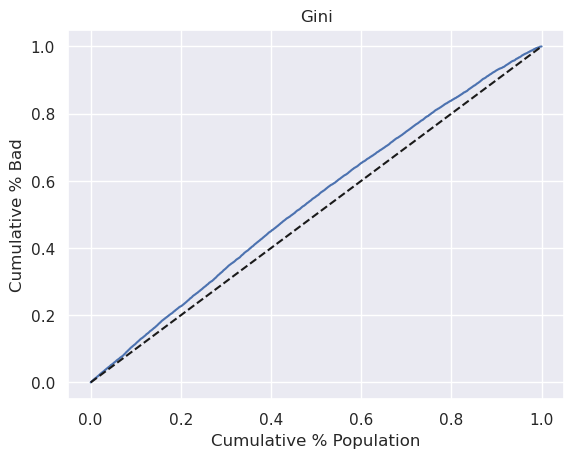

In [226]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [227]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.14332372047317765

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

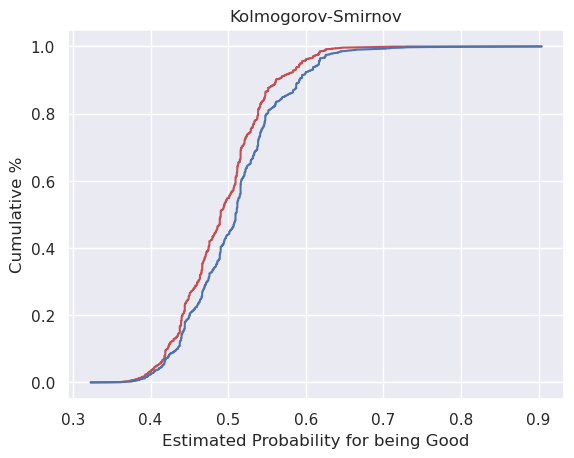

In [228]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [229]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.1108806148433597

In [230]:
!pip install imbalanced-learn

# Logistic (Imbalance Handling) 

In [231]:
from sklearn.linear_model import LogisticRegression

In [232]:
from sklearn import metrics

In [233]:
Logreg_balance=LogisticRegression()

In [234]:
Logreg_balance.fit(inputs_train,cr_data_targets_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [235]:
y_pred_balance=Logreg_balance.predict(inputs_test)

In [236]:
cnf_balance=metrics.confusion_matrix(cr_data_targets_test,y_pred_balance)

In [237]:
cnf_balance

array([[4071, 3346],
       [3242, 4125]])

In [238]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,accuracy_score
y_pred=Logreg_balance.predict(inputs_test)
acc_LR_base=accuracy_score(cr_data_targets_test,y_pred)
print(f"testing accuracy {acc_LR_base}")

testing accuracy 0.5543831168831169


In [239]:
y_pred_train_LR=Logreg_balance.predict(inputs_train)
acc_LR_base_train=accuracy_score(cr_data_targets_train,y_pred_train_LR)
print(f"training accuracy {acc_LR_base_train}")

training accuracy 0.5464199952649914


In [240]:
print(classification_report(cr_data_targets_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.55      0.55      7417
           1       0.55      0.56      0.56      7367

    accuracy                           0.55     14784
   macro avg       0.55      0.55      0.55     14784
weighted avg       0.55      0.55      0.55     14784



In [241]:
print("ROC-AUC Score:", roc_auc_score(cr_data_targets_test,y_pred))

ROC-AUC Score: 0.5544018114296838


In [242]:
Gini=(2*0.5563764536029412)-1
Gini

0.11275290720588238

## the stats model (Imbalance Handling)

In [243]:
import statsmodels.api as sm
log_reg = sm.Logit(cr_data_targets_train, inputs_train).fit() 

         Current function value: 0.685984
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [244]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:     TARGET_LABEL_BAD.1   No. Observations:                59134
Model:                          Logit   Df Residuals:                    59092
Method:                           MLE   Df Model:                           41
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                 0.01033
Time:                        12:51:51   Log-Likelihood:                -40565.
converged:                      False   LL-Null:                       -40989.
Covariance Type:            nonrobust   LLR p-value:                3.569e-151
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
marital:0                                  0.1791      0.127      1.409      0.159      -0.070       0.428
marital:2                                  0.28

In [245]:
!pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


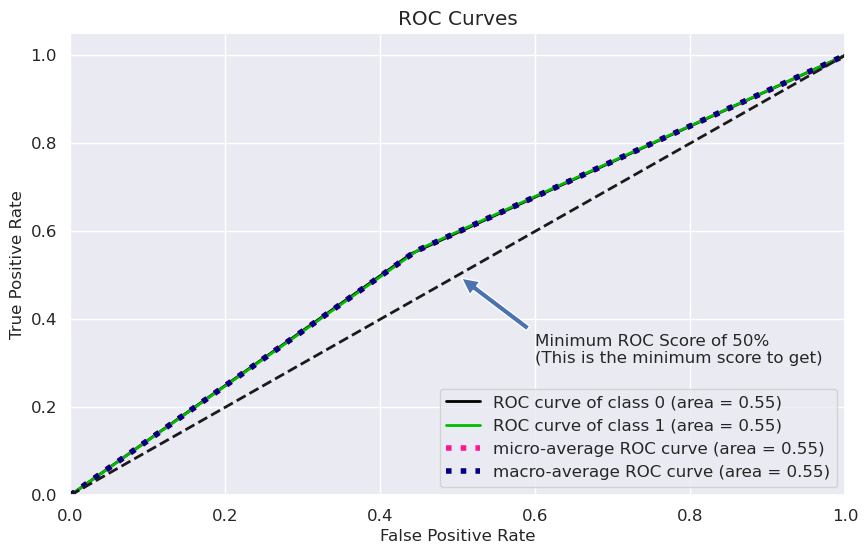

In [246]:
# ROC
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 6]
y_pred = np.column_stack((1 - y_pred, y_pred))
skplt.metrics.plot_roc(cr_data_targets_test, y_pred)
plt.annotate('Minimum ROC Score of 50%\n(This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3), arrowprops=dict(shrink=0.05))
plt.show()


# WOE Based Dataset Version

# Weight of Evidence (Imbalanced) for Training Data

In [247]:
file_path = 'CS_data.txt'
CS_data = pd.read_csv(file_path, sep='\t', encoding='utf-8')

/tmp/ipykernel_158/214279794.py:2: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  CS_data = pd.read_csv(file_path, sep='\t', encoding='utf-8')


In [248]:
CS_data_FV= CS_data.copy()

In [249]:
pd.options.display.max_columns = None

In [250]:
loan_data_dummies= [pd.get_dummies(CS_data_FV['SEX'],prefix='SEX',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['APPLICATION_SUBMISSION_TYPE'],prefix='app_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['POSTAL_ADDRESS_TYPE'],prefix='postal_code',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['MARITAL_STATUS'],prefix='marital',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_DEPENDANTS'],prefix='dependant',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['STATE_OF_BIRTH'],prefix='state_birth',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['NATIONALITY'],prefix='nationality',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['RESIDENCIAL_STATE'],prefix='state_resi',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['RESIDENCE_TYPE'],prefix='resi_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_MOBILE_PHONE'],prefix='phone',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_VISA'],prefix='visa',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_MASTERCARD'],prefix='master',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_DINERS'],prefix='diners',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_AMERICAN_EXPRESS'],prefix='american',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_OTHER_CARDS'],prefix='other_card',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_BANKING_ACCOUNTS'],prefix='b_account',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_CARS'],prefix='car',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['COMPANY'],prefix='company',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PROFESSION_CODE'],prefix='prof_code',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['OCCUPATION_TYPE'],prefix='occ_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PRODUCT'],prefix='product',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_ACSP_RECORD'],prefix='delinquency',prefix_sep=':'),
                     #pd.get_dummies(CS_data_FV['RESIDENCIAL_ZIP_3'],prefix='zip_3',prefix_sep=':'),
                     #pd.get_dummies(CS_data_FV['PROFESSIONAL_ZIP_3'],prefix='pro_zip_3',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['EDUCATION_LEVEL.1'],prefix='educational',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PAYMENT_DAY'],prefix='payment_day',prefix_sep=':')
                    

                    ]

In [251]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [252]:
CS_data_FV = pd.concat([CS_data_FV, loan_data_dummies], axis = 1)

In [253]:
data_types = pd.DataFrame(
    CS_data_FV.dtypes,
    columns=['Data Type'])

In [254]:
missing_data = pd.DataFrame(
    CS_data_FV.isnull().sum(),
    columns=['missing values'])

In [255]:
unique_values = pd.DataFrame(
    columns=['unique Type'])
for row in list (CS_data_FV.columns.values):
    unique_values.loc[row] = [CS_data_FV[row].nunique()]

In [256]:
dfq = pd.DataFrame(CS_data_FV.describe().transpose())

In [257]:
dq_report = data_types.join(missing_data).join(unique_values).join(dfq)

In [258]:
#df_sex_group= CS_data_FV.groupby(by=['TARGET_LABEL_BAD.1','SEX']).size()
CS_data_FV['QUANT_DEPENDANTS'] = CS_data_FV['QUANT_DEPENDANTS'].replace(53, 0)

In [259]:
CS_data_FV['TARGET_LABEL_BAD.1'] = CS_data_FV['TARGET_LABEL_BAD.1'].map({0: 1, 1: 0})
#changing the parameters into, 1 is non-defaulters and 0 is defaulters

In [260]:
df1 = pd.concat([CS_data_FV['MONTHS_IN_THE_JOB'], CS_data_FV['TARGET_LABEL_BAD.1']], axis=1)
df_target = pd.DataFrame(CS_data_FV['TARGET_LABEL_BAD.1'])

In [261]:
cr_data_inputs_train, cr_data_inputs_test, cr_data_targets_train, cr_data_targets_test = train_test_split(CS_data_FV.drop('TARGET_LABEL_BAD.1', axis=1),CS_data_FV['TARGET_LABEL_BAD.1'],test_size = 0.2, random_state=42)

In [262]:
df_inputs_prepr = cr_data_inputs_train
df_targets_prepr = cr_data_targets_train

In [263]:
df1 = pd.concat([df_inputs_prepr['SEX'],df_targets_prepr], axis =1)

In [264]:
df1= pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns[1]].count(),
               df1.groupby(df1.columns.values[0], as_index = False)[df1.columns[1]].mean()],axis =1)

In [265]:
df1 = df1.iloc[: , [0, 1, 3]]

In [266]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']

In [267]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [268]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1- df1['prop_good']) * df1['n_obs']

In [269]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [270]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

In [271]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)

In [272]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [273]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()

In [274]:
def WoE_discrete (df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
    df['n_good'] = df['prop_good'] * df['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
    df = df.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
    df = df.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
    df['diff_prop_good'] = df['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['diff_WoE'] = df['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
# We sum all values of a given column.
    return df

In [275]:
df_temp = WoE_discrete(df_inputs_prepr, 'SEX', df_targets_prepr)

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [277]:
def plot_by_WoE(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker ='o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weigh of evidence')
    plt.title(str('Weight of evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

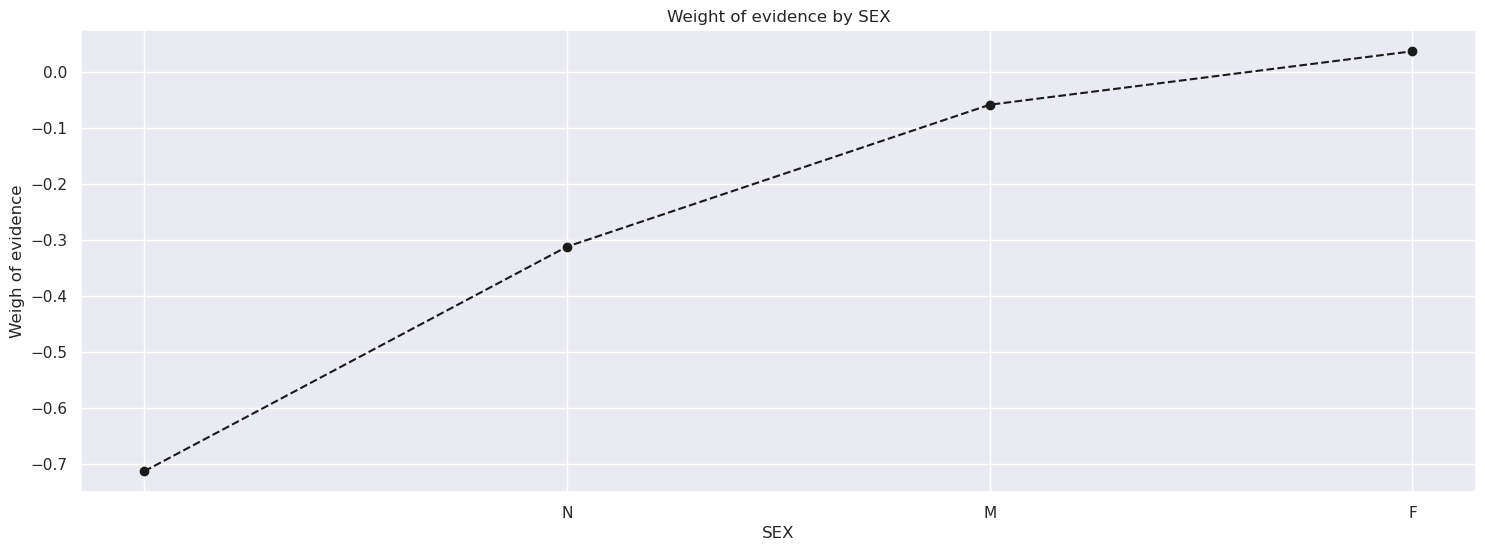

In [278]:
plot_by_WoE(df_temp)

In [279]:
df_inputs_prepr['SEX_blank_N']= sum([df_inputs_prepr['SEX: '],df_inputs_prepr['SEX:N']])

In [280]:
df_temp = WoE_discrete(df_inputs_prepr, 'RESIDENCIAL_STATE', df_targets_prepr)

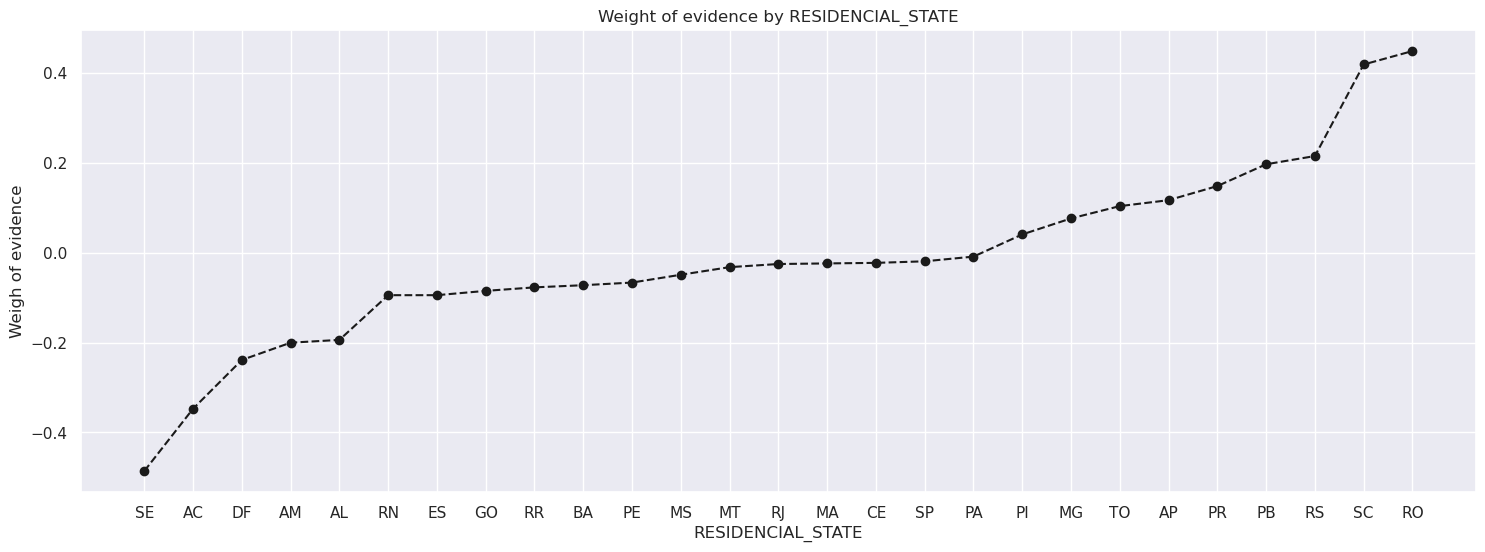

In [281]:
plot_by_WoE(df_temp)

In [282]:
df_inputs_prepr['state_resi:SE'] = sum([df_inputs_prepr['state_resi:SE']])

df_inputs_prepr['state_resi:AC_DF_AM_AL'] = sum([df_inputs_prepr['state_resi:AC'],df_inputs_prepr['state_resi:DF'],
                                              df_inputs_prepr['state_resi:AM'],df_inputs_prepr['state_resi:AL']])

df_inputs_prepr['state_resi:RN_ES_GO_RR'] = sum([df_inputs_prepr['state_resi:RN'],df_inputs_prepr['state_resi:ES'],
                                              df_inputs_prepr['state_resi:GO'],df_inputs_prepr['state_resi:RR']])

df_inputs_prepr['state_resi:BA_PE'] = sum([df_inputs_prepr['state_resi:BA'],df_inputs_prepr['state_resi:PE']])

df_inputs_prepr['state_resi:MS_MT_RJ_MA_CE'] = sum([df_inputs_prepr['state_resi:MS'],df_inputs_prepr['state_resi:MT'],
                                              df_inputs_prepr['state_resi:RJ'],df_inputs_prepr['state_resi:MA'],
                                                   df_inputs_prepr['state_resi:CE']])

df_inputs_prepr['state_resi:SP'] = sum([df_inputs_prepr['state_resi:SP']])

df_inputs_prepr['state_resi:PA_PI_MG'] = sum([df_inputs_prepr['state_resi:PI'],df_inputs_prepr['state_resi:MG'],
                                             df_inputs_prepr['state_resi:PA']])


df_inputs_prepr['state_resi:TO_AP_PR_PB_RS'] = sum([df_inputs_prepr['state_resi:TO'],df_inputs_prepr['state_resi:AP'],
                                              df_inputs_prepr['state_resi:PR'],df_inputs_prepr['state_resi:PB'],
                                                   df_inputs_prepr['state_resi:RS']])


df_inputs_prepr['state_resi:SC_RO'] = sum([df_inputs_prepr['state_resi:SC'],df_inputs_prepr['state_resi:RO']])

In [283]:
df_temp = WoE_discrete(df_inputs_prepr, 'QUANT_DEPENDANTS', df_targets_prepr)

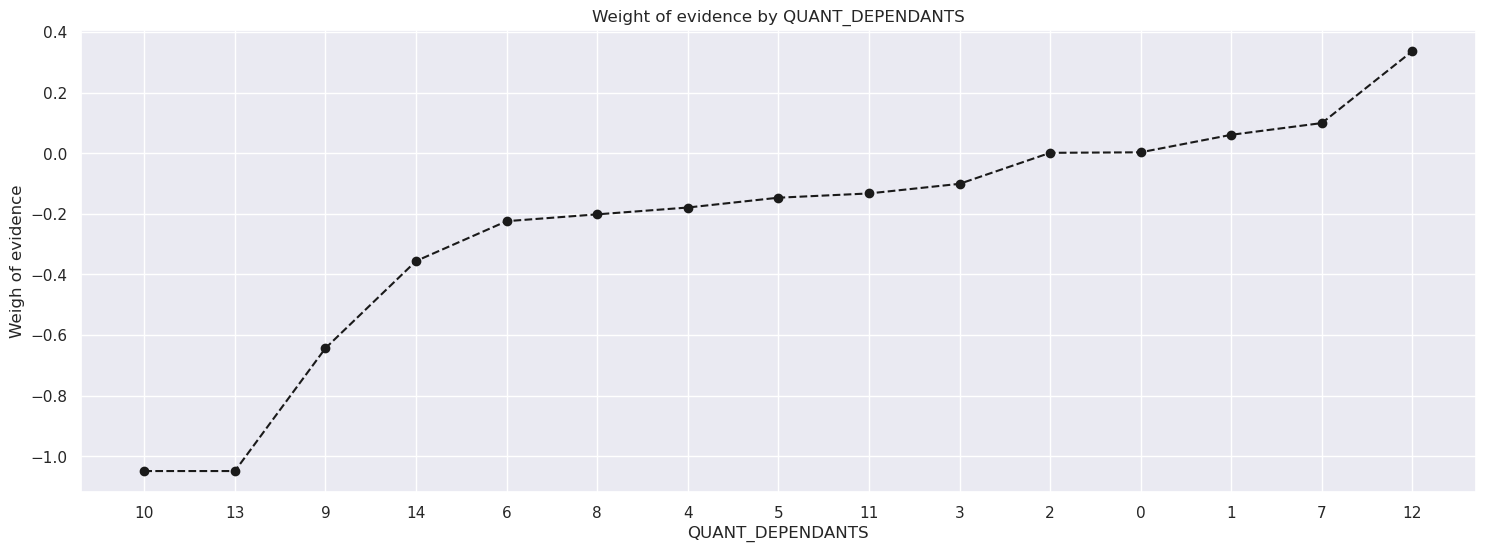

In [284]:
plot_by_WoE(df_temp)

In [285]:
df_inputs_prepr['dependant_10_13'] = sum([df_inputs_prepr['dependant:10'],df_inputs_prepr['dependant:13']])

df_inputs_prepr['dependant_9_14'] = sum([df_inputs_prepr['dependant:9'],df_inputs_prepr['dependant:14']])

df_inputs_prepr['dependant_6_8_4_5_11'] = sum([df_inputs_prepr['dependant:6'],df_inputs_prepr['dependant:8']
                                           ,df_inputs_prepr['dependant:4'],df_inputs_prepr['dependant:5'],
                                              df_inputs_prepr['dependant:11']])


df_inputs_prepr['dependant_3_2'] = sum([df_inputs_prepr['dependant:3'],df_inputs_prepr['dependant:2']])

df_inputs_prepr['dependant_0'] = sum([df_inputs_prepr['dependant:0']])

df_inputs_prepr['dependant_1'] = sum([df_inputs_prepr['dependant:1']])

df_inputs_prepr['dependant_12_15_7'] = sum([df_inputs_prepr['dependant:12'],df_inputs_prepr['dependant:15']
                                           ,df_inputs_prepr['dependant:7']])

In [286]:
df_temp = WoE_discrete(df_inputs_prepr, 'RESIDENCE_TYPE', df_targets_prepr)

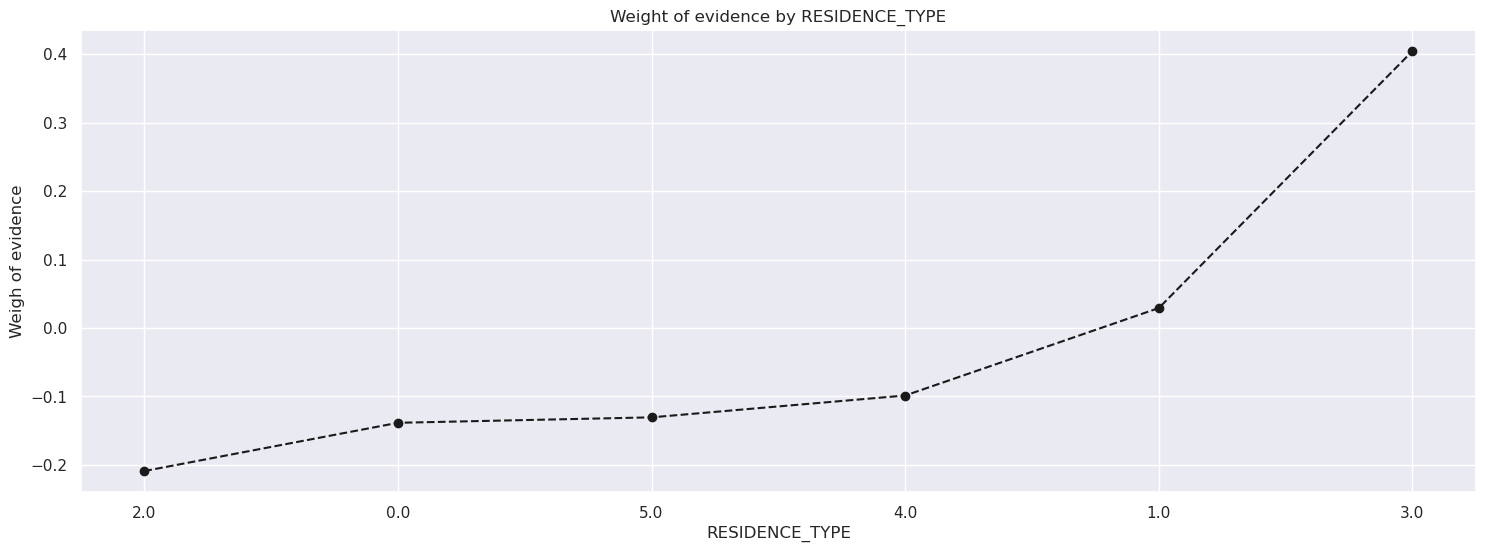

In [287]:
plot_by_WoE(df_temp)

In [288]:
df_inputs_prepr['resi_type_2'] = sum([df_inputs_prepr['resi_type:2.0']])
df_inputs_prepr['resi_type_0_5_4'] = sum([df_inputs_prepr['resi_type:0.0'],df_inputs_prepr['resi_type:5.0']
                                           ,df_inputs_prepr['resi_type:4.0']])
df_inputs_prepr['resi_type_1'] = sum([df_inputs_prepr['resi_type:1.0']])
df_inputs_prepr['resi_type_3'] = sum([df_inputs_prepr['resi_type:3.0']])

In [289]:
df_temp = WoE_discrete(df_inputs_prepr, 'PROFESSION_CODE', df_targets_prepr)

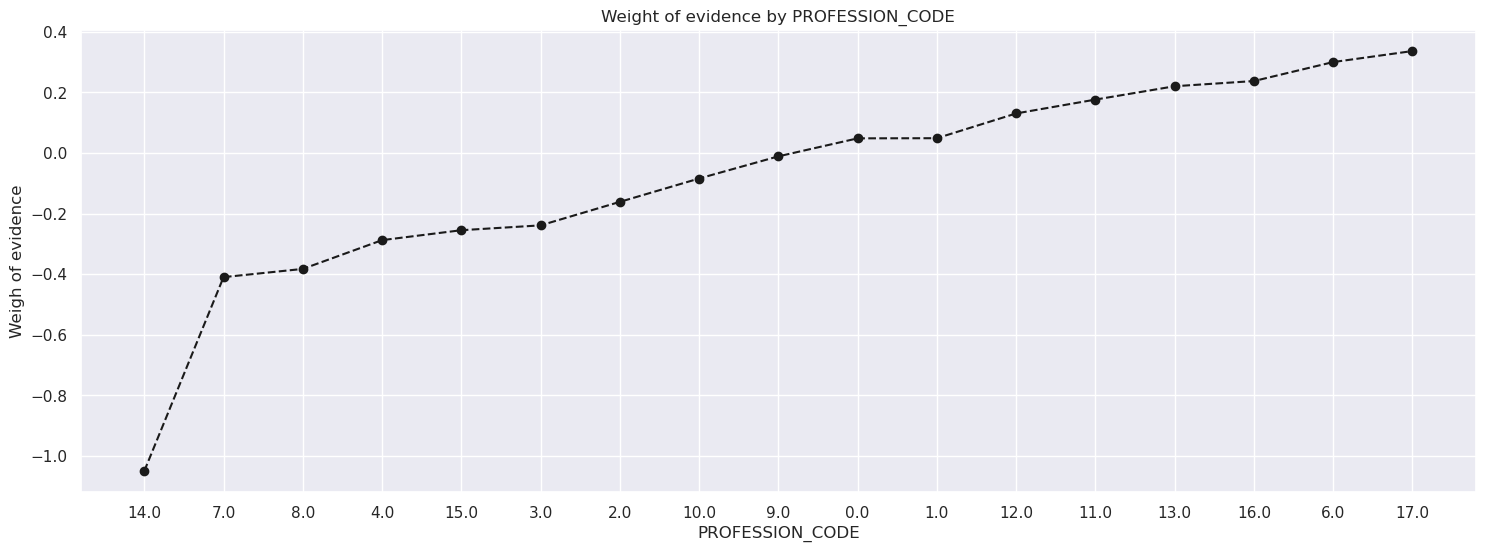

In [290]:
plot_by_WoE(df_temp)

In [291]:
df_inputs_prepr['prof_code_14'] = sum([df_inputs_prepr['prof_code:14.0']])
df_inputs_prepr['prof_code_7_8'] = sum([df_inputs_prepr['prof_code:7.0'],df_inputs_prepr['prof_code:8.0']])

df_inputs_prepr['prof_code_4_15_3'] = sum([df_inputs_prepr['prof_code:4.0'],df_inputs_prepr['prof_code:15.0']
                                          ,df_inputs_prepr['prof_code:3.0']])

df_inputs_prepr['prof_code_2_10'] = sum([df_inputs_prepr['prof_code:2.0'],df_inputs_prepr['prof_code:10.0']])

df_inputs_prepr['prof_code_9'] = sum([df_inputs_prepr['prof_code:9.0']])

df_inputs_prepr['prof_code_0_1'] = sum([df_inputs_prepr['prof_code:0.0'],df_inputs_prepr['prof_code:1.0']])

df_inputs_prepr['prof_code_12_11'] = sum([df_inputs_prepr['prof_code:12.0'],df_inputs_prepr['prof_code:11.0']])

df_inputs_prepr['prof_code_13_16_6_17_5_18'] = sum([df_inputs_prepr['prof_code:13.0'],df_inputs_prepr['prof_code:16.0']
                                          ,df_inputs_prepr['prof_code:6.0'],df_inputs_prepr['prof_code:17.0']
                                          ,df_inputs_prepr['prof_code:5.0'],df_inputs_prepr['prof_code:18.0']])

In [292]:
def WoE_ordered_continuos (df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
    df['n_good'] = df['prop_good'] * df['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
   # df = df.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
   # df = df.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
    df['diff_prop_good'] = df['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['diff_WoE'] = df['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
# We sum all values of a given column.
    return df

In [293]:
df_inputs_prepr['MONTHS_IN_RESIDENCE_Factor']= pd.cut(df_inputs_prepr['MONTHS_IN_RESIDENCE'],50)

In [294]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'MONTHS_IN_RESIDENCE_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


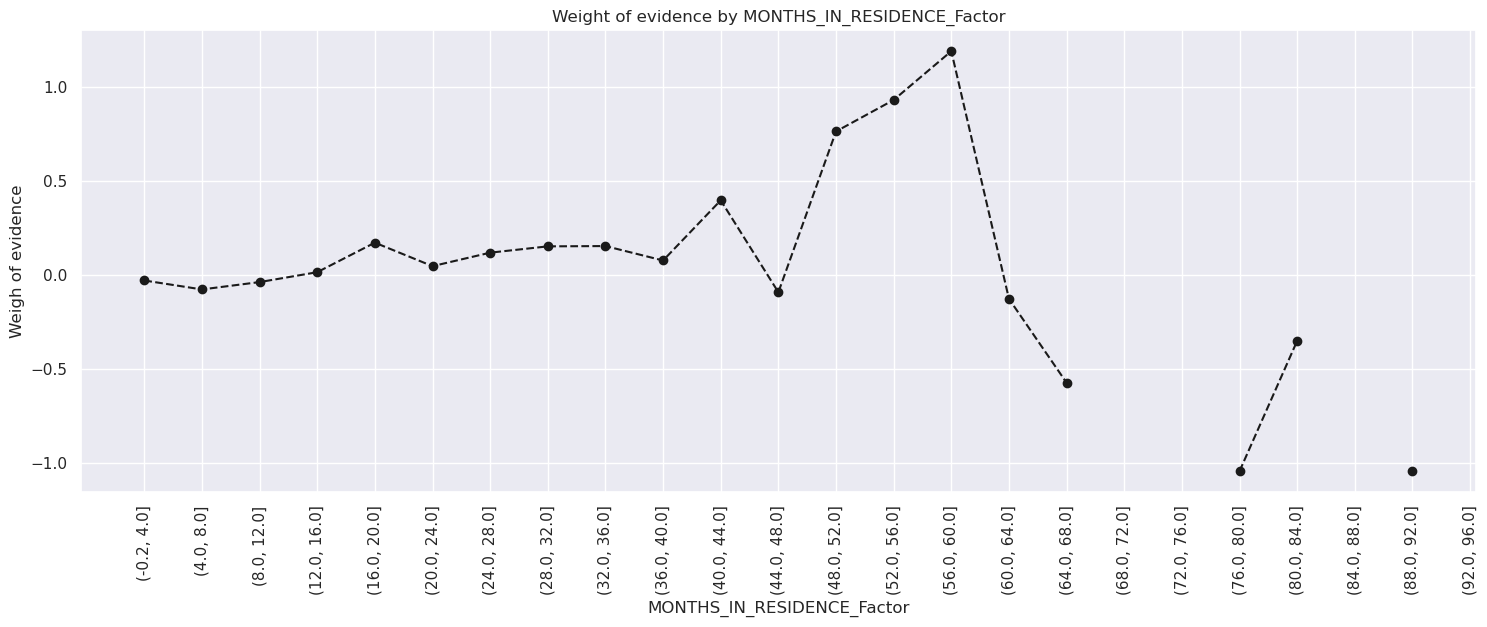

In [295]:
plot_by_WoE(df_temp,90)

In [296]:
df_inputs_prepr['MONTHS_IN_RESIDENCE: <5'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(3)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 5-12'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(3,13)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 13-24'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(13,26)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 25-40'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(26,41)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 41-44'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(41,45)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 45-48'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(45,49)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 49-60'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(49,61)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: >60'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(61, int(df_inputs_prepr['MONTHS_IN_RESIDENCE'].max()))),1,0)

In [297]:
df_inputs_prepr['PERSONAL_MONTHLY_INCOME_Factor']= pd.cut(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'],650)

In [298]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'PERSONAL_MONTHLY_INCOME_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


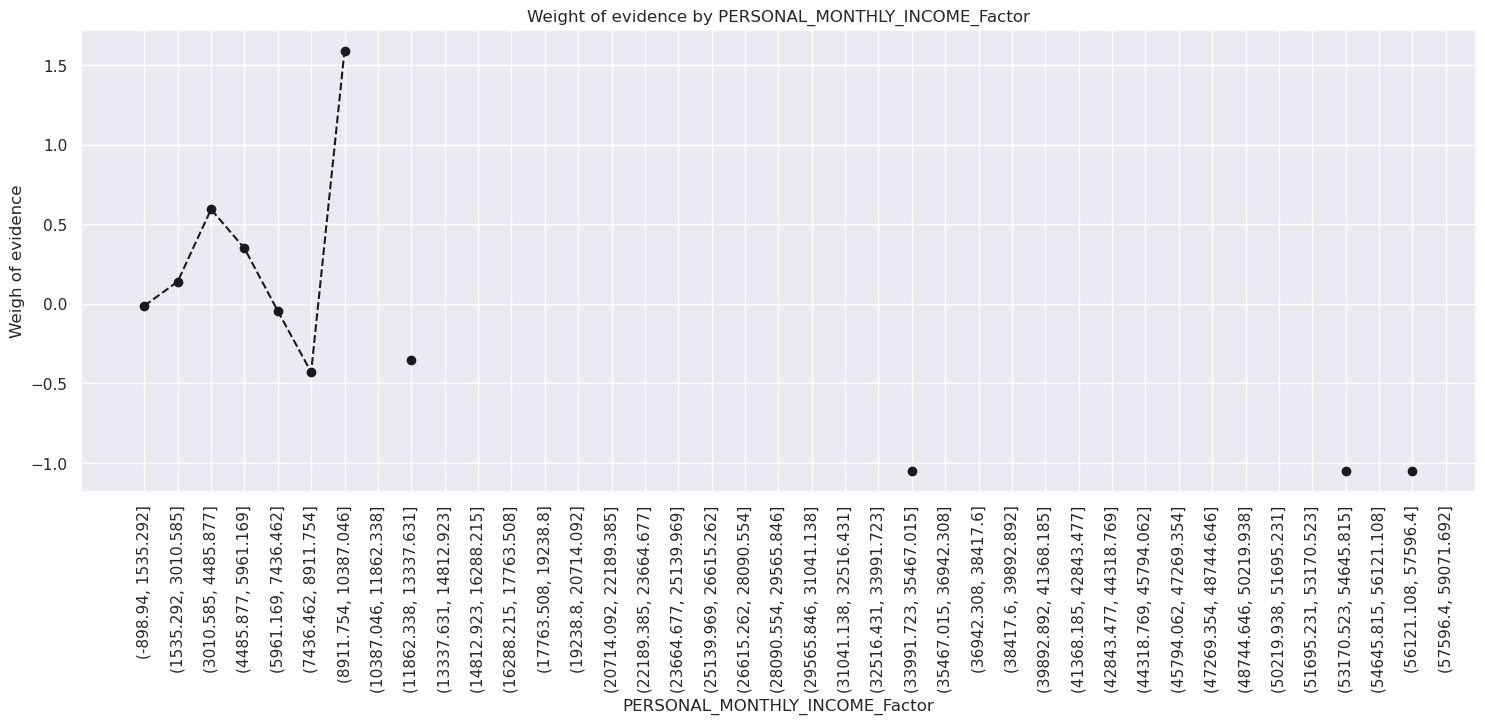

In [299]:
plot_by_WoE(df_temp,90)

In [300]:
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: <256.479'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(256)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 256-845.915'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(256,845)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 845-1238.872'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(845,1238)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 1238-2221.265'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(1238,2221)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 2221-2515.983'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(2221,2515)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 2515-3011.18'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(2515,3007)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 3007-4485'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(3007,4485)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 4485-8911'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(4485,8911)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 8911-10900'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(8911,10900)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: >10900'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(10900, int(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].max()))),1,0)

In [301]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['PERSONAL_MONTHLY_INCOME']< 3010, :]

In [302]:
df_inputs_prepr_temp['month_income_factor']= pd.cut(df_inputs_prepr_temp['PERSONAL_MONTHLY_INCOME'],30)
df_temp = WoE_ordered_continuos(df_inputs_prepr_temp, 'month_income_factor', df_targets_prepr[df_inputs_prepr_temp.index])

/tmp/ipykernel_158/1931532635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['month_income_factor']= pd.cut(df_inputs_prepr_temp['PERSONAL_MONTHLY_INCOME'],30)


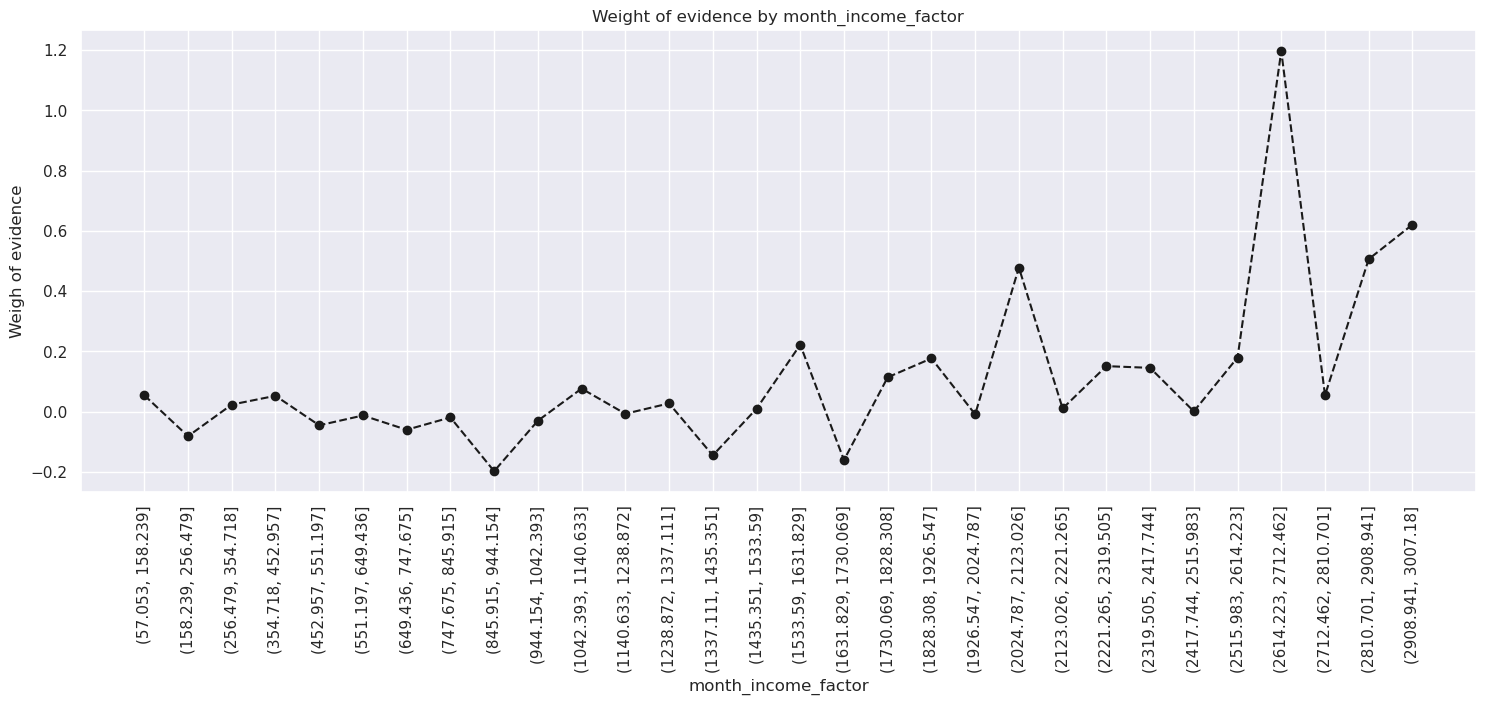

In [303]:
plot_by_WoE(df_temp,90)

In [304]:
df_inputs_prepr['AGE_Factor']= pd.cut(df_inputs_prepr['AGE'],30)

In [305]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'AGE_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


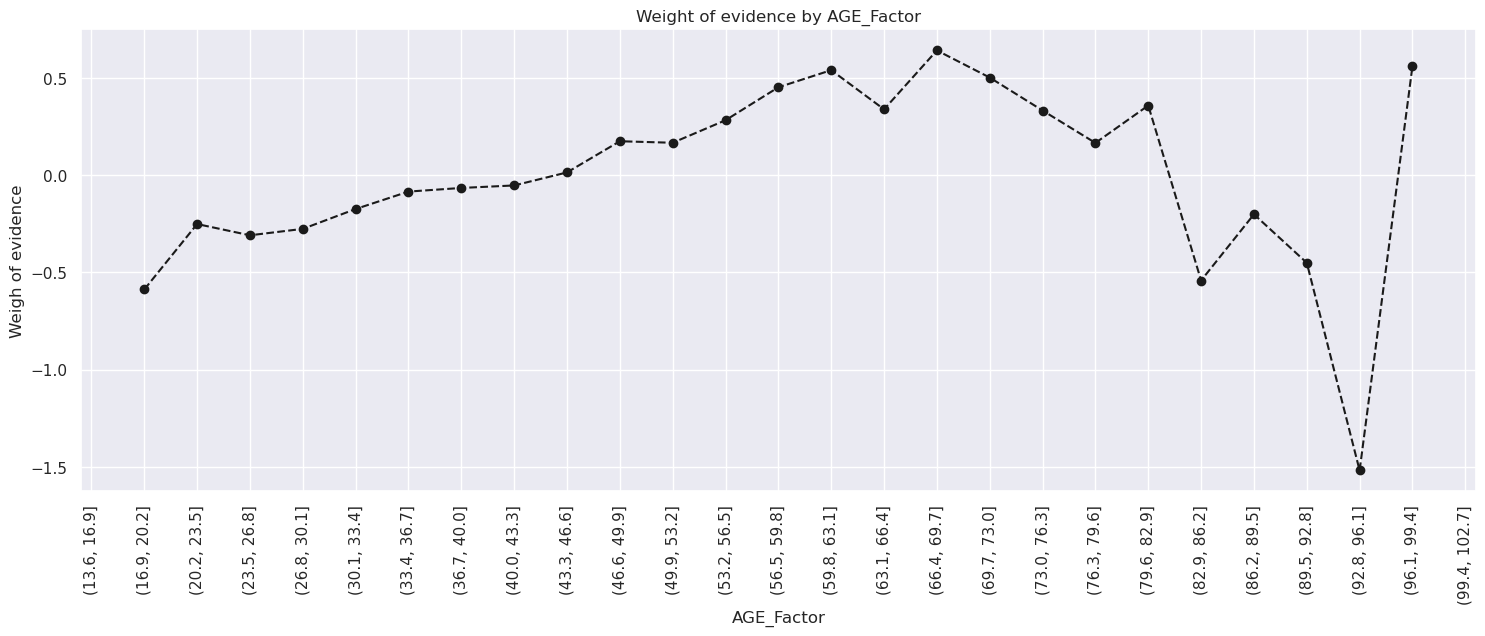

In [306]:
plot_by_WoE(df_temp,90)

In [307]:
df_inputs_prepr['AGE: <16.9'] = np.where(df_inputs_prepr['AGE'].isin(range(17)),1,0)
df_inputs_prepr['AGE: 16.9-30'] = np.where(df_inputs_prepr['AGE'].isin(range(17,23)),1,0)
df_inputs_prepr['AGE: 31-43.3'] = np.where(df_inputs_prepr['AGE'].isin(range(23,43)),1,0)
df_inputs_prepr['AGE: 43-56.5'] = np.where(df_inputs_prepr['AGE'].isin(range(43,57)),1,0)
df_inputs_prepr['AGE: 56-66.4'] = np.where(df_inputs_prepr['AGE'].isin(range(57,66)),1,0)
df_inputs_prepr['AGE: 66-82.9'] = np.where(df_inputs_prepr['AGE'].isin(range(66,83)),1,0)
df_inputs_prepr['AGE: >83'] = np.where(df_inputs_prepr['AGE'].isin(range(83, int(df_inputs_prepr['AGE'].max()))),1,0)

In [308]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'MONTHS_IN_THE_JOB', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


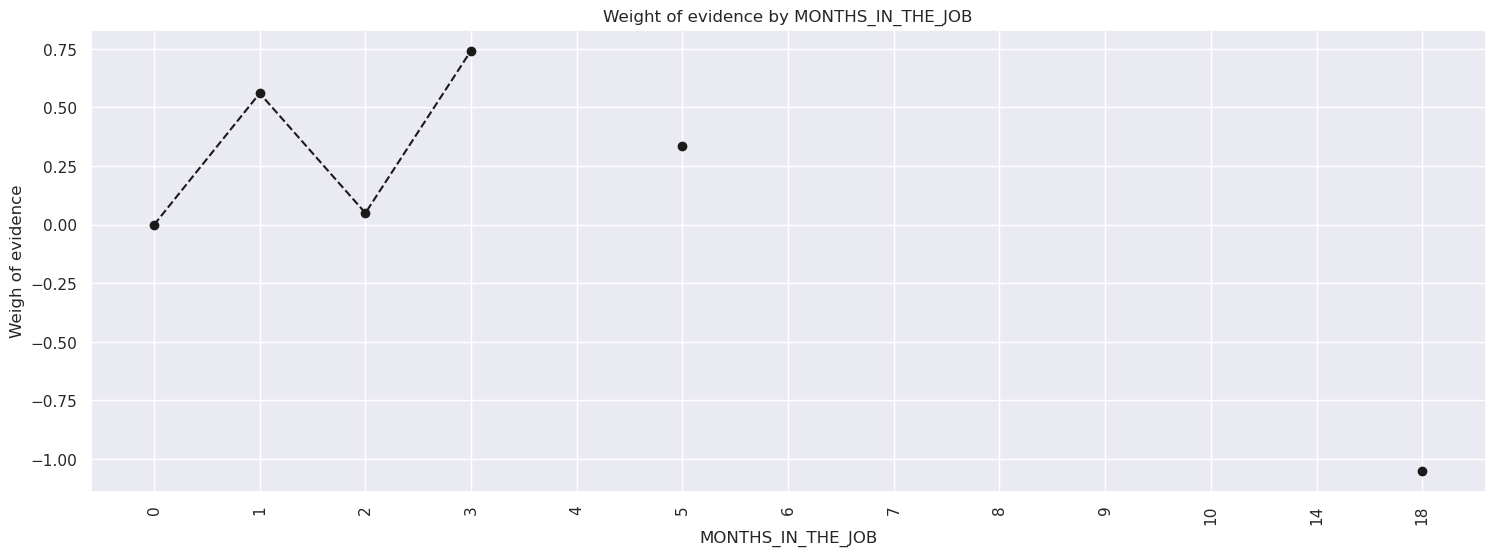

In [309]:
plot_by_WoE(df_temp,90)

In [310]:
df_inputs_prepr['MONTHS_IN_THE_JOB: <0'] = np.where(df_inputs_prepr['MONTHS_IN_THE_JOB'].isin(range(0)),1,0)
df_inputs_prepr['MONTHS_IN_THE_JOB: >1'] = np.where(df_inputs_prepr['MONTHS_IN_THE_JOB'].isin(range(1, int(df_inputs_prepr['MONTHS_IN_THE_JOB'].max()))),1,0)

In [311]:
df_temp = WoE_discrete(df_inputs_prepr, 'PAYMENT_DAY', df_targets_prepr)

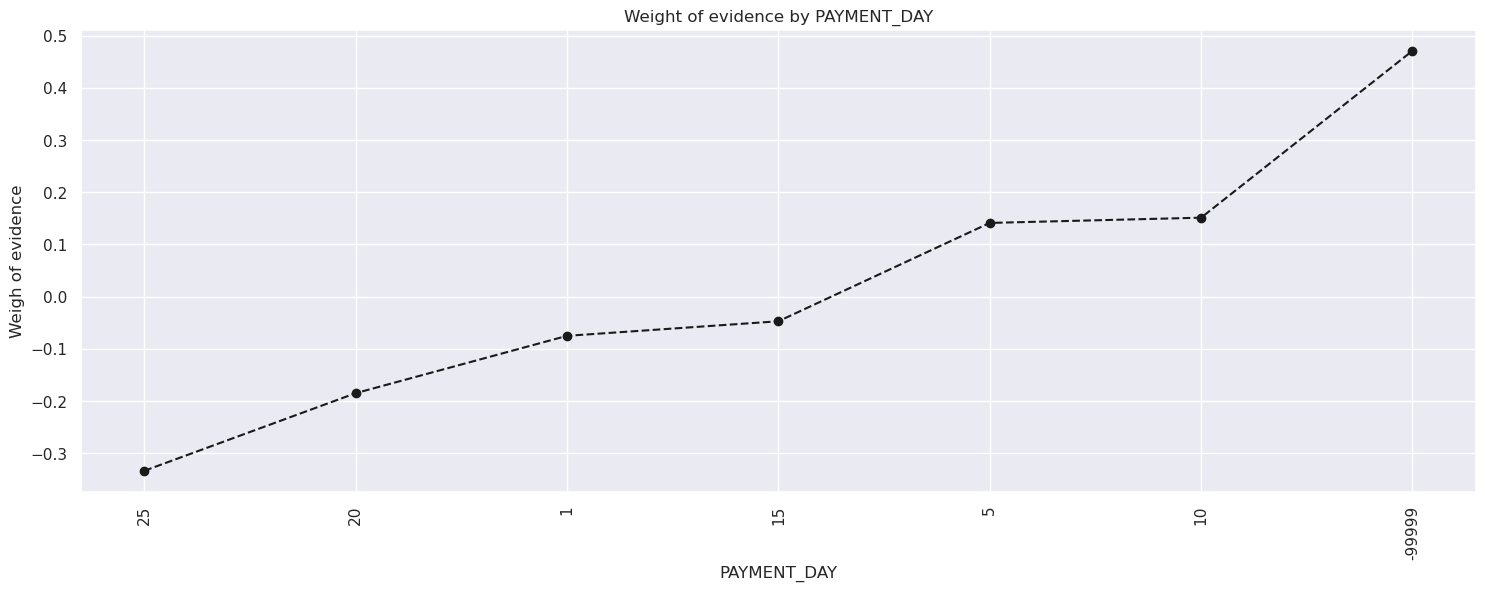

In [312]:
plot_by_WoE(df_temp,90)

# Train dataMachine Learning Models (without imbalance)

In [313]:
inputs_train_with_ref_cat = cr_data_inputs_train.loc[: , ['AGE: <16.9',
'AGE: >83',
'AGE: 16.9-30',
'AGE: 31-43.3',
'AGE: 43-56.5',
'AGE: 56-66.4',
'AGE: 66-82.9',
'american:0',
'american:1',
'app_type:0',
'app_type:Carga',
'app_type:Web',
'b_account:0',
'b_account:1',
'b_account:2',
'car:0',
'car:1',
'company:N',
'company:Y',
'dependant_0',
'dependant_1',
'dependant_10_13',
'dependant_12_15_7',
'dependant_3_2',
'dependant_6_8_4_5_11',
'dependant_9_14',
'diners:0',
'diners:1',
'educational:0.0',
'educational:1.0',
'educational:2.0',
'educational:3.0',
'educational:4.0',
'educational:5.0',
'marital:0',
'marital:1',
'marital:2',
'marital:3',
'marital:4',
'marital:5',
'marital:6',
'marital:7',
'master:0',
'master:1',
'MONTHS_IN_RESIDENCE: <5',
'MONTHS_IN_RESIDENCE: >60',
'MONTHS_IN_RESIDENCE: 13-24',
'MONTHS_IN_RESIDENCE: 25-40',
'MONTHS_IN_RESIDENCE: 41-44',
'MONTHS_IN_RESIDENCE: 45-48',
'MONTHS_IN_RESIDENCE: 49-60',
'MONTHS_IN_RESIDENCE: 5-12',
'MONTHS_IN_THE_JOB: <0',
'MONTHS_IN_THE_JOB: >1',
'nationality:0',
'nationality:1',
'nationality:2',
'occ_type:0.0',
'occ_type:1.0',
'occ_type:2.0',
'occ_type:3.0',
'occ_type:4.0',
'occ_type:5.0',
'other_card:0',
'other_card:1',
'payment_day:1',
'payment_day:10',
'payment_day:15',
'payment_day:20',
'payment_day:25',
'payment_day:5',
'payment_day:-99999',
'PERSONAL_MONTHLY_INCOME: <256.479',
'PERSONAL_MONTHLY_INCOME: >10900',
'PERSONAL_MONTHLY_INCOME: 1238-2221.265',
'PERSONAL_MONTHLY_INCOME: 2221-2515.983',
'PERSONAL_MONTHLY_INCOME: 2515-3011.18',
'PERSONAL_MONTHLY_INCOME: 256-845.915',
'PERSONAL_MONTHLY_INCOME: 3007-4485',
'PERSONAL_MONTHLY_INCOME: 4485-8911',
'PERSONAL_MONTHLY_INCOME: 845-1238.872',
'PERSONAL_MONTHLY_INCOME: 8911-10900',
'postal_code:1',
'postal_code:2',
'product:1',
'product:2',
'product:7',
'prof_code_0_1',
'prof_code_12_11',
'prof_code_13_16_6_17_5_18',
'prof_code_2_10',
'prof_code_4_15_3',
'prof_code_9',
'prof_code_14',
'prof_code_7_8',
'resi_type_0_5_4',
'resi_type_1',
'resi_type_2',
'resi_type_3',
'state_resi:AC_DF_AM_AL',
'state_resi:BA_PE',
'state_resi:MS_MT_RJ_MA_CE',
'state_resi:PA_PI_MG',
'state_resi:RN_ES_GO_RR',
'state_resi:SC_RO',
'state_resi:SE',
'state_resi:SP',
'state_resi:TO_AP_PR_PB_RS',
'visa:0',
'visa:1']]

In [314]:
ref_categories = ['AGE: >83',
'state_resi:SE',
'dependant_10_13',
'resi_type_2',
'prof_code_14',
'MONTHS_IN_RESIDENCE: >60',
'PERSONAL_MONTHLY_INCOME: 845-1238.872',
'MONTHS_IN_THE_JOB: <0',
'app_type:0',
'postal_code:2',
'marital:1',
'nationality:1',
'resi_type_2',
'visa:0',
'master:0',
'diners:1',
'american:1',
'other_card:1',
'b_account:2',
'car:1',
'company:Y',
'occ_type:4.0',
'product:7',
'educational:0.0',
'payment_day:25'
]

In [315]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis =1)

In [316]:
reg = LogisticRegression()

In [317]:
pd.options.display.max_rows = None

In [318]:
reg.fit(inputs_train, cr_data_targets_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [319]:
reg.intercept_

array([-0.82797364])

In [320]:
reg.coef_

array([[-0.41025117,  0.23565728,  0.48644535,  0.72849121,  0.99113118,
         0.97719164, -0.14466497,  0.05086555,  0.03093804,  0.1605707 ,
         0.12120823,  0.07451454, -0.04065385,  0.18539174,  0.24758018,
         0.12333366,  0.15094169, -0.04664329, -0.39922549, -0.00904241,
         0.63231753, -0.09979213,  0.18667088,  0.17021466,  0.89017686,
         0.11128312,  0.23464968,  0.34745071,  0.16522347,  0.00770738,
         0.00470923,  0.07654837,  0.22511431, -0.07964527, -0.07560696,
        -0.11735882,  0.12472588, -0.33896046,  0.41312382, -0.1725958 ,
         0.29798286,  0.01106775, -0.00801225,  0.01904328,  0.11135592,
         0.07271385,  0.3215815 , -0.007251  ,  0.01581503,  0.2028761 ,
         0.34897194,  0.2161337 ,  0.12581918,  0.37277482,  0.75809603,
         0.06045395, -0.08521266,  0.02961244,  0.01524095,  0.45689288,
         0.09514506,  0.55488143,  0.03498861,  0.87115632, -0.09777563,
         0.1914887 ,  0.22593615,  0.10662597,  0.1

In [321]:
feature_name = inputs_train.columns.values

In [322]:
summary_table = pd.DataFrame(columns = ['feature names'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

feature names  Coefficients
0                                Intercept     -0.827974
1                               AGE: <16.9     -0.410251
2                             AGE: 16.9-30      0.235657
3                             AGE: 31-43.3      0.486445
4                             AGE: 43-56.5      0.728491
5                             AGE: 56-66.4      0.991131
6                             AGE: 66-82.9      0.977192
7                               american:0     -0.144665
8                           app_type:Carga      0.050866
9                             app_type:Web      0.030938
10                             b_account:0      0.160571
11                             b_account:1      0.121208
12                                   car:0      0.074515
13                               company:N     -0.040654
14                             dependant_0      0.185392
15                             dependant_1      0.247580
16                       dependant_12_15_7      0.123334
17                           dependant_3_2      0.150942
18                    dependant_6_8_4_5_11     -0.046643
19                          dependant_9_14     -0.399225
20                                diners:0     -0.009042
21                         educational:1.0      0.632318
22                         educational:2.0     -0.099792
23                         educational:3.0      0.186671
24                         educational:4.0      0.170215
25                         educational:5.0      0.890177
26                               marital:0      0.111283
27                               marital:2      0.234650
28                               marital:3      0.347451
29                               marital:4      0.165223
30                               marital:5      0.007707
31                               marital:6      0.004709
32                               marital:7      0.076548
33                                master:1      0.225114
34                 MONTHS_IN_RESIDENCE: <5     -0.079645
35              MONTHS_IN_RESIDENCE: 13-24     -0.075607
36              MONTHS_IN_RESIDENCE: 25-40     -0.117359
37              MONTHS_IN_RESIDENCE: 41-44      0.124726
38              MONTHS_IN_RESIDENCE: 45-48     -0.338960
39              MONTHS_IN_RESIDENCE: 49-60      0.413124
40               MONTHS_IN_RESIDENCE: 5-12     -0.172596
41                   MONTHS_IN_THE_JOB: >1      0.297983
42                           nationality:0      0.011068
43                           nationality:2     -0.008012
44                            occ_type:0.0      0.019043
45                            occ_type:1.0      0.111356
46                            occ_type:2.0      0.072714
47                            occ_type:3.0      0.321581
48                            occ_type:5.0     -0.007251
49                            other_card:0      0.015815
50                           payment_day:1      0.202876
51                          payment_day:10      0.348972
52                          payment_day:15      0.216134
53                          payment_day:20      0.125819
54                           payment_day:5      0.372775
55                      payment_day:-99999      0.758096
56       PERSONAL_MONTHLY_INCOME: <256.479      0.060454
57         PERSONAL_MONTHLY_INCOME: >10900     -0.085213
58  PERSONAL_MONTHLY_INCOME: 1238-2221.265      0.029612
59  PERSONAL_MONTHLY_INCOME: 2221-2515.983      0.015241
60   PERSONAL_MONTHLY_INCOME: 2515-3011.18      0.456893
61    PERSONAL_MONTHLY_INCOME: 256-845.915      0.095145
62      PERSONAL_MONTHLY_INCOME: 3007-4485      0.554881
63      PERSONAL_MONTHLY_INCOME: 4485-8911      0.034989
64     PERSONAL_MONTHLY_INCOME: 8911-10900      0.871156
65                           postal_code:1     -0.097776
66                               product:1      0.191489
67                               product:2      0.225936
68                           prof_code_0_1      0.106626
69                         prof_code_12

## PI values Logistics ression

In [323]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
       
        
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [324]:
reg = LogisticRegression_with_p_values()

In [325]:
reg.fit(inputs_train, cr_data_targets_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [326]:
summary_table = pd.DataFrame(columns = ['feature names'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [327]:
p_values = reg.p_values

In [328]:
p_values = np.append(np.nan, np.array(p_values))

In [329]:
summary_table['p_values'] = p_values

In [330]:
summary_table

feature names  Coefficients      p_values
0                                Intercept     -0.827974           NaN
1                               AGE: <16.9     -0.410251  7.742400e-01
2                             AGE: 16.9-30      0.235657  1.085894e-01
3                             AGE: 31-43.3      0.486445  5.522950e-04
4                             AGE: 43-56.5      0.728491  2.106093e-07
5                             AGE: 56-66.4      0.991131  3.101769e-12
6                             AGE: 66-82.9      0.977192  7.182631e-12
7                               american:0     -0.144665  6.575767e-01
8                           app_type:Carga      0.050866  2.157966e-01
9                             app_type:Web      0.030938  2.076424e-01
10                             b_account:0      0.160571  7.706067e-01
11                             b_account:1      0.121208  8.257075e-01
12                                   car:0      0.074515  1.416037e-01
13                               company:N     -0.040654  1.561039e-01
14                             dependant_0      0.185392  7.334432e-01
15                             dependant_1      0.247580  6.498072e-01
16                       dependant_12_15_7      0.123334  8.436579e-01
17                           dependant_3_2      0.150942  7.819014e-01
18                    dependant_6_8_4_5_11     -0.046643  9.322153e-01
19                          dependant_9_14     -0.399225  6.202624e-01
20                                diners:0     -0.009042  9.790404e-01
21                         educational:1.0      0.632318  1.472802e-01
22                         educational:2.0     -0.099792  4.943261e-01
23                         educational:3.0      0.186671  1.008727e-01
24                         educational:4.0      0.170215  1.252390e-01
25                         educational:5.0      0.890177  1.372448e-01
26                               marital:0      0.111283  5.677401e-01
27                               marital:2      0.234650  5.380974e-18
28                               marital:3      0.347451  2.642882e-03
29                               marital:4      0.165223  1.665627e-03
30                               marital:5      0.007707  9.179764e-01
31                               marital:6      0.004709  9.379446e-01
32                               marital:7      0.076548  5.069693e-01
33                                master:1      0.225114  2.699171e-07
34                 MONTHS_IN_RESIDENCE: <5     -0.079645  1.145199e-01
35              MONTHS_IN_RESIDENCE: 13-24     -0.075607  1.635477e-01
36              MONTHS_IN_RESIDENCE: 25-40     -0.117359  7.519250e-02
37              MONTHS_IN_RESIDENCE: 41-44      0.124726  6.428476e-01
38              MONTHS_IN_RESIDENCE: 45-48     -0.338960  9.134380e-02
39              MONTHS_IN_RESIDENCE: 49-60      0.413124  3.902361e-02
40               MONTHS_IN_RESIDENCE: 5-12     -0.172596  5.180828e-04
41                   MONTHS_IN_THE_JOB: >1      0.297983  3.837305e-01
42                           nationality:0      0.011068  8.753406e-01
43                           nationality:2     -0.008012  9.767570e-01
44                            occ_type:0.0      0.019043  8.299977e-01
45                            occ_type:1.0      0.111356  1.748961e-02
46                            occ_type:2.0      0.072714  6.296965e-02
47                            occ_type:3.0      0.321581  3.665721e-02
48                            occ_type:5.0     -0.007251  8.646949e-01
49                            other_card:0      0.015815  9.497398e-01
50                           payment_day:1      0.202876  2.799627e-03
51                          payment_day:10      0.348972  2.242445e-23
52                          payment_day:15      0.216134  5.426455e-08
53                          payment_day:20      0.125819  6.316120e-03
54                           payment_day:5      0.372775  5.349341e-18
55                      payment_day:-99999      0.758

In [331]:
summary_table['p_values'] = summary_table['p_values'].apply(lambda x: format(x, '.8f'))

# Training data implementation (without imbalance)

In [332]:
inputs_train_with_ref_cat = cr_data_inputs_train.loc[: , ['AGE: <16.9',
'AGE: 16.9-30',
'AGE: 31-43.3',
'AGE: 43-56.5',
'AGE: 56-66.4',
'AGE: 66-82.9',
'company:N',
'marital:0',
'marital:2',
'marital:3',
'marital:4',
'marital:5',
'marital:6',
'marital:7',
'master:1',
'MONTHS_IN_RESIDENCE: <5',
'MONTHS_IN_RESIDENCE: 13-24',
'MONTHS_IN_RESIDENCE: 25-40',
'MONTHS_IN_RESIDENCE: 41-44',
'MONTHS_IN_RESIDENCE: 45-48',
'MONTHS_IN_RESIDENCE: 49-60',
'MONTHS_IN_RESIDENCE: 5-12',
'MONTHS_IN_THE_JOB: >1',
'occ_type:0.0',
'occ_type:1.0',
'occ_type:2.0',
'occ_type:3.0',
'occ_type:5.0',
'payment_day:1',
'payment_day:10',
'payment_day:15',
'payment_day:20',
'payment_day:5',
'payment_day:-99999',
'PERSONAL_MONTHLY_INCOME: <256.479',
'PERSONAL_MONTHLY_INCOME: >10900',
'PERSONAL_MONTHLY_INCOME: 1238-2221.265',
'PERSONAL_MONTHLY_INCOME: 2221-2515.983',
'PERSONAL_MONTHLY_INCOME: 2515-3011.18',
'PERSONAL_MONTHLY_INCOME: 256-845.915',
'PERSONAL_MONTHLY_INCOME: 3007-4485',
'PERSONAL_MONTHLY_INCOME: 4485-8911',
'PERSONAL_MONTHLY_INCOME: 8911-10900',
'product:1',
'product:2',
'prof_code_12_11',
'prof_code_13_16_6_17_5_18',
'prof_code_2_10',
'prof_code_4_15_3',
'prof_code_9',
'prof_code_7_8',
'resi_type_0_5_4',
'resi_type_1',
'resi_type_3',
'state_resi:AC_DF_AM_AL',
'state_resi:BA_PE',
'state_resi:MS_MT_RJ_MA_CE',
'state_resi:PA_PI_MG',
'state_resi:RN_ES_GO_RR',
'state_resi:SC_RO',
'state_resi:SP',
'state_resi:TO_AP_PR_PB_RS',
'company:Y',
'marital:1',
'MONTHS_IN_RESIDENCE: >60',
'MONTHS_IN_THE_JOB: <0',
'occ_type:4.0',
'payment_day:25',
'PERSONAL_MONTHLY_INCOME: 845-1238.872',
'product:7',
'postal_code:2',
'resi_type_2',
'state_resi:SE']]


In [333]:
ref_categories = ['company:Y',
'marital:1',
'MONTHS_IN_RESIDENCE: >60',
'MONTHS_IN_THE_JOB: <0',
'occ_type:4.0',
'payment_day:25',
'PERSONAL_MONTHLY_INCOME: 845-1238.872',
'product:7',
'postal_code:2',
'resi_type_2',
'state_resi:SE']


In [334]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis =1)

In [335]:
reg2 =  LogisticRegression_with_p_values()
reg2.fit(inputs_train, cr_data_targets_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [336]:
feature_name = inputs_train.columns.values

In [337]:
summary_table = pd.DataFrame(columns = ['feature names'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()

In [338]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

feature names  Coefficients      p_values
0                                Intercept     -0.652335           NaN
1                               AGE: <16.9     -0.591072  6.780547e-01
2                             AGE: 16.9-30      0.209038  7.584177e-02
3                             AGE: 31-43.3      0.449027  5.075786e-05
4                             AGE: 43-56.5      0.687219  6.555560e-10
5                             AGE: 56-66.4      0.950725  1.439047e-16
6                             AGE: 66-82.9      0.938821  9.226682e-16
7                                company:N     -0.038982  1.664628e-01
8                                marital:0      0.061224  7.435060e-01
9                                marital:2      0.236442  5.583723e-19
10                               marital:3      0.334630  3.719930e-03
11                               marital:4      0.149649  4.072473e-03
12                               marital:5      0.006247  9.333233e-01
13                               marital:6      0.007588  8.996535e-01
14                               marital:7      0.064319  5.760941e-01
15                                master:1      0.213400  1.647134e-07
16                 MONTHS_IN_RESIDENCE: <5     -0.106193  3.065091e-02
17              MONTHS_IN_RESIDENCE: 13-24     -0.096394  6.978626e-02
18              MONTHS_IN_RESIDENCE: 25-40     -0.143070  2.771061e-02
19              MONTHS_IN_RESIDENCE: 41-44      0.109166  6.847684e-01
20              MONTHS_IN_RESIDENCE: 45-48     -0.435001  2.761233e-02
21              MONTHS_IN_RESIDENCE: 49-60      0.428064  3.450194e-02
22               MONTHS_IN_RESIDENCE: 5-12     -0.196922  5.090174e-05
23                   MONTHS_IN_THE_JOB: >1      0.302930  3.674736e-01
24                            occ_type:0.0      0.022874  6.891649e-01
25                            occ_type:1.0      0.110049  1.623330e-02
26                            occ_type:2.0      0.072832  5.774924e-02
27                            occ_type:3.0      0.295390  5.315535e-02
28                            occ_type:5.0     -0.003674  9.300970e-01
29                           payment_day:1      0.205537  2.384910e-03
30                          payment_day:10      0.354220  2.225577e-24
31                          payment_day:15      0.221844  2.054846e-08
32                          payment_day:20      0.132814  3.814345e-03
33                           payment_day:5      0.374564  2.356306e-18
34                      payment_day:-99999      0.680828  1.931741e-02
35       PERSONAL_MONTHLY_INCOME: <256.479      0.060188  3.993731e-01
36         PERSONAL_MONTHLY_INCOME: >10900     -0.068622  8.033164e-01
37  PERSONAL_MONTHLY_INCOME: 1238-2221.265      0.024234  6.359991e-01
38  PERSONAL_MONTHLY_INCOME: 2221-2515.983      0.016829  9.016773e-01
39   PERSONAL_MONTHLY_INCOME: 2515-3011.18      0.436384  5.365098e-03
40    PERSONAL_MONTHLY_INCOME: 256-845.915      0.090084  4.026449e-03
41      PERSONAL_MONTHLY_INCOME: 3007-4485      0.602107  8.648251e-04
42      PERSONAL_MONTHLY_INCOME: 4485-8911      0.054243  7.763679e-01
43     PERSONAL_MONTHLY_INCOME: 8911-10900      1.076150  2.194748e-01
44                               product:1      0.220588  1.011734e-03
45                               product:2      0.256664  5.722969e-04
46                         prof_code_12_11      0.120683  2.744091e-02
47               prof_code_13_16_6_17_5_18      0.210653  3.601986e-02
48                          prof_code_2_10     -0.085953  1.020667e-01
49                        prof_code_4_15_3     -0.406721  1.019395e-01
50                             prof_code_9     -0.028008  4.537586e-01
51                           prof_code_7_8     -0.391578  3.331982e-03
52                         resi_type_0_5_4      0.101004  8.258654e-02
53                             resi_type_1      0.170761  9.190686e-06
54                             resi_type_3      0.527783  2.779026e-02
55                  state_resi:AC_DF_AM_AL      0.180

In [339]:
summary_table['p_values'] = summary_table['p_values'].apply(lambda x: format(x, '.8f'))

# Weight of Evidence (Testing Dataset) (without imbalance)

In [340]:
file_path = 'CS_data.txt'
CS_data = pd.read_csv(file_path, sep='\t', encoding='utf-8')

/tmp/ipykernel_158/214279794.py:2: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  CS_data = pd.read_csv(file_path, sep='\t', encoding='utf-8')


In [341]:
CS_data_FV= CS_data.copy()

In [342]:
pd.options.display.max_columns = None

In [343]:
loan_data_dummies= [pd.get_dummies(CS_data_FV['SEX'],prefix='SEX',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['APPLICATION_SUBMISSION_TYPE'],prefix='app_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['POSTAL_ADDRESS_TYPE'],prefix='postal_code',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['MARITAL_STATUS'],prefix='marital',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_DEPENDANTS'],prefix='dependant',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['STATE_OF_BIRTH'],prefix='state_birth',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['NATIONALITY'],prefix='nationality',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['RESIDENCIAL_STATE'],prefix='state_resi',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['RESIDENCE_TYPE'],prefix='resi_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_MOBILE_PHONE'],prefix='phone',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_VISA'],prefix='visa',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_MASTERCARD'],prefix='master',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_DINERS'],prefix='diners',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_AMERICAN_EXPRESS'],prefix='american',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_OTHER_CARDS'],prefix='other_card',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_BANKING_ACCOUNTS'],prefix='b_account',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['QUANT_CARS'],prefix='car',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['COMPANY'],prefix='company',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PROFESSION_CODE'],prefix='prof_code',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['OCCUPATION_TYPE'],prefix='occ_type',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PRODUCT'],prefix='product',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['FLAG_ACSP_RECORD'],prefix='delinquency',prefix_sep=':'),
                     #pd.get_dummies(CS_data_FV['RESIDENCIAL_ZIP_3'],prefix='zip_3',prefix_sep=':'),
                     #pd.get_dummies(CS_data_FV['PROFESSIONAL_ZIP_3'],prefix='pro_zip_3',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['EDUCATION_LEVEL.1'],prefix='educational',prefix_sep=':'),
                     pd.get_dummies(CS_data_FV['PAYMENT_DAY'],prefix='payment_day',prefix_sep=':')
                    

                    ]

In [344]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [345]:
CS_data_FV = pd.concat([CS_data_FV, loan_data_dummies], axis = 1)

In [346]:
data_types = pd.DataFrame(
    CS_data_FV.dtypes,
    columns=['Data Type'])

In [347]:
missing_data = pd.DataFrame(
    CS_data_FV.isnull().sum(),
    columns=['missing values'])

In [348]:
unique_values = pd.DataFrame(
    columns=['unique Type'])
for row in list (CS_data_FV.columns.values):
    unique_values.loc[row] = [CS_data_FV[row].nunique()]

In [349]:
dfq = pd.DataFrame(CS_data_FV.describe().transpose())

In [350]:
dq_report = data_types.join(missing_data).join(unique_values).join(dfq)

In [351]:
CS_data_FV['QUANT_DEPENDANTS'] = CS_data_FV['QUANT_DEPENDANTS'].replace(53, 0)

In [352]:
CS_data_FV['TARGET_LABEL_BAD.1'] = CS_data_FV['TARGET_LABEL_BAD.1'].map({0: 1, 1: 0})
#changing the parameters into, 1 is non-defaulters and 0 is defaulters

In [353]:
df1 = pd.concat([CS_data_FV['MONTHS_IN_THE_JOB'], CS_data_FV['TARGET_LABEL_BAD.1']], axis=1)
df_target = pd.DataFrame(CS_data_FV['TARGET_LABEL_BAD.1'])

In [354]:
cr_data_inputs_train, cr_data_inputs_test, cr_data_targets_train, cr_data_targets_test = train_test_split(CS_data_FV.drop('TARGET_LABEL_BAD.1', axis=1),CS_data_FV['TARGET_LABEL_BAD.1'],test_size = 0.2, random_state=42)

In [355]:
df_inputs_prepr = cr_data_inputs_test
df_targets_prepr = cr_data_targets_test

In [356]:
df1 = pd.concat([df_inputs_prepr['SEX'],df_targets_prepr], axis =1)

In [357]:
df1= pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns[1]].count(),
               df1.groupby(df1.columns.values[0], as_index = False)[df1.columns[1]].mean()],axis =1)

In [358]:
df1 = df1.iloc[: , [0, 1, 3]]

In [359]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']

In [360]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [361]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1- df1['prop_good']) * df1['n_obs']

In [362]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [363]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

In [364]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)

In [365]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [366]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()

In [367]:
def WoE_discrete (df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
    df['n_good'] = df['prop_good'] * df['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
    df = df.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
    df = df.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
    df['diff_prop_good'] = df['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['diff_WoE'] = df['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
# We sum all values of a given column.
    return df

In [368]:
df_temp = WoE_discrete(df_inputs_prepr, 'SEX', df_targets_prepr)

In [369]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [370]:
def plot_by_WoE(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker ='o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weigh of evidence')
    plt.title(str('Weight of evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

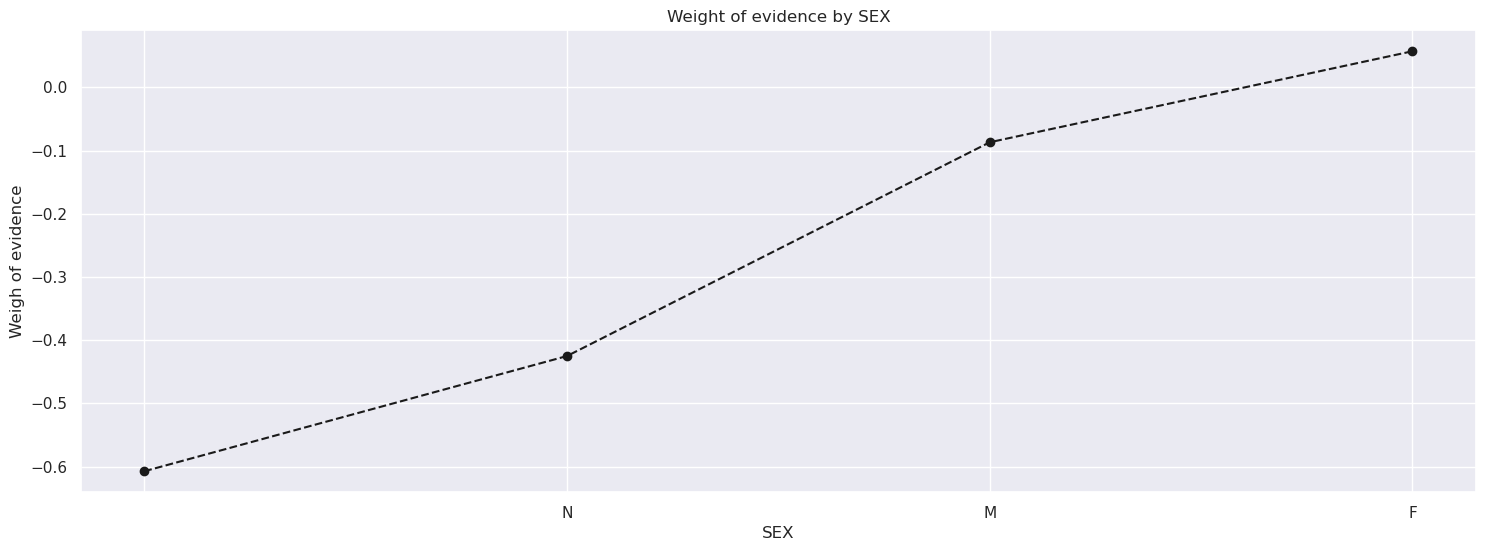

In [371]:
plot_by_WoE(df_temp)

In [372]:
df_inputs_prepr['SEX_blank_N']= sum([df_inputs_prepr['SEX: '],df_inputs_prepr['SEX:N']])

In [373]:
df_temp = WoE_discrete(df_inputs_prepr, 'RESIDENCIAL_STATE', df_targets_prepr)

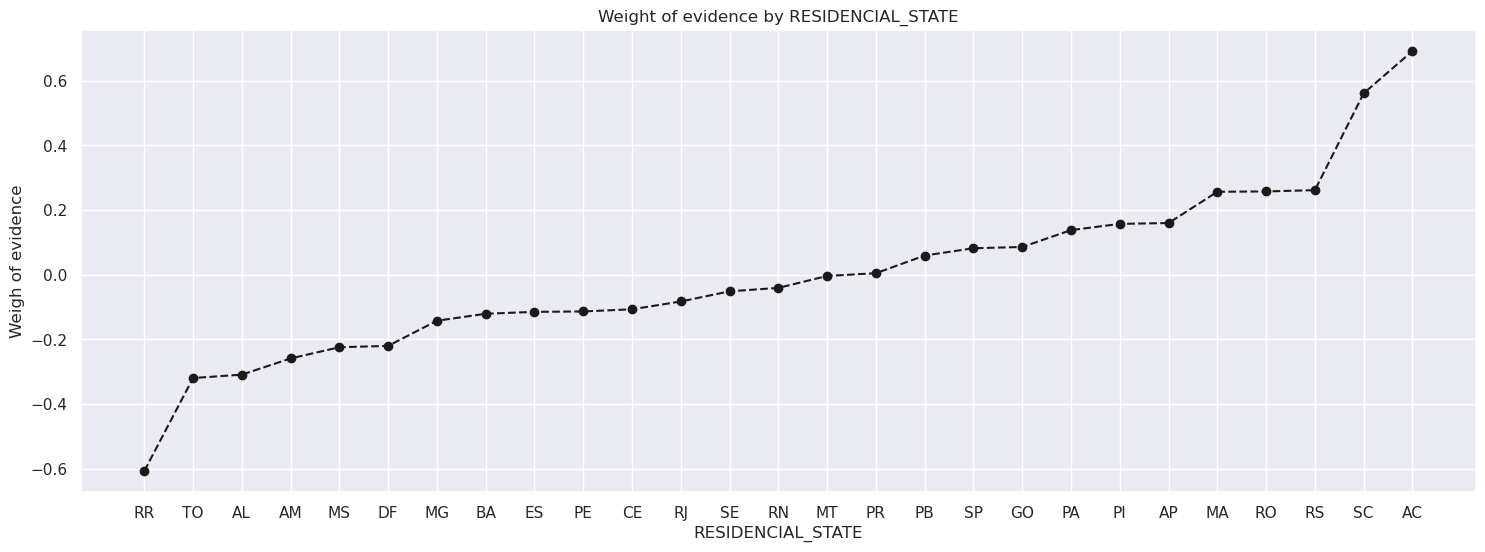

In [374]:
plot_by_WoE(df_temp)

In [375]:
df_inputs_prepr['state_resi:SE'] = sum([df_inputs_prepr['state_resi:SE']])

df_inputs_prepr['state_resi:AC_DF_AM_AL'] = sum([df_inputs_prepr['state_resi:AC'],df_inputs_prepr['state_resi:DF'],
                                              df_inputs_prepr['state_resi:AM'],df_inputs_prepr['state_resi:AL']])

df_inputs_prepr['state_resi:RN_ES_GO_RR'] = sum([df_inputs_prepr['state_resi:RN'],df_inputs_prepr['state_resi:ES'],
                                              df_inputs_prepr['state_resi:GO'],df_inputs_prepr['state_resi:RR']])

df_inputs_prepr['state_resi:BA_PE'] = sum([df_inputs_prepr['state_resi:BA'],df_inputs_prepr['state_resi:PE']])

df_inputs_prepr['state_resi:MS_MT_RJ_MA_CE'] = sum([df_inputs_prepr['state_resi:MS'],df_inputs_prepr['state_resi:MT'],
                                              df_inputs_prepr['state_resi:RJ'],df_inputs_prepr['state_resi:MA'],
                                                   df_inputs_prepr['state_resi:CE']])

df_inputs_prepr['state_resi:SP'] = sum([df_inputs_prepr['state_resi:SP']])

df_inputs_prepr['state_resi:PA_PI_MG'] = sum([df_inputs_prepr['state_resi:PI'],df_inputs_prepr['state_resi:MG'],
                                             df_inputs_prepr['state_resi:PA']])


df_inputs_prepr['state_resi:TO_AP_PR_PB_RS'] = sum([df_inputs_prepr['state_resi:TO'],df_inputs_prepr['state_resi:AP'],
                                              df_inputs_prepr['state_resi:PR'],df_inputs_prepr['state_resi:PB'],
                                                   df_inputs_prepr['state_resi:RS']])


df_inputs_prepr['state_resi:SC_RO'] = sum([df_inputs_prepr['state_resi:SC'],df_inputs_prepr['state_resi:RO']])

In [376]:
df_temp = WoE_discrete(df_inputs_prepr, 'QUANT_DEPENDANTS', df_targets_prepr)

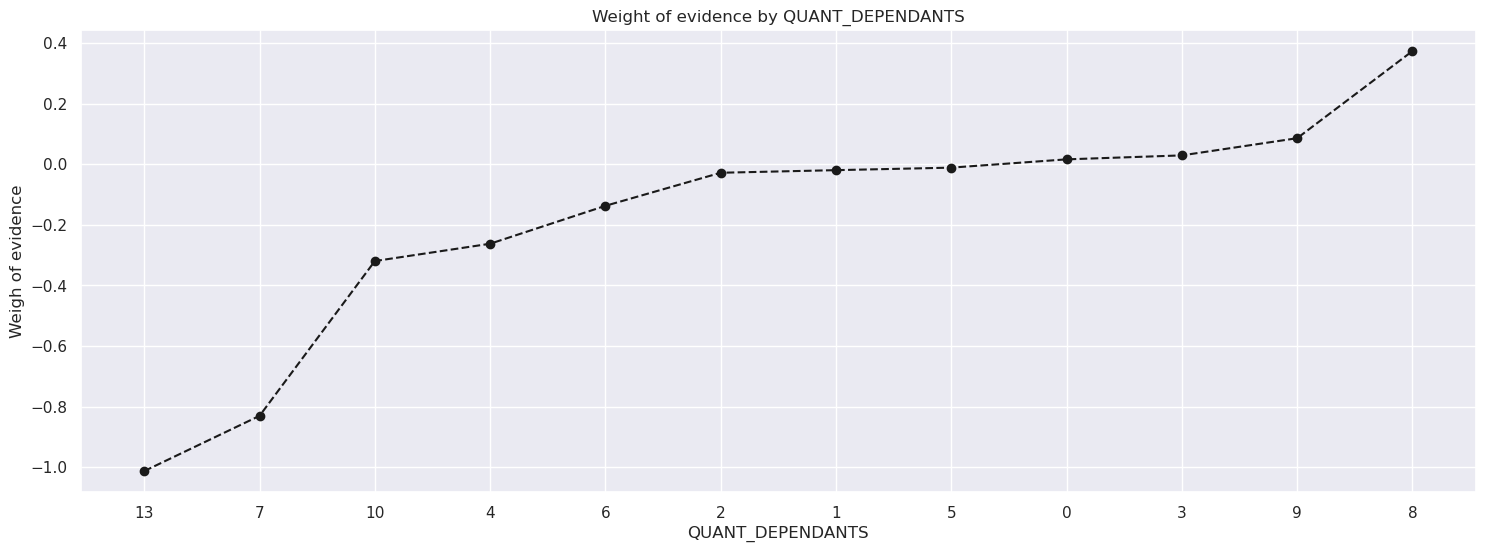

In [377]:
plot_by_WoE(df_temp)

In [378]:
df_inputs_prepr['dependant_10_13'] = sum([df_inputs_prepr['dependant:10'],df_inputs_prepr['dependant:13']])

df_inputs_prepr['dependant_9_14'] = sum([df_inputs_prepr['dependant:9'],df_inputs_prepr['dependant:14']])

df_inputs_prepr['dependant_6_8_4_5_11'] = sum([df_inputs_prepr['dependant:6'],df_inputs_prepr['dependant:8']
                                           ,df_inputs_prepr['dependant:4'],df_inputs_prepr['dependant:5'],
                                              df_inputs_prepr['dependant:11']])


df_inputs_prepr['dependant_3_2'] = sum([df_inputs_prepr['dependant:3'],df_inputs_prepr['dependant:2']])

df_inputs_prepr['dependant_0'] = sum([df_inputs_prepr['dependant:0']])

df_inputs_prepr['dependant_1'] = sum([df_inputs_prepr['dependant:1']])

df_inputs_prepr['dependant_12_15_7'] = sum([df_inputs_prepr['dependant:12'],df_inputs_prepr['dependant:15']
                                           ,df_inputs_prepr['dependant:7']])

In [379]:
df_temp = WoE_discrete(df_inputs_prepr, 'RESIDENCE_TYPE', df_targets_prepr)

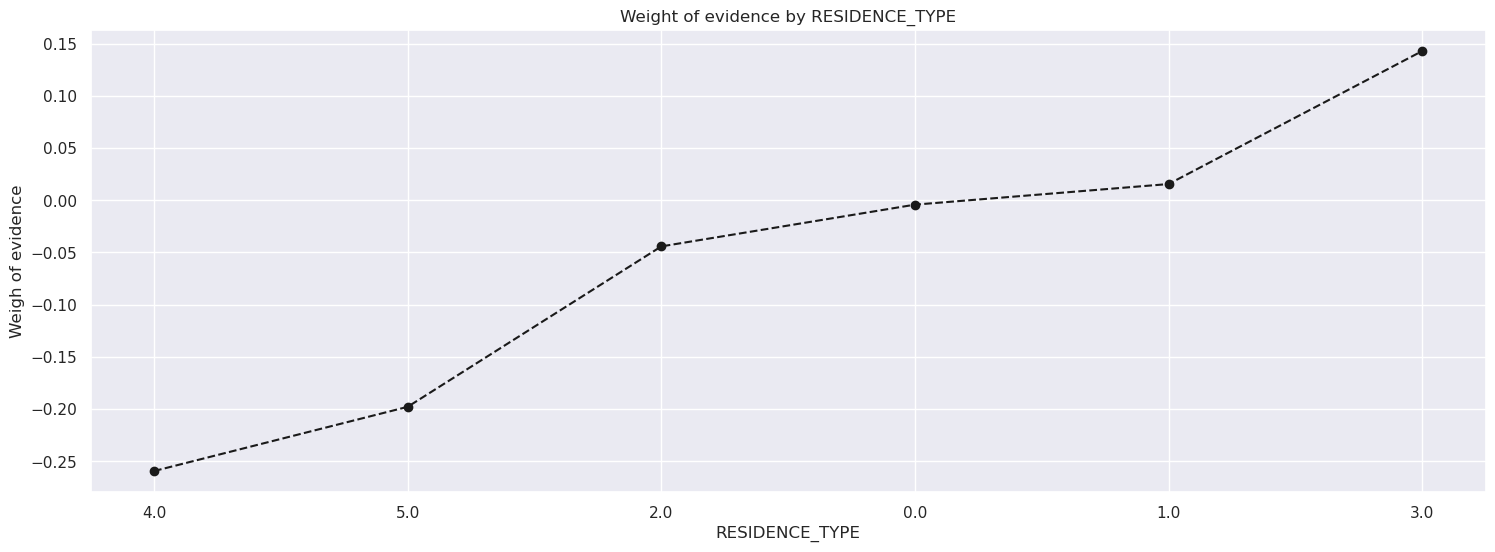

In [380]:
plot_by_WoE(df_temp)

In [381]:
df_inputs_prepr['resi_type_2'] = sum([df_inputs_prepr['resi_type:2.0']])
df_inputs_prepr['resi_type_0_5_4'] = sum([df_inputs_prepr['resi_type:0.0'],df_inputs_prepr['resi_type:5.0']
                                           ,df_inputs_prepr['resi_type:4.0']])
df_inputs_prepr['resi_type_1'] = sum([df_inputs_prepr['resi_type:1.0']])
df_inputs_prepr['resi_type_3'] = sum([df_inputs_prepr['resi_type:3.0']])

In [382]:
df_temp = WoE_discrete(df_inputs_prepr, 'PROFESSION_CODE', df_targets_prepr)

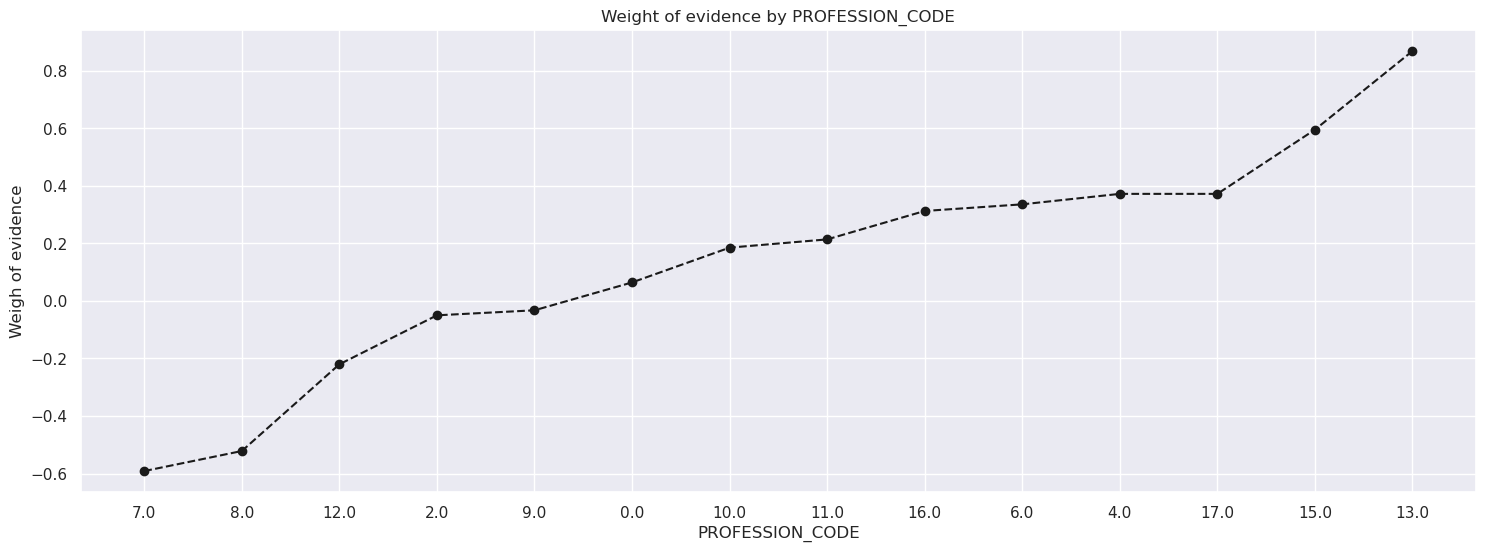

In [383]:
plot_by_WoE(df_temp)

In [384]:
df_inputs_prepr['prof_code_14'] = sum([df_inputs_prepr['prof_code:14.0']])
df_inputs_prepr['prof_code_7_8'] = sum([df_inputs_prepr['prof_code:7.0'],df_inputs_prepr['prof_code:8.0']])

df_inputs_prepr['prof_code_4_15_3'] = sum([df_inputs_prepr['prof_code:4.0'],df_inputs_prepr['prof_code:15.0']
                                          ,df_inputs_prepr['prof_code:3.0']])

df_inputs_prepr['prof_code_2_10'] = sum([df_inputs_prepr['prof_code:2.0'],df_inputs_prepr['prof_code:10.0']])

df_inputs_prepr['prof_code_9'] = sum([df_inputs_prepr['prof_code:9.0']])

df_inputs_prepr['prof_code_0_1'] = sum([df_inputs_prepr['prof_code:0.0'],df_inputs_prepr['prof_code:1.0']])

df_inputs_prepr['prof_code_12_11'] = sum([df_inputs_prepr['prof_code:12.0'],df_inputs_prepr['prof_code:11.0']])

df_inputs_prepr['prof_code_13_16_6_17_5_18'] = sum([df_inputs_prepr['prof_code:13.0'],df_inputs_prepr['prof_code:16.0']
                                          ,df_inputs_prepr['prof_code:6.0'],df_inputs_prepr['prof_code:17.0']
                                          ,df_inputs_prepr['prof_code:5.0'],df_inputs_prepr['prof_code:18.0']])



In [385]:
def WoE_ordered_continuos (df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
    df['n_good'] = df['prop_good'] * df['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
   # df = df.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
   # df = df.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
    df['diff_prop_good'] = df['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['diff_WoE'] = df['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
# We sum all values of a given column.
    return df


In [386]:
df_inputs_prepr['MONTHS_IN_RESIDENCE_Factor']= pd.cut(df_inputs_prepr['MONTHS_IN_RESIDENCE'],50)

In [387]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'MONTHS_IN_RESIDENCE_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


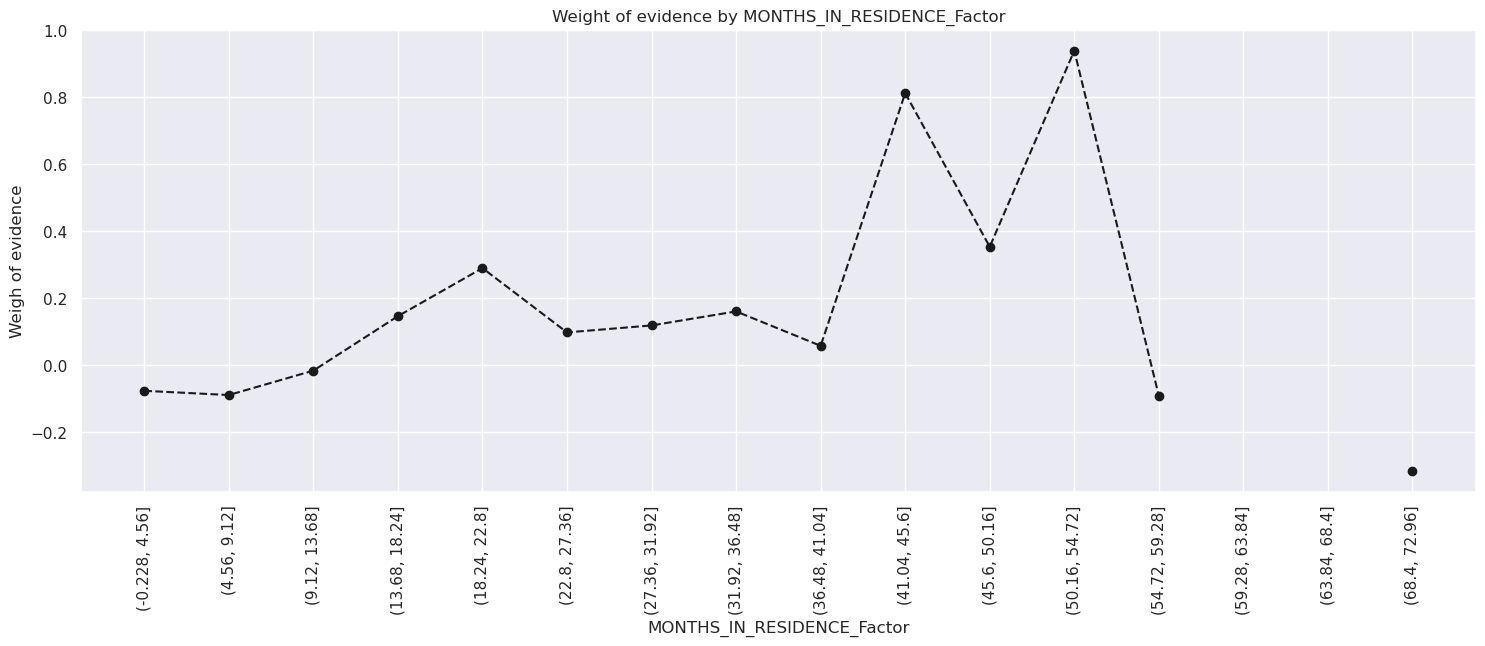

In [388]:
plot_by_WoE(df_temp,90)

In [389]:
df_inputs_prepr['MONTHS_IN_RESIDENCE: <5'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(3)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 5-12'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(3,13)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 13-24'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(13,26)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 25-40'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(26,41)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 41-44'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(41,45)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 45-48'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(45,49)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: 49-60'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(49,61)),1,0)
df_inputs_prepr['MONTHS_IN_RESIDENCE: >60'] = np.where(df_inputs_prepr['MONTHS_IN_RESIDENCE'].isin(range(61, int(df_inputs_prepr['MONTHS_IN_RESIDENCE'].max()))),1,0)

In [390]:
df_inputs_prepr['PERSONAL_MONTHLY_INCOME_Factor']= pd.cut(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'],650)

In [391]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'PERSONAL_MONTHLY_INCOME_Factor', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


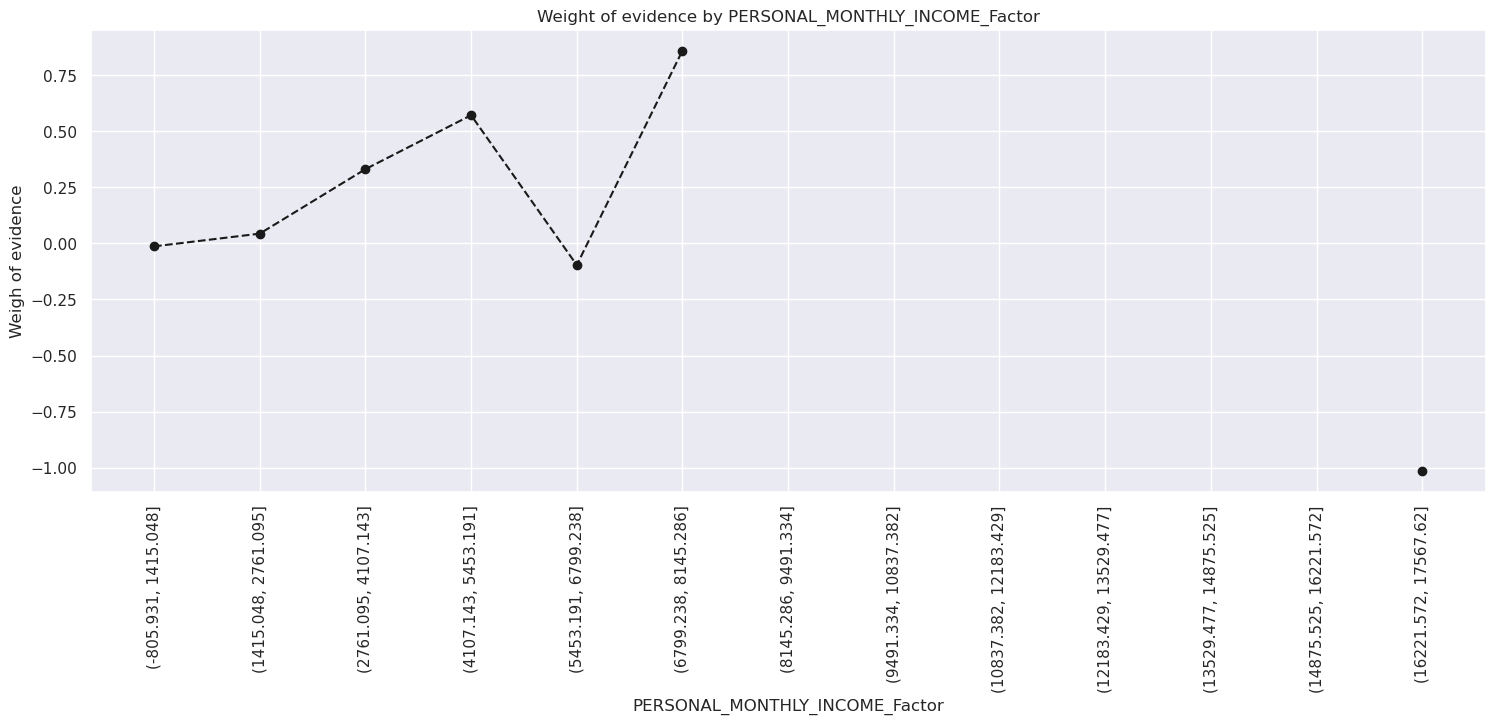

In [392]:
plot_by_WoE(df_temp,90)

In [393]:
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: <256.479'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(256)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 256-845.915'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(256,845)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 845-1238.872'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(845,1238)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 1238-2221.265'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(1238,2221)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 2221-2515.983'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(2221,2515)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 2515-3011.18'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(2515,3007)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 3007-4485'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(3007,4485)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 4485-8911'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(4485,8911)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: 8911-10900'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(8911,10900)),1,0)
df_inputs_prepr['PERSONAL_MONTHLY_INCOME: >10900'] = np.where(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].isin(range(10900, int(df_inputs_prepr['PERSONAL_MONTHLY_INCOME'].max()))),1,0)

In [394]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['PERSONAL_MONTHLY_INCOME']< 3010, :]

In [395]:
df_inputs_prepr_temp['month_income_factor']= pd.cut(df_inputs_prepr_temp['PERSONAL_MONTHLY_INCOME'],30)
df_temp = WoE_ordered_continuos(df_inputs_prepr_temp, 'month_income_factor', df_targets_prepr[df_inputs_prepr_temp.index])

/tmp/ipykernel_158/1931532635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['month_income_factor']= pd.cut(df_inputs_prepr_temp['PERSONAL_MONTHLY_INCOME'],30)


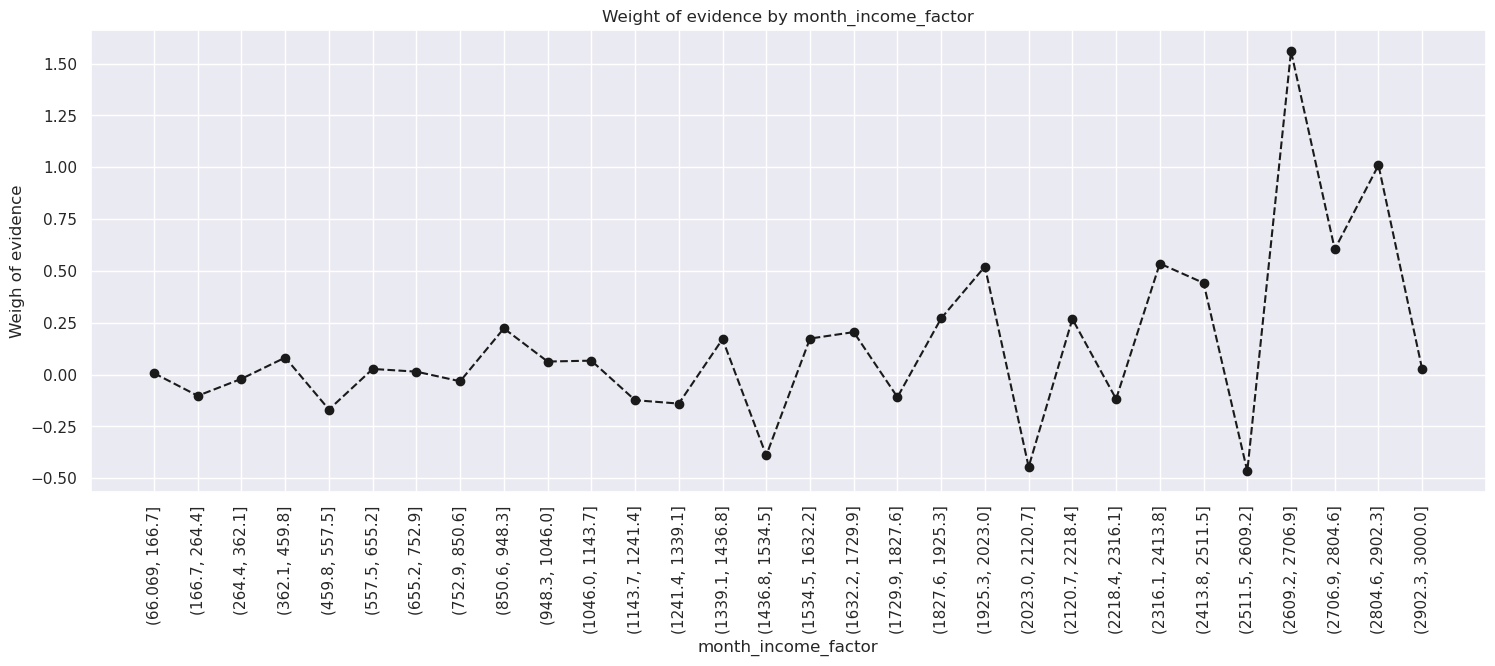

In [396]:
plot_by_WoE(df_temp,90)

In [397]:
df_inputs_prepr['AGE_Factor']= pd.cut(df_inputs_prepr['AGE'],30)

In [398]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'AGE_Factor', df_targets_prepr)

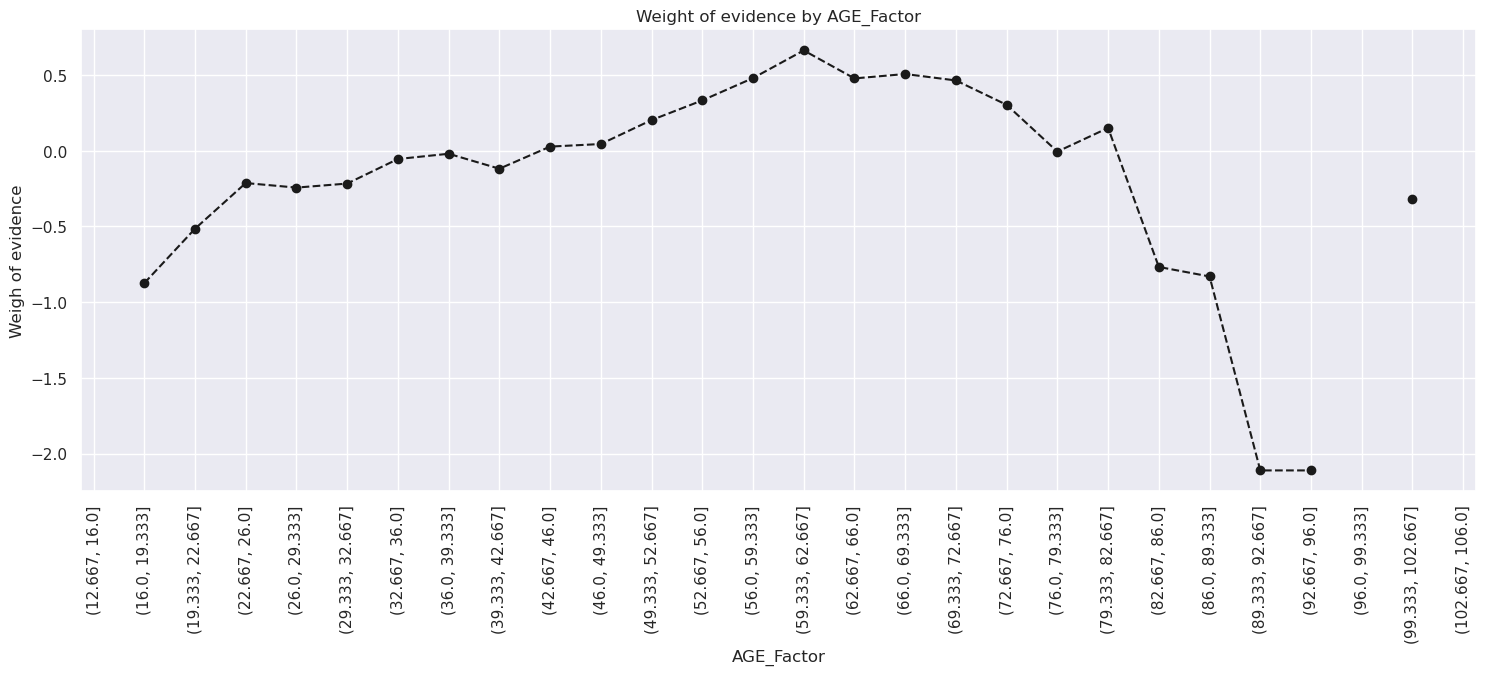

In [399]:
plot_by_WoE(df_temp,90)

In [400]:
df_inputs_prepr['AGE: <16.9'] = np.where(df_inputs_prepr['AGE'].isin(range(17)),1,0)
df_inputs_prepr['AGE: 16.9-30'] = np.where(df_inputs_prepr['AGE'].isin(range(17,23)),1,0)
df_inputs_prepr['AGE: 31-43.3'] = np.where(df_inputs_prepr['AGE'].isin(range(23,43)),1,0)
df_inputs_prepr['AGE: 43-56.5'] = np.where(df_inputs_prepr['AGE'].isin(range(43,57)),1,0)
df_inputs_prepr['AGE: 56-66.4'] = np.where(df_inputs_prepr['AGE'].isin(range(57,66)),1,0)
df_inputs_prepr['AGE: 66-82.9'] = np.where(df_inputs_prepr['AGE'].isin(range(66,83)),1,0)
df_inputs_prepr['AGE: >83'] = np.where(df_inputs_prepr['AGE'].isin(range(83, int(df_inputs_prepr['AGE'].max()))),1,0)

In [401]:
df_temp = WoE_ordered_continuos(df_inputs_prepr, 'MONTHS_IN_THE_JOB', df_targets_prepr)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


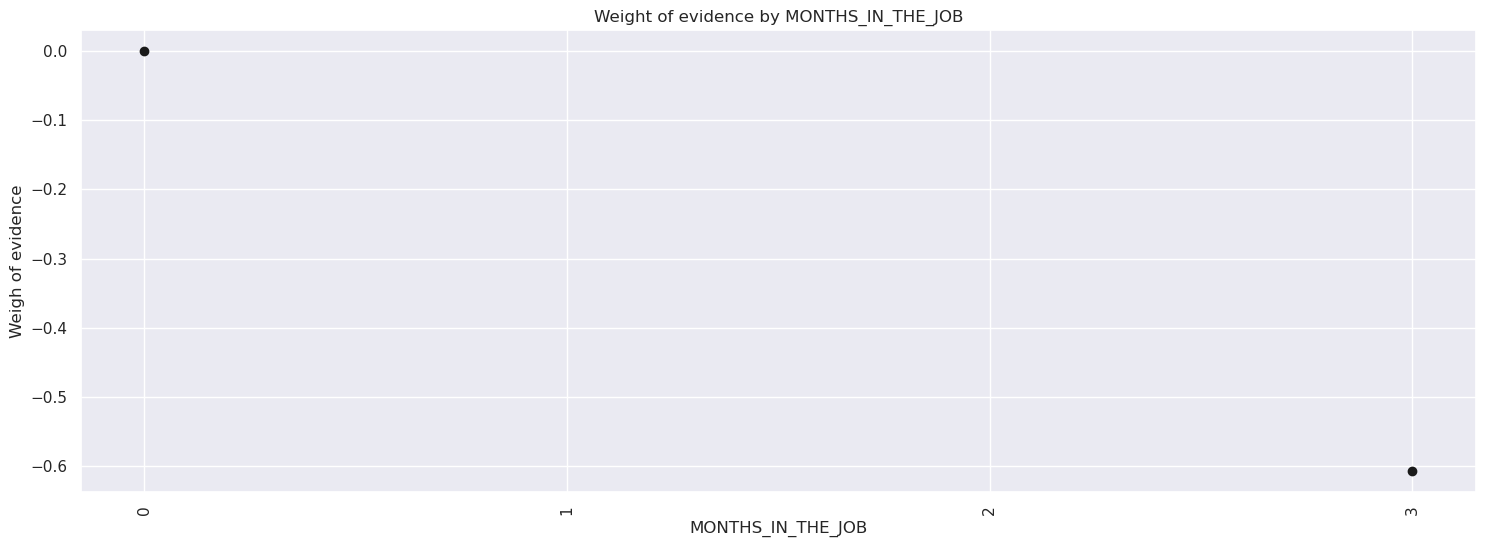

In [402]:
plot_by_WoE(df_temp,90)

In [403]:
df_inputs_prepr['MONTHS_IN_THE_JOB: <0'] = np.where(df_inputs_prepr['MONTHS_IN_THE_JOB'].isin(range(0)),1,0)
df_inputs_prepr['MONTHS_IN_THE_JOB: >1'] = np.where(df_inputs_prepr['MONTHS_IN_THE_JOB'].isin(range(1, int(df_inputs_prepr['MONTHS_IN_THE_JOB'].max()))),1,0)

In [404]:
df_temp = WoE_discrete(df_inputs_prepr, 'PAYMENT_DAY', df_targets_prepr)

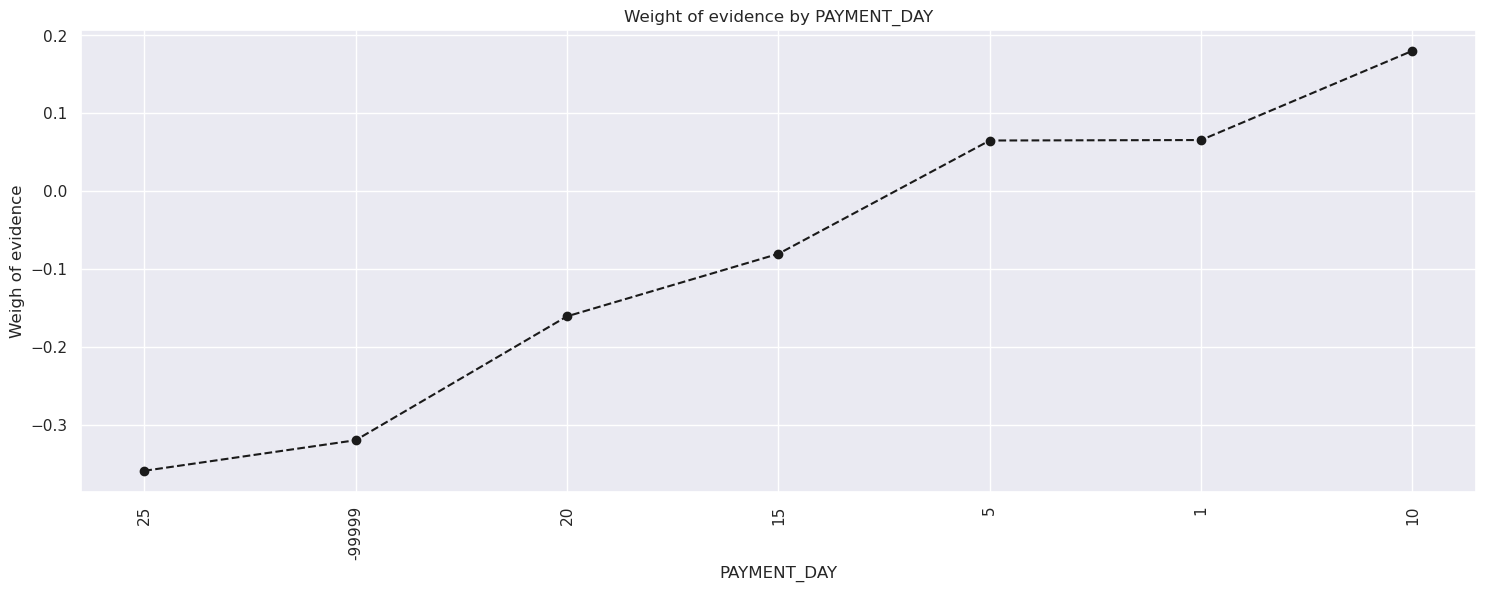

In [405]:
plot_by_WoE(df_temp,90)

# Testing Data Implementation (without imbalance)

In [406]:
inputs_test_with_ref_cat = cr_data_inputs_test.loc[: , ['AGE: <16.9',
'AGE: 16.9-30',
'AGE: 31-43.3',
'AGE: 43-56.5',
'AGE: 56-66.4',
'AGE: 66-82.9',
'company:N',
'marital:0',
'marital:2',
'marital:3',
'marital:4',
'marital:5',
'marital:6',
'marital:7',
'master:1',
'MONTHS_IN_RESIDENCE: <5',
'MONTHS_IN_RESIDENCE: 13-24',
'MONTHS_IN_RESIDENCE: 25-40',
'MONTHS_IN_RESIDENCE: 41-44',
'MONTHS_IN_RESIDENCE: 45-48',
'MONTHS_IN_RESIDENCE: 49-60',
'MONTHS_IN_RESIDENCE: 5-12',
'MONTHS_IN_THE_JOB: >1',
'occ_type:0.0',
'occ_type:1.0',
'occ_type:2.0',
'occ_type:3.0',
'occ_type:5.0',
'payment_day:1',
'payment_day:10',
'payment_day:15',
'payment_day:20',
'payment_day:5',
'payment_day:-99999',
'PERSONAL_MONTHLY_INCOME: <256.479',
'PERSONAL_MONTHLY_INCOME: >10900',
'PERSONAL_MONTHLY_INCOME: 1238-2221.265',
'PERSONAL_MONTHLY_INCOME: 2221-2515.983',
'PERSONAL_MONTHLY_INCOME: 2515-3011.18',
'PERSONAL_MONTHLY_INCOME: 256-845.915',
'PERSONAL_MONTHLY_INCOME: 3007-4485',
'PERSONAL_MONTHLY_INCOME: 4485-8911',
'PERSONAL_MONTHLY_INCOME: 8911-10900',
'product:1',
'product:2',
'prof_code_12_11',
'prof_code_13_16_6_17_5_18',
'prof_code_2_10',
'prof_code_4_15_3',
'prof_code_9',
'prof_code_7_8',
'resi_type_0_5_4',
'resi_type_1',
'resi_type_3',
'state_resi:AC_DF_AM_AL',
'state_resi:BA_PE',
'state_resi:MS_MT_RJ_MA_CE',
'state_resi:PA_PI_MG',
'state_resi:RN_ES_GO_RR',
'state_resi:SC_RO',
'state_resi:SP',
'state_resi:TO_AP_PR_PB_RS',
'company:Y',
'marital:1',
'MONTHS_IN_RESIDENCE: >60',
'MONTHS_IN_THE_JOB: <0',
'occ_type:4.0',
'payment_day:25',
'PERSONAL_MONTHLY_INCOME: 845-1238.872',
'product:7',
'postal_code:2',
'resi_type_2',
'state_resi:SE']]

In [407]:
ref_categories = ['company:Y',
'marital:1',
'MONTHS_IN_RESIDENCE: >60',
'MONTHS_IN_THE_JOB: <0',
'occ_type:4.0',
'payment_day:25',
'PERSONAL_MONTHLY_INCOME: 845-1238.872',
'product:7',
'postal_code:2',
'resi_type_2',
'state_resi:SE']


In [408]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis=1)
inputs_test.head()

AGE: <16.9  AGE: 16.9-30  AGE: 31-43.3  AGE: 43-56.5  AGE: 56-66.4  \
33554           0             0             1             0             0   
9428            0             0             0             0             0   
200             0             0             0             1             0   
12448           0             0             0             1             0   
39490           0             0             0             1             0   

       AGE: 66-82.9  company:N  marital:0  marital:2  marital:3  marital:4  \
33554             0          1          0          1          0          0   
9428              1          1          0          1          0          0   
200               0          0          0          1          0          0   
12448             0          0          0          1          0          0   
39490             0          0          0          0          0          0   

       marital:5  marital:6  marital:7  master:1  MONTHS_IN_RESIDENCE: <5  \
33554          0          0          0         1                        0   
9428           0          0          0         0                        1   
200            0          0          0         1                        0   
12448          0          0          0         0                        0   
39490          1          0          0         0                        0   

       MONTHS_IN_RESIDENCE: 13-24  MONTHS_IN_RESIDENCE: 25-40  \
33554                           1                           0   
9428                            0                           0   
200                             1                           0   
12448                           0                           0   
39490                           0                           0   

       MONTHS_IN_RESIDENCE: 41-44  MONTHS_IN_RESIDENCE: 45-48  \
33554                           0                           0   
9428                            0                           0   
200                             0                           0   
12448                           0                           0   
39490                           0                           0   

       MONTHS_IN_RESIDENCE: 49-60  MONTHS_IN_RESIDENCE: 5-12  \
33554                           0                          0   
9428                            0                          0   
200                             0                          0   
12448                           1                          0   
39490                           0                          1   

       MONTHS_IN_THE_JOB: >1  occ_type:0.0  occ_type:1.0  occ_type:2.0  \
33554                      0             0             0             0   
9428                       0             0             1             0   
200                        0             0             0             0   
12448                      0             0             1             0   
39490                      0             0             1             0   

       occ_type:3.0  occ_type:5.0  payment_day:1  payment_day:10  \
33554             0             0              0               0   
9428              0             0              0               1   
200               0             1              0               0   
12448             0             0              0               0   
39490             0             0              0               1   

       payment_day:15  payment_day:20  payment_day:5  payment_day:-99999  \
33554               0               1              0                   0   
9428                0               0              0                   0   
200                 0               0              0                   0   
12448               1               0              0                   0   
39490               0               0              0                   0   

       PERSONAL_MONTHLY_INCOME: <256.479  PERSONAL_MONTHLY_INCOME: >10900  \
33554                                  0                 

In [409]:
y_hat_test = reg2.model.predict(inputs_test)

In [410]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [411]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [412]:
cr_data_targets_test_temp = cr_data_targets_test

In [413]:
cr_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [414]:
df_actual_predicted_probs= pd.concat([cr_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis =1)

In [415]:
df_actual_predicted_probs.columns = ['cr_data_targets_test', 'y_hat_test_proba']

In [416]:
df_actual_predicted_probs

cr_data_targets_test  y_hat_test_proba
0                        0          0.729386
1                        1          0.837458
2                        1          0.701044
3                        1          0.861040
4                        0          0.740031
5                        1          0.735183
6                        1          0.781649
7                        1          0.609958
8                        1          0.765877
9                        1          0.737530
10                       1          0.623762
11                       0          0.761350
12                       1          0.732787
13                       0          0.681747
14                       1          0.775564
15                       0          0.721768
16                       0          0.786559
17                       1          0.692949
18                       1          0.817461
19                       1          0.762225
20                       1          0.768468
21                       1          0.793201
22                       1          0.772867
23                       1          0.711148
24                       1          0.800597
25                       1          0.574115
26                       1          0.693851
27                       1          0.832934
28                       1          0.741449
29                       0          0.829652
30                       1          0.704935
31                       1          0.792136
32                       1          0.810020
33                       0          0.701028
34                       0          0.833036
35                       0          0.766375
36                       1          0.815819
37                       1          0.820810
38                       1          0.807223
39                       0          0.653432
40                       1          0.742327
41                       1          0.821796
42                       0          0.709271
43                       1          0.839892
44                       1          0.676153
45                       0          0.716575
46                       1          0.803155
47                       0          0.629368
48                       1          0.809864
49                       1          0.773835
50                       1          0.661935
51                       1          0.676061
52                       0          0.852996
53                       1          0.638110
54                       0          0.771331
55                       0          0.718663
56                       1          0.684539
57                       1          0.751870
58                       0          0.741108
59                       0          0.601098
60                       1          0.796966
61                       1          0.674420
62                       1          0.783617
63                       1          0.822550
64                       1          0.862890
65                       1          0.833195
66                       1          0.838601
67                       1          0.731317
68                       1          0.672279
69                       0          0.819185
70                       1          0.661099
71                       1          0.810669
72                       1          0.776508
73                       0          0.786478
74                       1          0.705834
75                       0          0.727282
76                       1          0.580336
77                       0          0.680715
78                       0          0.721172
79                       1          0.808247
80                       0          0.821735
81                       0          0.822905
82                       1          0.710292
83                       0          0.683911
84                       1          0.818748
85                       1          0.742161
86                       0          0.724142
87                       1          0.655720
8

In [417]:
df_actual_predicted_probs.index = cr_data_targets_test.index

In [418]:
tr = 0.7

In [419]:
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba']> tr, 1, 0)

In [420]:
pd.crosstab(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['actual'], colnames = ['predicted'])

predicted     0     1
actual               
0           967  1697
1          1815  5521

In [421]:
pd.crosstab(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['actual'], colnames = ['predicted']) / df_actual_predicted_probs.shape[0]

predicted       0       1
actual                   
0          0.0967  0.1697
1          0.1815  0.5521

In [422]:
(pd.crosstab(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.6488

In [423]:
roc_curve(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99962462, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.36314068e-04, 1.09051254e-03, ...,
        9.99863686e-01, 9.99863686e-01, 1.00000000e+00]),
 array([1.92711687, 0.92711687, 0.91227342, ..., 0.4674169 , 0.46151786,
        0.44842635]))

In [424]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

Text(0.5, 1.0, 'ROC curve')

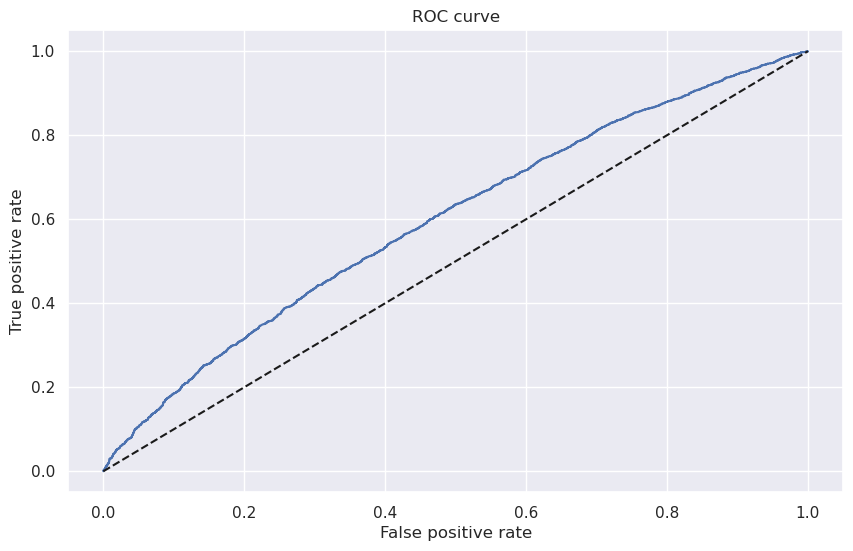

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [426]:
AUROC = roc_auc_score(df_actual_predicted_probs['cr_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.5972882301603675

In [427]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [428]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [429]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['cr_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['cr_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [430]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['cr_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['cr_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

Text(0.5, 1.0, 'Gini')

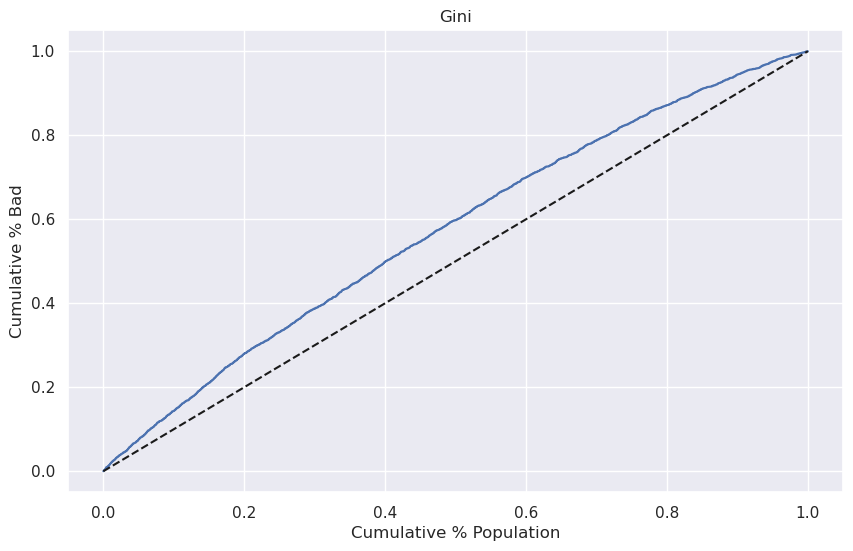

In [431]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [432]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.19457646032073495

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

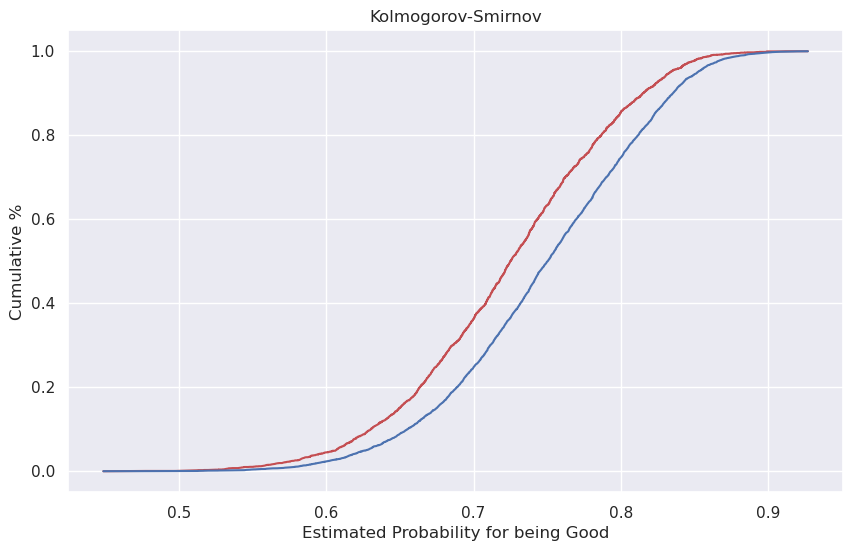

In [433]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [434]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.1387538028759402

# Random Forest Code (Feature Selection with Correlation heatmap)

In [435]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,accuracy_score
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd 

In [436]:
df = pd.read_csv('CS_data.txt', delimiter = '\t')
df.head(7)

/tmp/ipykernel_158/1157273255.py:1: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CS_data.txt', delimiter = '\t')


ID_CLIENT CLERK_TYPE  PAYMENT_DAY APPLICATION_SUBMISSION_TYPE  \
1          1          C       -99999                           0   
2          2          C       -99999                         Web   
3          3          C       -99999                           0   
4          4          C       -99999                         Web   
5          5          C       -99999                         Web   
6          6          C       -99999                         Web   
7          7          C       -99999                         Web   

   QUANT_ADDITIONAL_CARDS  POSTAL_ADDRESS_TYPE SEX  MARITAL_STATUS  \
1                       0                    1   F               6   
2                       0                    1   F               2   
3                       0                    1   F               2   
4                       0                    1   F               2   
5                       0                    1   M               2   
6                       0                    1   M               2   
7                       0                    1   F               2   

   QUANT_DEPENDANTS  EDUCATION_LEVEL STATE_OF_BIRTH       CITY_OF_BIRTH  \
1                 1              NaN             RN                Assu   
2                 0              NaN             RJ      rio de janeiro   
3                 0              NaN             RN           GARANHUNS   
4                 0              NaN             PE                CABO   
5                 0              NaN             RJ      RIO DE JANEIRO   
6                 0              NaN             MG  CARMO DO RIO CLARO   
7                 2              NaN             BA            salvador   

   NATIONALITY RESIDENCIAL_STATE  RESIDENCIAL_CITY  RESIDENCIAL_BOROUGH  \
1            1                RN  Santana do Matos               Centro   
2            1                RJ    RIO DE JANEIRO         CAMPO GRANDE   
3            1                RN        Parnamirim        Boa Esperanca   
4            1                PE              CABO  PONTE DOS CARVALHOS   
5            1                RJ    Rio de Janeiro           Santa Cruz   
6            1                MG           ALFENAS       Campos Eliseos   
7            1                BA          SALVADOR              VALERIA   

  FLAG_RESIDENCIAL_PHONE  RESIDENCIAL_PHONE_AREA_CODE  RESIDENCE_TYPE  \
1                      Y                        105.0             1.0   
2                      Y                         20.0             1.0   
3                      Y                        105.0             1.0   
4                      N                          NaN             NaN   
5                      Y                         20.0             1.0   
6                      Y                         33.0             1.0   
7                      Y                         81.0             1.0   

   MONTHS_IN_RESIDENCE FLAG_MOBILE_PHONE  FLAG_EMAIL  PERSONAL_MONTHLY_INCOME  \
1                 15.0                 N           1                    900.0   
2                  1.0                 N           1                    750.0   
3                  NaN                 N           1                    500.0   
4                  NaN                 N           1                    500.0   
5                 12.0                 N           1                   1200.0   
6                  4.0                 N           1                    500.0   
7                  1.0                 N           1                    320.0   

   OTHER_INCOMES  FLAG_VISA  FLAG_MASTERCARD  FLAG_DINERS  \
1            0.0          1                1            0   
2            0.0          0                0            0   
3            0.0          0                0            0   
4            0.0          0                0            0   
5            0.0          0                0            0   
6            0.0          0                0            0   
7            0.0          0       

In [437]:
df['TARGET_LABEL_BAD.1'].value_counts()

0    36959
1    13041
Name: TARGET_LABEL_BAD.1, dtype: int64

In [438]:
df.drop(['SEX'], axis=1, inplace=True)

In [439]:
# Narrow down the Dataset using literature research
target = df[['ID_CLIENT', "AGE", 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_CARS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD', 'TARGET_LABEL_BAD.1']]
target.head(7)

ID_CLIENT  AGE  MARITAL_STATUS  QUANT_DEPENDANTS  FLAG_EMAIL  \
1          1   32               6                 1           1   
2          2   34               2                 0           1   
3          3   27               2                 0           1   
4          4   61               2                 0           1   
5          5   48               2                 0           1   
6          6   40               2                 0           1   
7          7   40               2                 2           1   

   PERSONAL_MONTHLY_INCOME  OTHER_INCOMES  FLAG_VISA  FLAG_MASTERCARD  \
1                    900.0            0.0          1                1   
2                    750.0            0.0          0                0   
3                    500.0            0.0          0                0   
4                    500.0            0.0          0                0   
5                   1200.0            0.0          0                0   
6                    500.0            0.0          0                0   
7                    320.0            0.0          0                0   

   FLAG_DINERS  FLAG_AMERICAN_EXPRESS  FLAG_OTHER_CARDS  QUANT_CARS  \
1            0                      0                 0           0   
2            0                      0                 0           0   
3            0                      0                 0           0   
4            0                      0                 0           0   
5            0                      0                 0           0   
6            0                      0                 0           1   
7            0                      0                 0           0   

   QUANT_BANKING_ACCOUNTS  QUANT_SPECIAL_BANKING_ACCOUNTS  \
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   
5                       0                               0   
6                       1                               1   
7                       0                               0   

   PERSONAL_ASSETS_VALUE  MONTHS_IN_THE_JOB  PROFESSION_CODE  \
1                    0.0                  0              9.0   
2                    0.0                  0             11.0   
3                    0.0                  0             11.0   
4                    0.0                  0              NaN   
5                    0.0                  0              9.0   
6                    0.0                  0              9.0   
7                    0.0                  0             11.0   

   FLAG_INCOME_PROOF FLAG_ACSP_RECORD  TARGET_LABEL_BAD.1  
1                  0                N                   1  
2                  0                N                   1  
3                  0                N                   0  
4                  0                N                   0  
5                  0                N                   1  
6                  0                N                   1  
7                  0                N                   1

## Preprocess the original data

In [440]:
summary = target.describe()
data_info = pd.DataFrame({'Missing_Values': target.isnull().sum(), 'Data_Types': target.dtypes})

summary, data_info

(          ID_CLIENT          AGE  MARITAL_STATUS  QUANT_DEPENDANTS  \
 count  50000.000000  50000.00000     50000.00000      50000.000000   
 mean   25000.500000     43.24852         2.14840          0.650520   
 std    14433.901067     14.98905         1.32285          1.193655   
 min        1.000000      6.00000         0.00000          0.000000   
 25%    12500.750000     31.00000         1.00000          0.000000   
 50%    25000.500000     41.00000         2.00000          0.000000   
 75%    37500.250000     53.00000         2.00000          1.000000   
 max    50000.000000    106.00000         7.00000         53.000000   
 
          FLAG_EMAIL  PERSONAL_MONTHLY_INCOME  OTHER_INCOMES     FLAG_VISA  \
 count  50000.000000             50000.000000   50000.000000  50000.000000   
 mean       0.802280               886.678437      35.434760      0.111440   
 std        0.398284              7846.959327     891.515142      0.314679   
 min        0.000000                60.000000  

**Key takeaways:**
+ The dataset consists of 50000 entries and 54 features.
+ There are missing values in several columns, which will need to be addressed such as "EDUCATION_LEVEL", "RESIDENCIAL_PHONE_AREA_CODE", "PROFESSIONAL_CITY", "PROFESSIONAL_BOROUGH", "PROFESSIONAL_PHONE_AREA_CODE", "PROFESSION_CODE", "OCCUPATION_TYPE", "MATE_PROFESSION_CODE", "EDUCATION_LEVEL.1"
+ Some features have a suspicious number of the same value. For example, "QUANT_ADDITIONAL_CARDS" has a standard deviation of 0, which may indicate that all records have the same value.
+ There are negative values in PAYMENT_DAY which seem to be placeholders for missing or anomalous data since day of the month cannot be negative. => **Standardization needed**.
+ Certain columns like "FLAG_MOBILE_PHONE" and "FLAG_PROFESSIONAL_PHONE" are object types, suggesting they might contain mixed types of data or be encoded as strings instead of numerical binary flags.
+ It is necessary to convert any categorical variables stored as integers into categorical data types and ensure binary flags are treated as such.

In [441]:
# Identify categorical and numerical columns
categorical_cols = target.select_dtypes(include=['object', 'category']).columns
numerical_cols = target.select_dtypes(include=['int64', 'float64']).columns

# Define the ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', KNNImputer(n_neighbors=5), numerical_cols),
        ('cat', Pipeline(steps=[
            ('convert_to_str', FunctionTransformer(lambda x: x.astype(str), validate=False)),  # New line to convert to strings
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])

In [442]:
# Apply transformations to the data
data_preprocessed = preprocessor.fit_transform(df)

In [443]:
# Get feature names after one-hot encoding for categorical variables
ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)

In [444]:
# Combine feature names from numerical and categorical transformations
all_feature_names = numerical_cols.tolist() + ohe_feature_names.tolist()

In [445]:
# Create the preprocessed DataFrame directly from the NumPy array
df_2 = pd.DataFrame(data_preprocessed, columns=all_feature_names)

In [446]:
# Display the first few rows of the preprocessed DataFrame
df_2.head()

ID_CLIENT   AGE  MARITAL_STATUS  QUANT_DEPENDANTS  FLAG_EMAIL  \
0        1.0  32.0             6.0               1.0         1.0   
1        2.0  34.0             2.0               0.0         1.0   
2        3.0  27.0             2.0               0.0         1.0   
3        4.0  61.0             2.0               0.0         1.0   
4        5.0  48.0             2.0               0.0         1.0   

   PERSONAL_MONTHLY_INCOME  OTHER_INCOMES  FLAG_VISA  FLAG_MASTERCARD  \
0                    900.0            0.0        1.0              1.0   
1                    750.0            0.0        0.0              0.0   
2                    500.0            0.0        0.0              0.0   
3                    500.0            0.0        0.0              0.0   
4                   1200.0            0.0        0.0              0.0   

   FLAG_DINERS  FLAG_AMERICAN_EXPRESS  FLAG_OTHER_CARDS  QUANT_CARS  \
0          0.0                    0.0               0.0         0.0   
1          0.0                    0.0               0.0         0.0   
2          0.0                    0.0               0.0         0.0   
3          0.0                    0.0               0.0         0.0   
4          0.0                    0.0               0.0         0.0   

   QUANT_BANKING_ACCOUNTS  QUANT_SPECIAL_BANKING_ACCOUNTS  \
0                     0.0                             0.0   
1                     0.0                             0.0   
2                     0.0                             0.0   
3                     0.0                             0.0   
4                     0.0                             0.0   

   PERSONAL_ASSETS_VALUE  MONTHS_IN_THE_JOB  PROFESSION_CODE  \
0                    0.0                0.0              9.0   
1                    0.0                0.0             11.0   
2                    0.0                0.0             11.0   
3                    0.0                0.0              6.6   
4                    0.0                0.0              9.0   

   FLAG_INCOME_PROOF  TARGET_LABEL_BAD.1  FLAG_ACSP_RECORD_N  
0                0.0                 1.0                 1.0  
1                0.0                 1.0                 1.0  
2                0.0                 0.0                 1.0  
3                0.0                 0.0                 1.0  
4                0.0                 1.0                 1.0

**Key Takeaways:**
+ Use Pearson correlation for numerical variables to see their linear relationship with the target.
+ Use techniques like ANOVA or chi-square tests to assess the strength of association of categorical variables with the target variable.

# Feature Selection

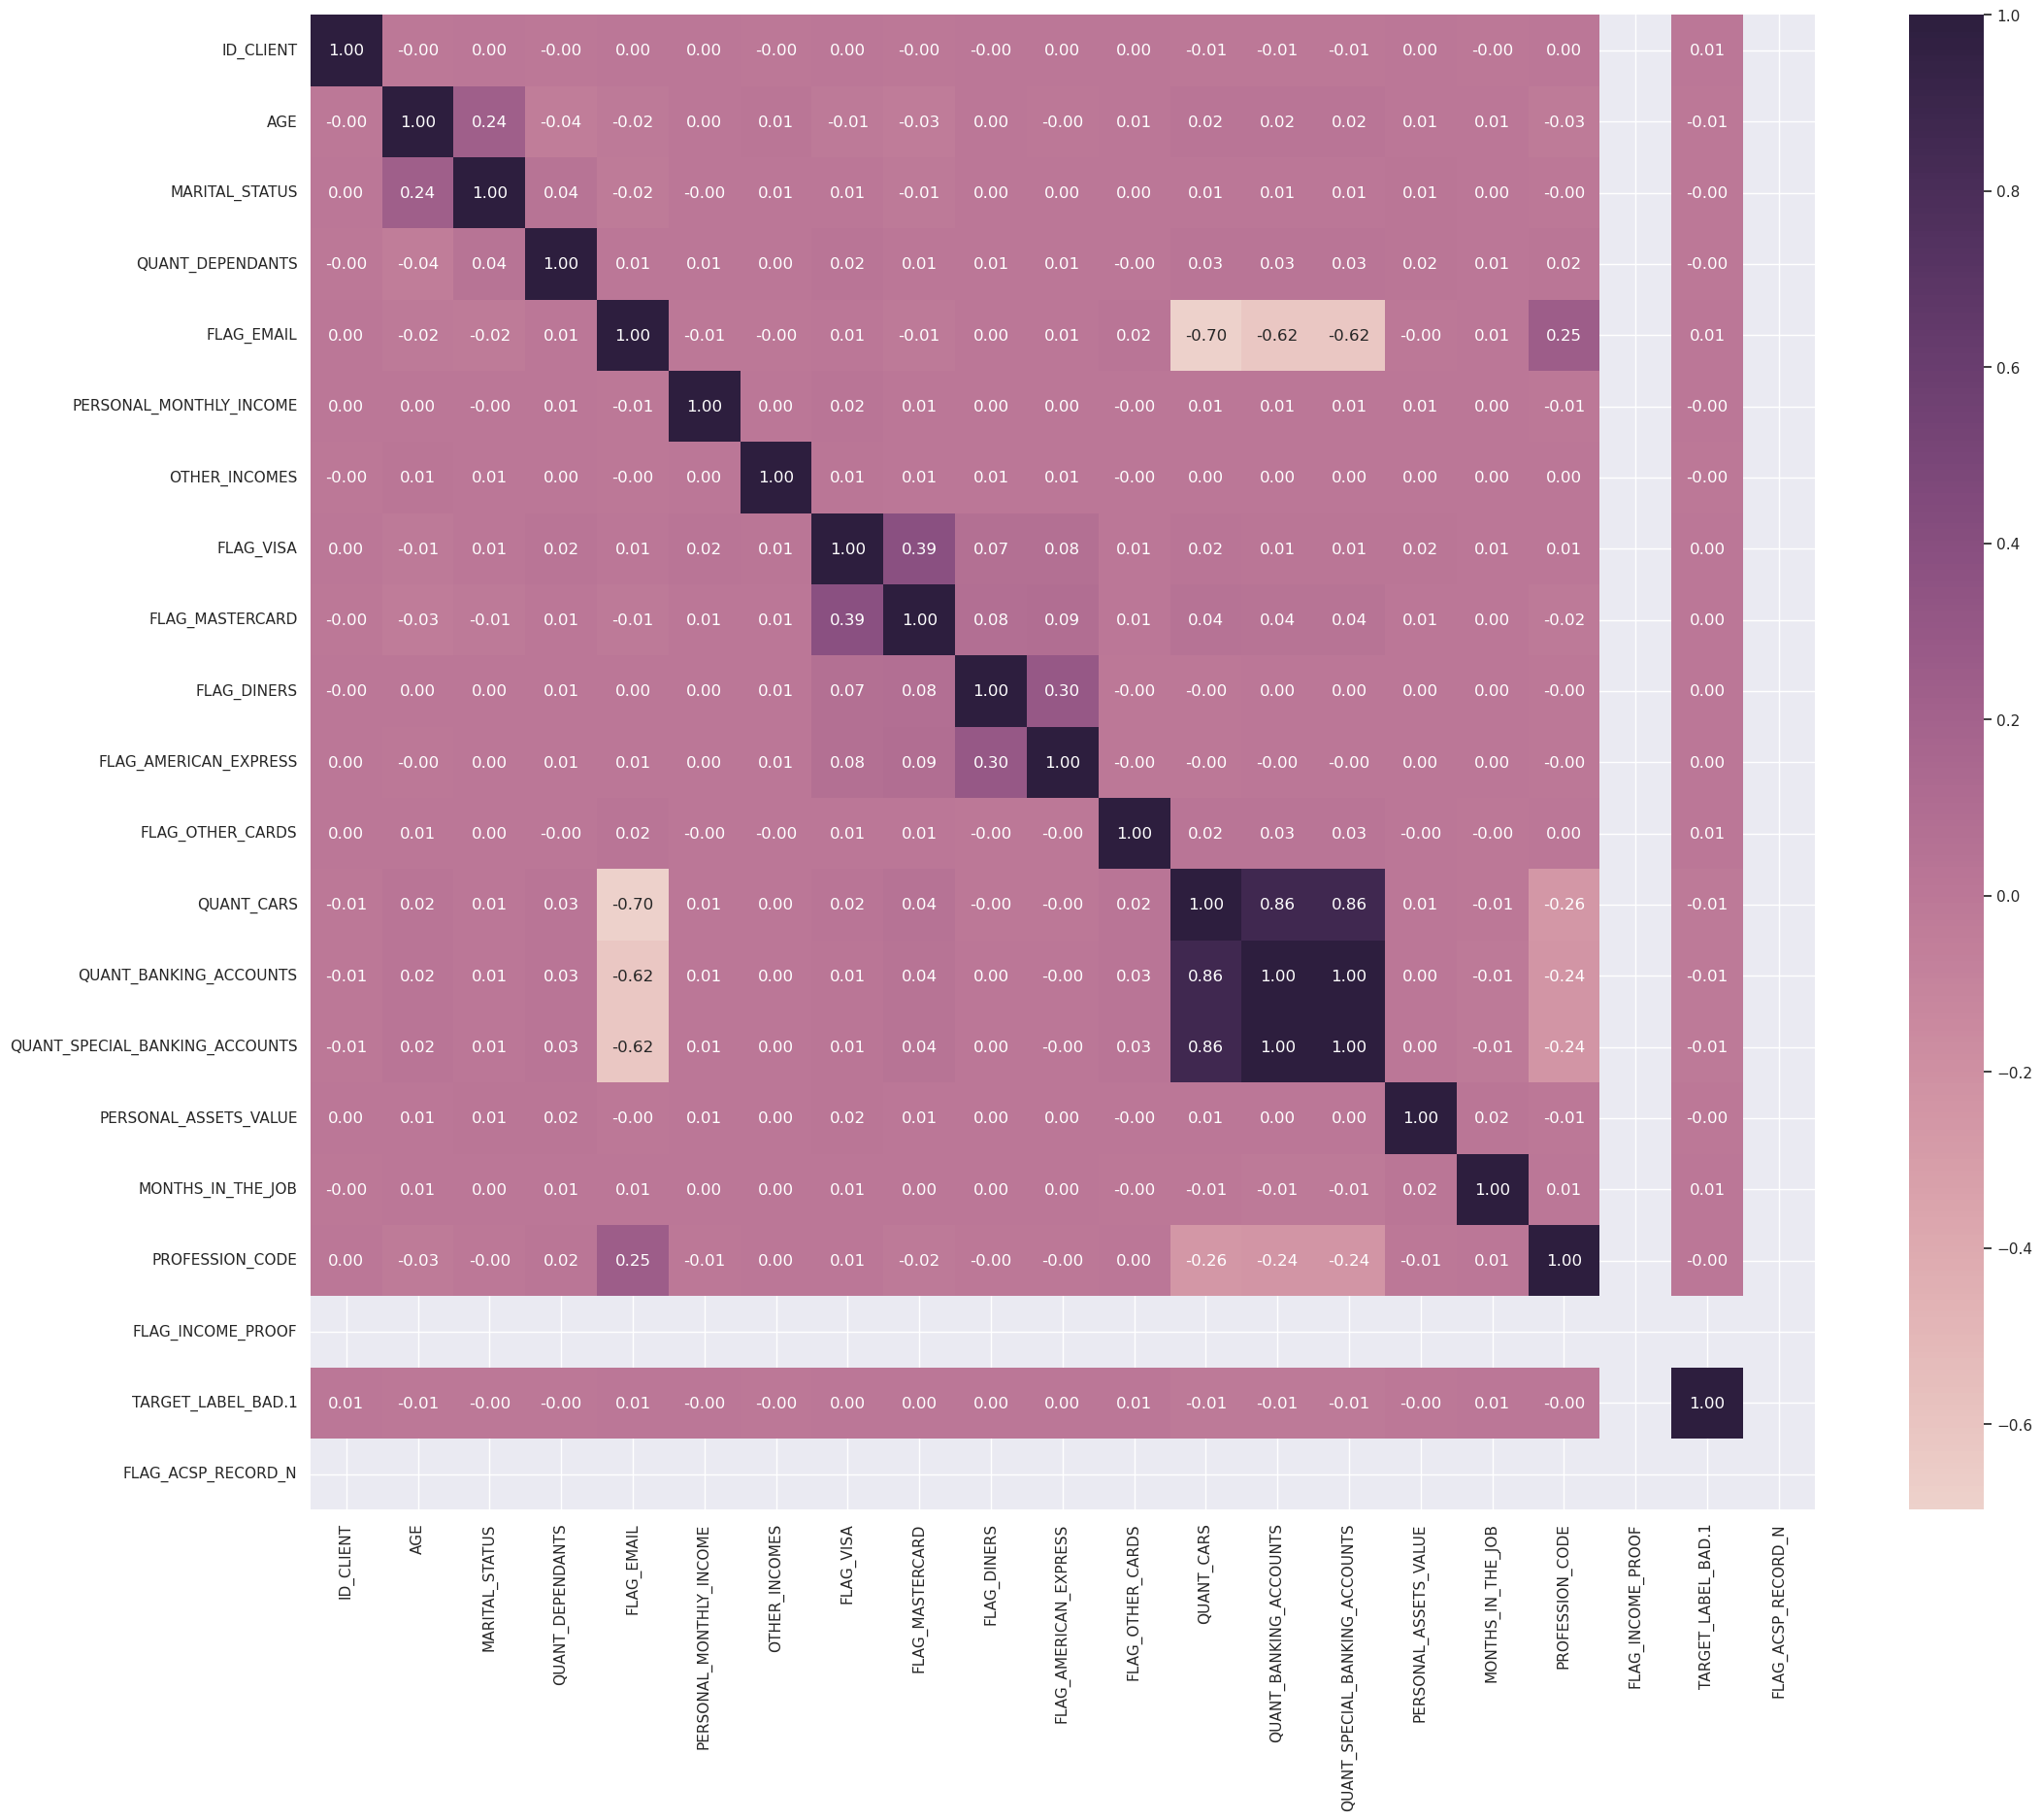

In [447]:
# Add the target variable back into the preprocessed DataFrame for correlation analysis
# Ensure the target variable is in the original df DataFrame
target_variable = 'TARGET_LABEL_BAD.1'
df_2[target_variable] = df[target_variable]

# Calculate the correlation of numerical features with the target variable
cor = df_2.corr()[target_variable].sort_values(ascending=False)

# Visualize the correlations with the target variable
plt.figure(figsize=(25, 20))
sns.heatmap(df_2.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='.2f');

In [448]:
# Display the correlations with the target variable
cor_df = pd.DataFrame(cor).reset_index()
cor_df.rename(columns={'index': 'Feature', target_variable: 'Correlation with Target'}, inplace=True)
cor_df

Feature  Correlation with Target
0               TARGET_LABEL_BAD.1                 1.000000
1                        ID_CLIENT                 0.010530
2                 FLAG_OTHER_CARDS                 0.007466
3                MONTHS_IN_THE_JOB                 0.006588
4                       FLAG_EMAIL                 0.005549
5                      FLAG_DINERS                 0.003495
6                        FLAG_VISA                 0.002163
7                  FLAG_MASTERCARD                 0.001883
8            FLAG_AMERICAN_EXPRESS                 0.000337
9          PERSONAL_MONTHLY_INCOME                -0.000271
10                 PROFESSION_CODE                -0.000435
11                QUANT_DEPENDANTS                -0.001234
12                  MARITAL_STATUS                -0.002145
13           PERSONAL_ASSETS_VALUE                -0.002841
14                   OTHER_INCOMES                -0.003841
15                             AGE                -0.006290
16          QUANT_BANKING_ACCOUNTS                -0.007657
17  QUANT_SPECIAL_BANKING_ACCOUNTS                -0.007657
18                      QUANT_CARS                -0.009902
19               FLAG_INCOME_PROOF                      NaN
20              FLAG_ACSP_RECORD_N                      NaN

**The correlation analysis provides the following insights:**

+ Low Correlation Values: Most features have very low correlation values with the target variable TARGET_LABEL_BAD.1, which suggests that individually, they have a very weak linear relationship with the likelihood of a customer defaulting.

+ ID_CLIENT: The ID_CLIENT feature has a small positive correlation. This might suggest some trend over time or with the order of data entry but is typically not meaningful for prediction and usually should be excluded from the model.

+ Credit Card Flags: Variables like FLAG_OTHER_CARDS, FLAG_DINERS, FLAG_VISA, FLAG_MASTERCARD, and FLAG_AMERICAN_EXPRESS have very low positive correlations. This indicates a weak association with the target, meaning these types of cards by themselves might not be strong predictors of default.

+ Personal Information: Attributes such as SEX, MARITAL_STATUS, and AGE have low negative correlations. While these are not strong relationships, the negative sign suggests that higher values of these features (which might correspond to a particular coding of marital status, or older age) are slightly less associated with default.

+ Financial Features: PERSONAL_MONTHLY_INCOME, PERSONAL_ASSETS_VALUE, QUANT_SPECIAL_BANKING_ACCOUNTS, and QUANT_BANKING_ACCOUNTS also show a very small negative correlation with the target. This could indicate that clients with higher income or more assets/accounts are less likely to default, but again, the relationship is weak.

+ NaN Values: Some features such as FLAG_INCOME_PROOF and FLAG_ACSP_RECORD_N show NaN for correlation, which typically means there's no variation in these features, or they have a constant value across all samples. This makes them non-informative for the model.

==> **Given the low correlation values across the board, it's likely that a single feature does not have a strong predictive power on its own.** This is common in complex domains like credit scoring, where the interaction between features or non-linear relationships can be more informative. Advanced models that can capture these types of relationships, such as **Random Forest** or **Gradient Boosting Machines**, might be more suitable.

## Model Selection

+ Start with model-based selection using a tree-based method (Random Forest) because it provides a good balance between performance and interpretability, and it can handle both categorical and continuous features without the need for scaling.

+ **The feature selection process using a Random Forest model has identified a subset of important features.** These features are considered by the Random Forest algorithm as having more predictive power regarding the target variable, which in this case is the likelihood of default (TARGET_LABEL_BAD.1).

+ **The selected features include various demographic, residential, and financial attributes**. For example, we see features related to the client's marital status, number of dependents, nationality, personal monthly income, and the state and borough of residence among the selected features.

+ **For a bank manager, these selected features can provide valuable insights into which factors are most influential in predicting the risk of default.** This information can help in refining credit policies and risk assessment processes. Additionally, this model-driven approach can uncover non-intuitive patterns that might not be immediately obvious through human judgment alone.

**As a Bank Manager:**
+ Based on these correlations, a bank manager might be interested in investigating further why having more cars or more banking accounts is associated with a higher risk of default. It's possible that these variables are acting as proxies for other underlying factors, such as higher financial obligations.
+ Risk Reduction: Identifying features that contribute most significantly to default risk so you can mitigate them.
+ Profit Maximization: Ensuring loans are given to customers who are most likely to repay.
+ Regulatory Compliance: Ensuring the model does not use variables that are not compliant with lending regulations (e.g., variables that could introduce bias).
+ Operational Simplicity: Preferring models that are easy to interpret and use within the bank's existing systems.

**Recommendations to Make:**
+ Adjust credit policies related to features strongly associated with higher default rates.
+ Tailor credit products to segments of the population that show different risk profiles.
+ Improve risk assessment processes by incorporating new data points that the model identifies as significant.

# outliers checking

In [449]:
df_clean = df_2.dropna(subset=['TARGET_LABEL_BAD.1'])

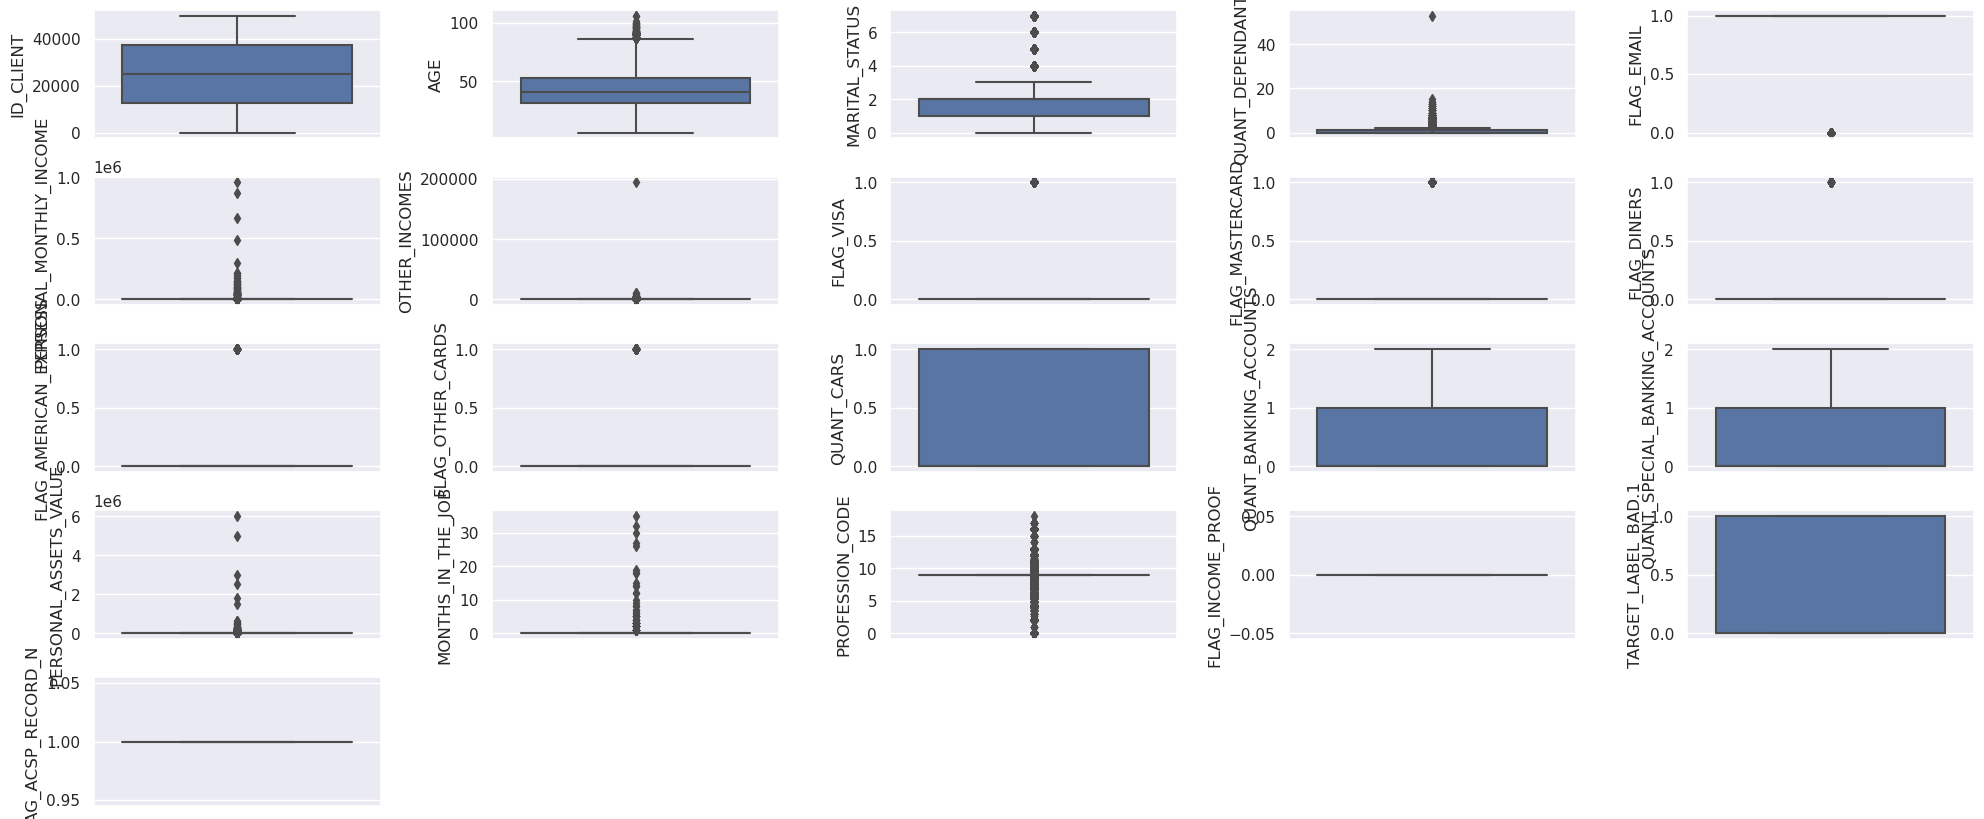

In [450]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
x = 1

# Assuming df_clean is a pre-defined DataFrame
for column in df_clean.describe().columns:
    plt.subplot(6, 5, x)
    sns.boxplot(y=column, data=df_clean)
    x += 1

plt.tight_layout()

In [451]:
df_clean_outliers=df_clean.copy()

In [452]:
df_clean_outliers.drop(labels=df_clean_outliers[df_clean_outliers['AGE']==6].index,axis=0,inplace=True)

In [453]:
df_clean_outliers.drop(labels=df_clean_outliers[df_clean_outliers['AGE']==7].index,axis=0,inplace=True)

In [454]:
df_clean_outliers=df_clean_outliers.drop(df_clean_outliers[df_clean_outliers.QUANT_DEPENDANTS==53].index)
#dropped the outliers

In [455]:
df_clean_outliers.drop('ID_CLIENT',axis=1,inplace=True)

# Process the data

In [456]:
# Drop rows with NaN in the target variable
df_clean_outliers = df_2.dropna(subset=['TARGET_LABEL_BAD.1'])
X = df_clean_outliers.drop('TARGET_LABEL_BAD.1', axis=1)
y = df_clean_outliers['TARGET_LABEL_BAD.1']

# Impute missing values in the target variable (use with caution)
target_imputer = SimpleImputer(strategy='most_frequent')  # or another appropriate strategy
df_clean_outliers['TARGET_LABEL_BAD.1'] = target_imputer.fit_transform(df_clean_outliers[['TARGET_LABEL_BAD.1']])
X = df_clean_outliers.drop('TARGET_LABEL_BAD.1', axis=1)
y = df_clean_outliers['TARGET_LABEL_BAD.1']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

/tmp/ipykernel_158/3941625484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_outliers['TARGET_LABEL_BAD.1'] = target_imputer.fit_transform(df_clean_outliers[['TARGET_LABEL_BAD.1']])


In [457]:
#overfitting test
y_pred_train_RF=rf_classifier.predict(X_train)
acc_rf_base=accuracy_score(y_test,y_pred)
acc_rf_base_train=accuracy_score(y_train,y_pred_train_RF)
print(f"training accuracy {acc_rf_base_train}")
print(f"testing accuracy {acc_rf_base}")

training accuracy 1.0
testing accuracy 0.7204


In [458]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.96      0.84     11088
         1.0       0.23      0.03      0.05      3912

    accuracy                           0.72     15000
   macro avg       0.48      0.50      0.44     15000
weighted avg       0.60      0.72      0.63     15000



In [459]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[10688   400]
 [ 3794   118]]


In [460]:
cm_RF_base=confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm_RF_base=pd.DataFrame(data=cm_RF_base,index=['actual 1','actual 0'],columns=['prediction 1','prediction 0'])
df_cm_RF_base

prediction 1  prediction 0
actual 1           118          3794
actual 0           400         10688

<Axes: >

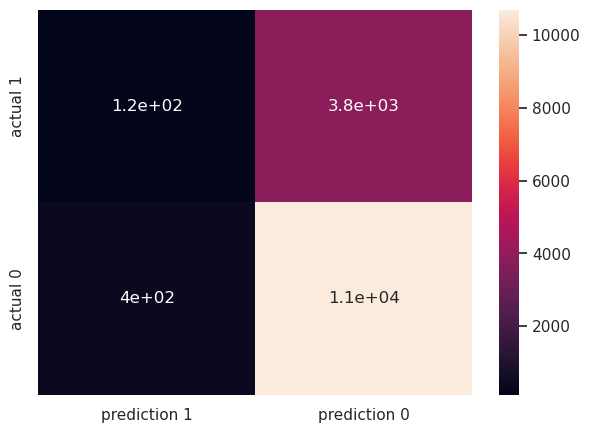

In [461]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_RF_base,annot=True)

In [462]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

ROC-AUC Score: 0.49704428155348407


In [463]:
# Feature importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature ID_CLIENT (0.311633)
2. feature PERSONAL_MONTHLY_INCOME (0.248095)
3. feature AGE (0.197941)
4. feature PROFESSION_CODE (0.069250)
5. feature QUANT_DEPENDANTS (0.047922)
6. feature MARITAL_STATUS (0.045919)
7. feature OTHER_INCOMES (0.016947)
8. feature PERSONAL_ASSETS_VALUE (0.015049)
9. feature FLAG_VISA (0.009767)
10. feature FLAG_MASTERCARD (0.009744)
11. feature FLAG_EMAIL (0.007738)
12. feature QUANT_CARS (0.006834)
13. feature QUANT_BANKING_ACCOUNTS (0.005073)
14. feature QUANT_SPECIAL_BANKING_ACCOUNTS (0.004913)
15. feature MONTHS_IN_THE_JOB (0.000914)
16. feature FLAG_OTHER_CARDS (0.000878)
17. feature FLAG_AMERICAN_EXPRESS (0.000782)
18. feature FLAG_DINERS (0.000601)
19. feature FLAG_INCOME_PROOF (0.000000)
20. feature FLAG_ACSP_RECORD_N (0.000000)


**The Random Forest provides the following insights:**

**Model performance:**
+ The Random Forest model seems to perform well in predicting the non-default class (label 0.0) with a recall of 0.97, but it performs poorly on the default class (label 1.0) with a recall of only 0.04. This suggests that while the model is good at identifying customers who won't default, it struggles to correctly identify those who will.
+ The ROC-AUC score is approximately 0.503, which is only slightly better than random guessing (0.5). 

**Feature Importance:**
+ **'PERSONAL_MONTHLY_INCOME'** and **'AGE'** are next in importance, which aligns with intuition—customers with higher income and older customers might be more financially stable.
+ **'PROFESSION_CODE'** has a significant importance score. This suggests that the customer's profession may be predictive of default risk. The bank might consider reviewing its credit policy related to certain professions.

**Next Steps:**
+ **Cross-Validation:** Use cross-validation to assess the stability of the model's performance across different subsets of the data.
+ **Model Tuning:** Adjust the Random Forest hyperparameters, such as n_estimators, max_depth, min_samples_split, and class_weight, to find a better performing model, especially one that improves recall for the default class.
+ **Threshold Adjustment:** Experiment with different thresholds for classifying a default to find a better balance between recall and precision.
+ **Model Exploration:** Try different algorithms that may perform better on imbalanced datasets, such as Gradient Boosting, XGBoost, or SMOTE combined with Random Forest.
+ **Feature Engineering:** Consider creating new features or modifying existing ones to better capture the factors leading to default.
+ **Continuous Monitoring:** Once deployed, the model’s predictions should be continuously monitored and compared against actual loan outcomes to capture any shifts in patterns.
+ **Ethical and Regulatory Considerations:** Ensure that the model complies with ethical standards and regulations, such as fairness and avoiding discrimination.

## Imbalanced Handling

In [464]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [465]:
ROS_RF=RandomOverSampler(random_state=42)

In [466]:
X_ROS,y_ROS=ROS_RF.fit_resample(X,y)

In [467]:
X_train_ROS, X_test_ROS, y_train_ROS, y_test_ROS = train_test_split(X_ROS, y_ROS, test_size=0.3, random_state=42)

In [468]:
ROS_classifier=RandomForestClassifier(n_estimators=100)
ROS_classifier.fit(X_train_ROS,y_train_ROS)

RandomForestClassifier()

In [469]:
ROS_pred=ROS_classifier.predict(X_test_ROS)

In [470]:
print("Confusion Matrix:\n", confusion_matrix(y_test_ROS, ROS_pred))

Confusion Matrix:
 [[9255 1809]
 [1377 9734]]


In [471]:
# Evaluate the model
print(classification_report(y_test_ROS, ROS_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85     11064
         1.0       0.84      0.88      0.86     11111

    accuracy                           0.86     22175
   macro avg       0.86      0.86      0.86     22175
weighted avg       0.86      0.86      0.86     22175



In [472]:
#overfitting test
y_pred_train_RF_ROS=rf_classifier.predict(X_train_ROS)
acc_rf_ROS_base=accuracy_score(y_test_ROS,ROS_pred)

In [473]:
acc_rf_ROS_base_train=accuracy_score(y_train_ROS,y_pred_train_RF_ROS)
print(f"training accuracy {acc_rf_ROS_base_train}")
print(f"testing accuracy {acc_rf_ROS_base}")

training accuracy 0.8497323205968188
testing accuracy 0.8563246899661782


In [474]:
print("ROC-AUC Score:", roc_auc_score(y_test_ROS, ROS_pred))

ROC-AUC Score: 0.8562827534457558
